# 목차

- [EDA](#EDA)
  - [데이터 불러오기, 데이터 타입 확인](#데이터-불러오기,-데이터-타입-확인)
  - [품질의 문제](#품질의-문제)
    - [결측치](#결측치)
    - [중복치](#중복치)
- [Wrangling](#Wrangling)    
  - [Sales 컬럼들 int로 변경](#Sales-컬럼들-int로-변경)
  - [Year 컬럼 int로 바꾸기](#Year-컬럼-int로-바꾸기)
  - [플랫폼과 Year의 매칭](#플랫폼과-Year의-매칭)
  - [배급사 누락건 수정](#배급사-누락건-수정)
  - [장르 null값 채우기](#장르-null값-채우기) 
- [인사이트 탐색](#인사이트-탐색)
  - [지역별 인기 장르](#지역별-인기-장르)
  - [인기게임분석](#인기게임분석)
  - [지역별 플랫폼 점유율 비교](#지역별-플랫폼-점유율-비교)
- [결론](#결론)
- [한계점](#한계점)

# EDA

  - [데이터 불러오기, 데이터 타입 확인](#데이터-불러오기,-데이터-타입-확인)
  - [품질의 문제](#품질의-문제)
    - [결측치](#결측치)
    - [중복치](#중복치)

##  데이터 불러오기, 데이터 타입 확인

In [1]:
import numpy as np # 선형대수학
import pandas as pd # 데이터프레임
import matplotlib.pyplot as plt # 그래프 그리기
import seaborn as sns # 그래프 그리기2
import math # random 가능케 함
import sympy as sym
import sklearn # 머신러닝
from sklearn.preprocessing import StandardScaler # 표준화
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use("default")
from sklearn.linear_model import LinearRegression
import warnings # 경고문 무시
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv') # csv 불러오기

In [3]:
df.shape # 데이터프레임 크기

(16598, 10)

In [4]:
df.info() # 컬럼들의 데이터타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [5]:
df.sort_values('Year', ascending=False) # Year로 내림차순 정렬

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6906,6907,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0K,0,0.02
5310,5311,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0,0,0.01,0
15233,15234,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0,0,0.01,0
10107,10108,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0,0,0.03,0
13028,13029,XCOM 2,PS4,2016.0,Strategy,Take-Two Interactive,0.01,0.02,0,0.01
...,...,...,...,...,...,...,...,...,...,...
16240,16241,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16275,16276,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16278,16279,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16425,16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


In [6]:
# Sales 단위 체크
print('\n\n', df['NA_Sales'].value_counts())
print('\n\n', df['JP_Sales'].value_counts())
# 단위가 없는 것들은 밀리언?



 0       4443
0.02     537
0.01     536
0.03     528
0.05     523
        ... 
6.06       1
2.65       1
270K       1
2.77       1
1.6        1
Name: NA_Sales, Length: 494, dtype: int64


 0       10333
0.02      716
0.01      696
0.03      521
0.04      393
        ...  
2.35        1
2.41        1
2.49        1
1.53        1
1.6         1
Name: JP_Sales, Length: 282, dtype: int64


## 품질의 문제

- 결측치
- 중복값: unnamed 컬럼 때문에 중복행들이 색출되지 않음
- 부정확한 데이터


### 결측치

In [7]:
# 결측치
df.isnull().sum()
# 연도 결측치는 제거할 것인가, 추가할 것인가(게임플랫폼 출시년도를 고려하여 수정?)
# 장르 결측치는 제거할 것인가, 추가할 것인가


Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

### 중복치
-[이전](#결측치) - [다음](#Sales-컬럼들-int로-변경)

In [8]:
# 중복치
df.drop('Unnamed: 0', axis = 1, inplace = True)

# 중복행 색출
df.loc[df.duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [9]:
df.loc[df.Name == 'Wii de Asobu: Metroid Prime']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [10]:
# 중복행 제거
df.drop_duplicates(inplace = True)

df.reset_index(drop = True)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16592,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16593,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16594,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16595,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [11]:
df.loc[df.Name.duplicated()] # 동일 게임이 멀티 플랫폼으로 출시되었을 수 있음

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
131,Call of Duty 4: Modern Warfare,PC,2007.0,Shooter,Activision,0,1.12,0,0.03
230,IL-2 Sturmovik: Birds of Prey,DS,2009.0,Simulation,505 Games,0.06,0,0,0
250,NASCAR Unleashed,3DS,2011.0,Racing,Activision,0.18,0,0,0.01
279,The Incredibles: Rise of the Underminer,XB,2005.0,Action,THQ,0.06,0.02,0,0
343,NBA 2K12,X360,2011.0,Sports,Take-Two Interactive,2.31,0.14,0.01,0.16
...,...,...,...,...,...,...,...,...,...
16591,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,80K
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## Wrangling

  - [Sales 컬럼들 int로 변경](#Sales-컬럼들-int로-변경)
  - [Year 컬럼 int로 바꾸기](#Year-컬럼-int로-바꾸기)
  - [플랫폼과 Year의 매칭](#플랫폼과-Year의-매칭)
  - [배급사 누락건 수정](#배급사-누락건-수정)
  - [장르 null값 채우기](#장르-null값-채우기) 

In [12]:
# 부정확한 데이터

# 플랫폼과 게임출시년도의 미스매치 수정

In [13]:
df.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1324
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [14]:
df.Genre.value_counts()

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1307
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64

## 부정확한 데이터

### Sales 컬럼들 int로 변경
-[이전](#중복치) - [다음](#Year-컬럼-int로-바꾸기)

In [15]:
# Sales 컬럼들 중에서 K, M이 섞인 데이터 색출
bool_df = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].apply(lambda x: x.str.contains('[a-zA-Z]')) 
# 문자 포함 여부를 각 데이터마다 적용, 불리안 데이터프레임 형태로 반환.

mask = (bool_df).any(axis=1)
# True(문자가 포한되어있는 데이터)가 하나라도 있는 행(row)이 있는지 불리안 시리드 형태로 변환.

al_rows = df[mask]
# 문자가 포한된 데이터가 있는 행들만 인덱싱

z = al_rows[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

In [16]:
# Sales끼리 합산 등, 연산이 필요하기에 정수로 바꾸는 것이 나음
# 왜냐하면 소수로 표현하면 계산에 오차가 생길 수 있기 때문 - 소수점을 이진법으로 완벽히 표현할 수 없기에 오차가 조금씩 생김
# 단위는 K(1000)로 함
def convert_to_float(val):
    if 'K' in val:
        return float(val.replace('K', ''))
    elif 'M' in val:
        return float(val.replace('M', '')) * 1000
    else:
        return float(val) * 1000 
        

In [17]:
z_2 = z.applymap(lambda x: convert_to_float(x)) # 문자가 섞인 

In [18]:
z_2

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,480.0,330.0,0.0,60.0
36,300.0,30.0,40.0,30.0
45,60.0,80.0,160.0,30.0
64,10.0,0.0,0.0,0.0
73,220.0,60.0,0.0,10.0
...,...,...,...,...
16525,10.0,0.0,0.0,0.0
16571,0.0,0.0,20.0,0.0
16578,320.0,220.0,0.0,40.0
16580,0.0,30.0,0.0,0.0


In [19]:
max(z_2.NA_Sales)

9630.0

In [20]:
z_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 10 to 16591
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NA_Sales     785 non-null    float64
 1   EU_Sales     785 non-null    float64
 2   JP_Sales     785 non-null    float64
 3   Other_Sales  785 non-null    float64
dtypes: float64(4)
memory usage: 30.7 KB


In [21]:
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].applymap(lambda x: convert_to_float(x))

In [22]:
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].astype(int)

In [23]:
df.NA_Sales.value_counts()

0       4498
20       550
10       541
30       533
50       530
        ... 
3790       1
3030       1
2950       1
6820       1
3110       1
Name: NA_Sales, Length: 410, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16597 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16547 non-null  object 
 4   Publisher    16539 non-null  object 
 5   NA_Sales     16597 non-null  int32  
 6   EU_Sales     16597 non-null  int32  
 7   JP_Sales     16597 non-null  int32  
 8   Other_Sales  16597 non-null  int32  
dtypes: float64(1), int32(4), object(4)
memory usage: 1.0+ MB


### Year 컬럼 int로 바꾸기
-[이전](#Sales-컬럼들-int로-변경) - [다음](#플랫폼과-Year의-매칭)

In [25]:
df.Year.value_counts()

2009.0    1421
2008.0    1418
2010.0    1252
2007.0    1199
2011.0    1129
          ... 
14.0         2
13.0         2
94.0         1
2020.0       1
86.0         1
Name: Year, Length: 62, dtype: int64

In [26]:
# year null 값 수정
df_null = df[['Name', 'Platform', 'Year']].loc[df.Year.isnull()]
df_null

,Name,Platform,Year
31,Rock Band,X360,NaN
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN
430,Famista 64,N64,NaN
...,...,...,...
16240,Freaky Flyers,GC,NaN
16275,Space Invaders,2600,NaN
16278,Madden NFL 11,Wii,NaN
16425,Yoostar on MTV,X360,NaN


In [27]:
df_null.Platform.value_counts()

PS2     34
Wii     34
DS      30
X360    30
PS3     25
XB      21
PC      17
2600    17
PSP     16
GC      14
GBA     11
3DS      9
PS       7
N64      3
PSV      1
GB       1
Name: Platform, dtype: int64

In [28]:
df_null.Platform.value_counts().loc['PS3']

25

In [29]:
df_null_will = df_null.loc[df_null['Platform'] == 'Wii']

In [30]:
len(list(df_null.Name.loc[df_null['Platform'] == 'Wii']))

34

In [31]:
estimated_year = [2009, 2006, 2010, 2007, 2006, 2006, 2008, 2008, 2008, 2009, 2011, 2011, 2011, 2009, 2009, 2002, 2008, 2010, 2009, 2008, 2011, 2006, 2011, 2006, 2012, 2010, 2010, 2008, 2010, 2008, 2011, 2011, 2009, 2010]

In [32]:
len(estimated_year)

34

In [33]:
def null_year_converter(x,columns, estimated_year, start, end):
    x[f'{columns}'].iloc[start:end]  = pd.DataFrame(np.array(estimated_year[start:end]).reshape(end - start,1), index = x[f'{columns}'].iloc[start:end].index).squeeze()
    df['Year'].loc[x.index] = x.Year
    

In [34]:
null_year_converter(df_null_will,'Year', estimated_year, 0, 34)

In [35]:
# 예시
df.loc[df.Name == 'Call of Duty 3']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2130,Call of Duty 3,Wii,2006.0,Shooter,Activision,1190,840,0,230
7427,Call of Duty 3,PS2,2006.0,Shooter,Activision,890,30,0,150
11774,Call of Duty 3,PS3,2006.0,Shooter,Activision,600,630,30,260
12153,Call of Duty 3,X360,2006.0,Shooter,Activision,1490,930,20,270


In [36]:
# ps2
df_null_temp = df_null.loc[df_null['Platform'] == 'PS2']
print(list(df_null_temp.Name))
print('\n\n', len(list(df_null_temp.Name)))

['Tribes: Aerial Assault', 'Mega Man X Collection', 'Harvest Moon: Save the Homeland', 'Final Fantasy XI', 'Virtua Quest', 'eJay Clubworld', 'wwe Smackdown vs. Raw 2006', 'Sega Rally 2006', 'Demon Chaos', 'Samurai Spirits: Tenkaichi Kenkakuden', 'Wheel of Fortune', 'Combat Elite: WWII Paratroopers', 'Madden NFL 2004', 'College Hoops 2K6', 'MLB SlugFest 20-03', 'Mountain Bike Adrenaline', 'Jet X20', 'Sword of the Samurai', 'All-Star Baseball 2005', 'FIFA Soccer 2004', 'NFL GameDay 2003', "Cabela's Alaskan Adventure", 'Saru! Get You! Million Monkeys', 'Star Trek: Conquest', 'NASCAR: Dirt to Daytona', 'Rock Band', "McFarlane's Evil Prophecy", 'NASCAR Thunder 2003', 'Monster Hunter 2', 'Suikoden III', 'Haven: Call of the King', "James Cameron's Dark Angel", 'NBA Starting Five', 'Yu Yu Hakusho: Dark Tournament']


 34


In [37]:
estimated_year= [2002, 2006, 2001, 2002, 2004, 2002, 2005, 2006, 2005, 2005, 2003, 2005, 2003, 2006, 2002, 2007, 2002, 2002, 2004, 2003, 2002, 2006, 2006, 2007, 2002, 2007, 2004, 2002, 2006, 2002, 2002, 2002, 2002, 2004]
len(estimated_year)

34

In [38]:
null_year_converter(df_null_temp,'Year',estimated_year, 0, 34)

In [39]:
df.loc[df.Name == 'Tribes: Aerial Assault']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1011,Tribes: Aerial Assault,PS2,2002.0,Shooter,Unknown,110,90,0,30


In [40]:
#ps3

In [41]:
#1
df_null_temp = df_null.loc[df_null['Platform'] == 'PS3']
print(list(df_null_temp.Name))
print('\n\n', len(list(df_null_temp.Name)))

['Battle vs. Chess', 'Move Fitness', 'Agarest Senki: Re-appearance', 'Monster Hunter Frontier Online', 'WRC: FIA World Rally Championship', 'Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yasoukyoku', 'The Lord of the Rings: War in the North', 'Bejeweled 3', 'Yakuza 4', 'LEGO Harry Potter: Years 5-7', 'Record of Agarest War Zero', 'Rock Revolution', 'Backbreaker', 'Happy Feet Two', 'Splatterhouse', 'Sonic the Hedgehog', 'Jonah Lomu Rugby Challenge', 'Rock Band', 'The History Channel: Great Battles - Medieval', 'Hakuouki: Shinsengumi Kitan', 'Port Royale 3', 'Silent Hill: Homecoming', "Robert Ludlum's The Bourne Conspiracy", 'Test Drive Unlimited 2', 'Singularity']


 25


In [42]:
#2
release_years = [2011, 2011, 2013, 2007, 2010, 2011, 2011, 2011, 2010, 2011, 2011, 2008, 2010, 2011, 2010, 2006, 2011, 2007, 2011, 2010, 2012, 2008, 2008, 2011, 2010]
len(release_years)

25

In [43]:
#3
null_year_converter(df_null_temp,'Year',release_years, 0, 25)

In [44]:
df.loc[df.Name == 'Battle vs. Chess']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
675,Battle vs. Chess,PS3,2011.0,Misc,TopWare Interactive,0,40,0,10
2457,Battle vs. Chess,X360,2011.0,Misc,TopWare Interactive,0,30,0,0
9298,Battle vs. Chess,PC,NaN,Misc,TopWare Interactive,0,20,0,10


In [45]:
# 멀티플랫폼 출시작 중 year가 nan인 경우
df[['Name', 'Platform', 'Year']].loc[df.Name.duplicated() & df.Year.isnull()]

,Name,Platform,Year
2070,World of Tanks,X360,NaN
2142,Madden NFL 06,X360,NaN
2492,Madden NFL 2002,XB,NaN
2552,The Golden Compass,PSP,NaN
3182,Danganronpa: Trigger Happy Havoc,PSP,NaN
...,...,...,...
15897,Virtua Quest,GC,NaN
16195,Singularity,X360,NaN
16240,Freaky Flyers,GC,NaN
16275,Space Invaders,2600,NaN


In [46]:
df.loc[df.Name == 'World of Tanks']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
27,World of Tanks,PC,2011.0,Shooter,Wargaming.net,0,230,0,60
2070,World of Tanks,X360,NaN,Shooter,NaN,0,30,0,0


In [47]:
# xbox360

In [48]:
#1
df_null_temp = df_null.loc[df_null['Platform'] == 'X360']
print(list(df_null_temp.Name))
print('\n\n', len(list(df_null_temp.Name)))

['Rock Band', 'Majesty 2: The Fantasy Kingdom Sim', 'Star Trek: Legacy', 'World of Tanks', 'Madden NFL 06', 'Football Manager 2007', 'WRC: FIA World Rally Championship', 'Test Drive Unlimited 2', 'Shaun White Snowboarding', 'Mobile Ops: The One Year War', 'Brothers in Arms: Furious 4', 'Jurassic Park: The Game', 'Wet', 'Port Royale 3', 'Tropico 4', 'Backbreaker', 'National Geographic Challenge!', 'Get Fit with Mel B', 'Gun', 'AKB1/48: Idol to Guam de Koishitara...', 'The Lord of the Rings: War in the North', 'Happy Feet Two', 'Otomedius Excellent', "Robert Ludlum's The Bourne Conspiracy", 'Silent Hill: Homecoming', 'LEGO Harry Potter: Years 5-7', 'Tour de France 2011', 'Singularity', 'Yoostar on MTV', 'Bejeweled 3']


 30


In [49]:
#2
release_years = [2007, 2010, 2006, 2014, 2005, 2006, 2010, 2011, 2008, 2007, None, 2011, 2009, 2012, 2011, 2010, 2010, 2010, 2005, 2011, 2011, 2011, 2008, 2008, 2011, 2011, 2011, 2010, 2011, 2011]
release_years[24] = 2008
len(release_years)

30

In [50]:
#3
null_year_converter(df_null_temp,'Year',release_years, 0, 30)

In [51]:
df.loc[df.Name == 'Silent Hill: Homecoming']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
12417,Silent Hill: Homecoming,PS3,2008,Action,Konami Digital Entertainment,180,150,0,60
15013,Silent Hill: Homecoming,X360,2008,Action,Konami Digital Entertainment,250,160,0,40


In [52]:
# PC

In [53]:
#1
df_null_temp = df_null.loc[df_null['Platform'] == 'PC']
print(list(df_null_temp.Name))
print('\n\n', len(list(df_null_temp.Name)))

['Tomb Raider (2013)', 'Street Fighter IV', 'TERA', 'Homeworld Remastered Collection', 'BioShock 2', 'Rocksmith', 'Dead Island: Riptide', 'WRC: FIA World Rally Championship', 'Battle vs. Chess', 'LEGO Harry Potter: Years 5-7', 'Dead Space 3', 'Inversion', 'Call of Duty: Black Ops', 'Test Drive Unlimited 2', 'GRID', 'Clockwork Empires', 'RollerCoaster Tycoon']


 17


In [54]:
#2
release_years = [2013, 2009, 2011, 2015, 2010, 2012, 2013, 2010, 2011, 2011, 2013, 2012, 2010, 2011, 2008, 2016, 1999]
len(release_years)

17

In [55]:
#3
null_year_converter(df_null_temp,'Year',release_years, 0, 17)

In [56]:
df.loc[df.Name == 'Battle vs. Chess']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
675,Battle vs. Chess,PS3,2011,Misc,TopWare Interactive,0,40,0,10
2457,Battle vs. Chess,X360,2011,Misc,TopWare Interactive,0,30,0,0
9298,Battle vs. Chess,PC,2011,Misc,TopWare Interactive,0,20,0,10


In [57]:
# DS

In [58]:
#1
df_null_temp = df_null.loc[df_null['Platform'] == 'DS']
print(list(df_null_temp.Name))

print('\n\n', len(list(df_null_temp.Name)))

['Jewel Link Chronicles: Mountains of Madness', 'My Healthy Cooking Coach', 'Luminous Arc 2 (JP sales)', 'Shorts', 'Captain America: Super Soldier', 'Writing and Speaking Beautiful Japanese DS', 'Chou Soujuu Mecha MG', 'Jet Impulse', "Shonen Jump's Yu-Gi-Oh! GX Card Almanac", 'Charm Girls Club: My Fashion Show', 'Atsumare! Power Pro Kun no DS Koushien', 'Legacy of Ys: Books I & II', 'GRID', 'Shrek the Third', 'Egg Monster Hero', 'Advance Wars: Days of Ruin', 'Mega Man Battle Network: Operation Shooting Star', 'Bejeweled 3', 'LEGO Harry Potter: Years 5-7', 'Alex Rider: Stormbreaker', 'Charm Girls Club: My Fashion Mall', 'The Daring Game for Girls', 'Bikkuriman Daijiten', 'Housekeeping', 'PDC World Championship Darts 2008', 'Tornado', 'Steal Princess', 'Happy Feet Two', 'Runaway: A Twist of Fate', 'Dream Dancer']


 30


In [59]:
#2
release_years = [2011,
2008,
2008,
2009,
2011,
2007,
2006,
2009,
2007,
2009,
2007,
2009,
2008,
2007,
2007,
2008,
2009,
2011,
2011,
2006,
2009,
2009,
2008,
2006,
2008,
2008,
2008, 
2011, 
2009, 
2008]

In [60]:
df_null_temp

,Name,Platform,Year
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN
1235,My Healthy Cooking Coach,DS,NaN
1534,Luminous Arc 2 (JP sales),DS,NaN
2062,Shorts,DS,NaN
2337,Captain America: Super Soldier,DS,NaN
2408,Writing and Speaking Beautiful Japanese DS,DS,NaN
2970,Chou Soujuu Mecha MG,DS,NaN
3187,Jet Impulse,DS,NaN
3811,Shonen Jump's Yu-Gi-Oh! GX Card Almanac,DS,NaN
4714,Charm Girls Club: My Fashion Show,DS,NaN


In [61]:
#3
null_year_converter(df_null_temp,'Year',release_years, 0, 30)

In [62]:
df.loc[df.Name == 'Tornado']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
14911,Tornado,DS,2008,Action,Ignition Entertainment,70,0,0,0


In [63]:
# XB

In [64]:
#1
df_null_temp = df_null.loc[df_null['Platform'] == 'XB']
print(list(df_null_temp.Name))

print('\n\n', len(list(df_null_temp.Name)))

['Transworld Surf', 'Metal Gear Solid 2: Substance', 'Madden NFL 2002', 'Rayman Arena', 'Namco Museum', 'Hitman 2: Silent Assassin', 'Unreal Championship 2: The Liandri Conflict', 'Aquaman: Battle for Atlantis', 'Combat Elite: WWII Paratroopers', 'Def Jam: Fight for NY', 'Robotech: Battlecry', 'Star Wars Jedi Knight II: Jedi Outcast', 'Tom and Jerry in War of the Whiskers', 'NBA Live 2003', 'Godzilla: Destroy All Monsters Melee', 'The Chronicles of Riddick: Escape from Butcher Bay', 'The King of Fighters: Maximum Impact - Maniax', 'All-Star Baseball 2005', "Tom Clancy's Rainbow Six: Critical Hour", 'Drake of the 99 Dragons', 'Without Warning']


 21


In [65]:
release_years = [2001,
2002,
2001,
2001,
2002,
2002,
2005,
2003,
2005,
2004,
2002,
2002,
2002,
2002,
2002,
2004,
2004,
2004,
2006,
2003,
2005]

In [66]:
#3
null_year_converter(df_null_temp,'Year',release_years, 0, 21)

df.loc[df.Name == 'Hitman 2: Silent Assassin']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1385,Hitman 2: Silent Assassin,PS2,2002,Action,Eidos Interactive,1360,1150,40,410
5674,Hitman 2: Silent Assassin,XB,2002,Action,Eidos Interactive,760,380,0,50
10195,Hitman 2: Silent Assassin,GC,2003,Action,Eidos Interactive,100,30,0,0


In [67]:
# 2600

In [68]:
#1
df_null_temp = df_null.loc[df_null['Platform'] == '2600']
print(list(df_null_temp.Name))

print('\n\n', len(list(df_null_temp.Name)))

["Maze Craze: A Game of Cops 'n Robbers", 'Ghostbusters II', 'Hangman', 'Circus Atari', 'Adventure', 'Home Run', 'Fishing Derby', 'Super Breakout', 'Dragster', 'Air-Sea Battle', 'Slot Machine', 'Flag Capture', 'Indy 500', 'Breakaway IV', 'Combat', 'Karate', 'Space Invaders']


 17


In [69]:
#2
release_years = [1980,
1989,
1978,
1980,
1979,
1978,
1980,
1979,
1980,
1977,
1979,
1978,
1977,
1978,
1977,
1982,
1980]

In [70]:
#3
null_year_converter(df_null_temp,'Year',release_years, 0, 17)

df.loc[df.Name == 'Space Invaders']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
686,Space Invaders,N64,1999,Shooter,Activision,130,30,0,0
14608,Space Invaders,SNES,1994,Shooter,Taito,0,0,460,0
16056,Space Invaders,GBA,2002,Shooter,Activision,80,30,0,0
16275,Space Invaders,2600,1980,Shooter,Atari,2360,140,0,30


In [71]:
# PSP

In [72]:
#1
df_null_temp = df_null.loc[df_null['Platform'] == 'PSP']
print(list(df_null_temp.Name))

print('\n\n', len(list(df_null_temp.Name)))

['Major League Baseball 2K6', 'The Golden Compass', 'Danganronpa: Trigger Happy Havoc', 'Major League Baseball 2K8', 'Samurai Shodown Anthology', 'Payout Poker & Casino', 'Half-Minute Hero 2', 'LEGO Batman: The Videogame', 'Madden NFL 07', 'LEGO Harry Potter: Years 5-7', 'PDC World Championship Darts 2008', 'Fullmetal Alchemist: Brotherhood', 'Valkyria Chronicles III: Unrecorded Chronicles', 'Prinny: Can I Really Be The Hero? (US sales)', 'PES 2009: Pro Evolution Soccer', 'Super Robot Wars OG Saga: Masou Kishin II - Revelation of Evil God']


 16


In [73]:
release_years = [2006,
2007,
2010,
2008,
2008,
2006,
2011,
2008,
2006,
2011,
2008,
2010,
2011,
2009,
2008,
2009]

In [74]:
#3
null_year_converter(df_null_temp,'Year',release_years, 0, 16)

df.loc[df.Name == 'Danganronpa: Trigger Happy Havoc']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1932,Danganronpa: Trigger Happy Havoc,PSV,2013,Misc,Nippon Ichi Software,140,70,150,60
3182,Danganronpa: Trigger Happy Havoc,PSP,2010,Misc,Unknown,0,0,240,0


In [75]:
# GC

In [76]:
#1
df_null_temp = df_null.loc[df_null['Platform'] == 'GC']
print(list(df_null_temp.Name))

print('\n\n', len(list(df_null_temp.Name)))

['NHL Hitz Pro', 'Dinotopia: The Sunstone Odyssey', 'Pac-Man Fever', 'Street Hoops', 'Nintendo Puzzle Collection', 'NBA Live 2003', 'GiFTPiA', 'NBA Street Vol. 2', 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe', 'Tube Slider', 'Nicktoons: Battle for Volcano Island', 'Smashing Drive', 'Virtua Quest', 'Freaky Flyers']


 14


In [77]:
release_years = [2003,
2003,
2002,
2002,
2003,
2002,
2003,
2003,
2005,
2003,
2006,
2002,
2004,
2003]

In [78]:
#3
null_year_converter(df_null_temp,'Year',release_years, 0, 14)

df.loc[df.Name == 'Pac-Man Fever']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3832,Pac-Man Fever,GC,2002,Misc,Unknown,210,60,0,10
5542,Pac-Man Fever,PS2,2001,Misc,Sony Computer Entertainment,250,200,0,70


In [79]:
# GBA


In [80]:
#1
df_null_temp = df_null.loc[df_null['Platform'] == 'GBA']
print(list(df_null_temp.Name))

print('\n\n', len(list(df_null_temp.Name)))

['Super Puzzle Fighter II', 'Sabre Wulf', "Disney's Cinderella: Magical Dreams", 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe', 'Drill Dozer', "Cubix Robots for Everyone: Clash 'n' Bash", 'The Legend of Zelda: The Minish Cap(weekly JP sales)', 'WarioWare: Twisted!', "Frogger's Adventures: Temple of the Frog", 'Super Duper Sumos', 'Teen Titans']


 11


In [81]:
#2
release_years = [2003,
2004,
2005,
2005,
2006,
2002,
2004,
2004,
2001,
2003,
2005]



In [82]:
#3
null_year_converter(df_null_temp,'Year',release_years, 0, 11)

df.loc[df.Name == 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
729,"The Chronicles of Narnia: The Lion, The Witch ...",DS,2005,Action,Disney Interactive Studios,150,20,0,10
1396,"The Chronicles of Narnia: The Lion, The Witch ...",PS2,2005,Action,Disney Interactive Studios,360,10,0,60
2444,"The Chronicles of Narnia: The Lion, The Witch ...",XB,2005,Action,Disney Interactive Studios,150,40,0,10
3291,"The Chronicles of Narnia: The Lion, The Witch ...",GBA,2005,Action,Disney Interactive Studios,480,180,0,10
13583,"The Chronicles of Narnia: The Lion, The Witch ...",GC,2005,Action,Disney Interactive Studios,220,60,0,10


In [83]:
# 3DS

In [84]:
#1
df_null_temp = df_null.loc[df_null['Platform'] == '3DS']
print(list(df_null_temp.Name))

print('\n\n', len(list(df_null_temp.Name)))

['Pet Zombies', 'Beyond the Labyrinth', 'Dream Trigger 3D', 'Harvest Moon: The Tale of Two Towns', 'The Smurfs', 'LEGO Harry Potter: Years 5-7', 'Mario Tennis', 'The Hidden', 'Face Racers: Photo Finish']


 9


In [85]:
#2
release_years = [2011,
2012,
2011,
2011,
2011,
2011,
2012,
2011,
2011]

In [86]:
#3
null_year_converter(df_null_temp,'Year',release_years, 0, 9)

df.loc[df.Name == 'Mario Tennis']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
5901,Mario Tennis,GB,2000,Sports,Nintendo,500,180,440,60
9877,Mario Tennis,3DS,2012,Sports,NaN,0,0,20,0
9896,Mario Tennis,Wii,2010,Sports,Nintendo,0,60,0,10
15812,Mario Tennis,N64,2000,Sports,Nintendo,780,400,1060,70


In [87]:
# PS

In [88]:
#1
df_null_temp = df_null.loc[df_null['Platform'] == 'PS']
print(list(df_null_temp.Name))

print('\n\n', len(list(df_null_temp.Name)))

['Twisted Metal: Small Brawl', 'Alone in the Dark: The New Nightmare', 'Action Man-Operation Extreme', 'B.L.U.E.: Legend of Water', 'Legacy of Kain: Soul Reaver', 'The Dukes of Hazzard II: Daisy Dukes It Out', 'Triple Play 99']


 7


In [89]:
#2
release_years = [2001,
2001,
2000,
1999,
1999,
2000,
1998]

In [90]:
#3
null_year_converter(df_null_temp,'Year',release_years, 0, 7)

df.loc[df.Name == 'Alone in the Dark: The New Nightmare']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2824,Alone in the Dark: The New Nightmare,PS,2001,Adventure,Infogrames,90,60,0,10


In [91]:
# N64

In [92]:
#1
df_null_temp = df_null.loc[df_null['Platform'] == 'N64']
print(list(df_null_temp.Name))

print('\n\n', len(list(df_null_temp.Name)))

['Famista 64', 'WCW Backstage Assault', 'Custom Robo']


 3


In [93]:
#2
release_years = [1997, 2000, 1999]

In [94]:
#3
null_year_converter(df_null_temp,'Year',release_years, 0, 3)

df.loc[df.Name == 'Famista 64']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
430,Famista 64,N64,1997,Sports,Namco Bandai Games,0,0,170,30


In [95]:
# PSV

In [96]:
#1
df_null_temp = df_null.loc[df_null['Platform'] == 'PSV']
print(list(df_null_temp.Name))

print('\n\n', len(list(df_null_temp.Name)))

['Disgaea 3: Absence of Detention']


 1


In [97]:
#2
release_years = [2012]

In [98]:
#3
null_year_converter(df_null_temp,'Year',release_years, 0, 1)

df.loc[df.Name == 'Disgaea 3: Absence of Detention']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9016,Disgaea 3: Absence of Detention,PSV,2012,Role-Playing,Nippon Ichi Software,130,60,70,40


In [99]:
# CB

In [100]:
#1
df_null_temp = df_null.loc[df_null['Platform'] == 'GB']
print(list(df_null_temp.Name))

print('\n\n', len(list(df_null_temp.Name)))

['Donkey Kong Land III']


 1


In [101]:
#2
release_years = [1997]

In [102]:
#3
null_year_converter(df_null_temp,'Year',release_years, 0, 1)

df.loc[df.Name == 'Donkey Kong Land III']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3031,Donkey Kong Land III,GB,1997,Platform,Nintendo,680,310,0,40


In [103]:
df.isnull().sum()

Name            0
Platform        0
Year            1
Genre          50
Publisher      58
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [104]:
df.Year = df.Year.astype(str) # . 지우기위해 문자열로 변환

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16597 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16597 non-null  object
 1   Platform     16597 non-null  object
 2   Year         16597 non-null  object
 3   Genre        16547 non-null  object
 4   Publisher    16539 non-null  object
 5   NA_Sales     16597 non-null  int32 
 6   EU_Sales     16597 non-null  int32 
 7   JP_Sales     16597 non-null  int32 
 8   Other_Sales  16597 non-null  int32 
dtypes: int32(4), object(5)
memory usage: 1.6+ MB


**`gpt`로 실제 게임들의 출시년도 검색**

- 한번에 많이 돌리면 누락되는 수치가 생겨서 30개씩 나눠서 돌림

In [106]:
# gpt로 검색한 결과, 수치 자체가 잘못된 것은 아니라고 판단.
# 전부 2000년대 출시작

In [107]:
df_year_error = df.loc[pd.DataFrame(df.Year).applymap(lambda x: (len(x) <= 4) and x.isalnum() == False).squeeze()]

In [108]:
df_year_error

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,10,120,0,30
81,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,100,70,0,10
213,NASCAR Unleashed,PS3,11.0,Racing,Activision,90,0,0,10
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,15.0,Action,Little Orbit,0,20,0,0
768,NASCAR Thunder 2004,PS2,3.0,Racing,Electronic Arts,530,410,0,140
...,...,...,...,...,...,...,...,...,...
15985,Sugoi Hebereke,SNES,94.0,Fighting,Sunsoft,0,0,20,0
16103,Fab 5 Soccer,DS,8.0,Sports,Destineer,10,0,0,0
16149,Dragon Ball Z: Burst Limit,X360,8.0,Fighting,Atari,240,180,30,50
16394,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,10,10,0,0


In [109]:
df_year_error.Year = pd.DataFrame(df_year_error.Year).applymap(lambda x: '19' + x if (len(x) == 4) and ((x.startswith('8')) or (x.startswith('9'))) else x).squeeze()
df_year_error.Year = pd.DataFrame(df_year_error.Year).applymap(lambda x: '20' + x if (len(x) == 4) else x).squeeze()
df_year_error.Year = pd.DataFrame(df_year_error.Year).applymap(lambda x: '200' + x if (len(x) < 4) else x).squeeze()

In [110]:
df_year_error.Year

74       2009.0
81       1997.0
213      2011.0
304      2015.0
768      2003.0
          ...  
15985    1994.0
16103    2008.0
16149    2008.0
16394    2000.0
16482    1998.0
Name: Year, Length: 100, dtype: object

In [111]:
df.Year.loc[df_year_error.index] = df_year_error.Year

In [112]:
df.Year.value_counts()

2008.0    1438
2009.0    1437
2010.0    1271
2007.0    1208
2011.0    1157
          ... 
None         1
1997         1
2020.0       1
1989         1
1982         1
Name: Year, Length: 66, dtype: int64

In [113]:
# 원데이터 df의 Year 데이터 int로 변환
# 출시취소된 Year 컬럼의 nan값 하나 없애주자!

In [114]:
df = df.drop(df.Year.loc[df['Year'] == 'None'].index).reset_index(drop = True)

In [115]:
df.Year.value_counts().sort_values()

1982         1
2015         1
1989         1
2014         1
2020.0       1
          ... 
2011.0    1157
2007.0    1208
2010.0    1271
2009.0    1437
2008.0    1438
Name: Year, Length: 65, dtype: int64

In [116]:
# df의 Year 컬럼(기존에 object형)을 int로 변형
df.Year = df.Year.astype(float)
df.Year = df.Year.astype(int)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170,0,0,10
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120,90,0,40
...,...,...,...,...,...,...,...,...,...
16591,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150,40,0,10
16592,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10,0,0,0
16593,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440,190,30,130
16594,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50,50,250,30


### 플랫폼과 Year의 매칭
-[이전](#Year-컬럼-int로-바꾸기) - [다음](#배급사-누락건-수정)

In [117]:
data = {
    'Platform': ['2600', 'N64', 'GBA', 'GC', 'PS2', 'XB', 'DS', 'PSP', 'Wii', 'PS3', 'X360', '3DS', 'PS', 'PSV', 'PS4', 'SNES', 'SAT', 'WiiU', 'NES', 'GB', 'DC', 'GEN', 'NG', 'SCD', 'WS', '3DO', 'TG16', 'PCFX', 'GG', 'XOne'],
    'Year1': [1977, 1996, 2001, 2001, 2000, 2001, 2004, 2004, 2006, 2006, 2005, 2011, 1994, 2011, 2013, 1990, 1994, 2012, 1983, 1989, 1998, 1988, 1990, 1991, 1999, 1993, 1987, 1994, 1990, 2013],
    'Year2': [1992, 2002, 2008, 2007, 2013, 2009, 2013, 2014, 2013, 2017, 2016, 2020, 2006, 2019, 2021, 1998, 1998, 2017, 1993, 2001, 2001, 1997, 2004, 1994, 2003, 1996, 1995, 1998, 1997, 2017]
}

platform = pd.DataFrame(data)


In [118]:
platform[['Year1', 'Year2']] = platform[['Year1', 'Year2']].astype(float)
platform[['Year1', 'Year2']] = platform[['Year1', 'Year2']].astype(int)
platform

,Platform,Year1,Year2
0,2600,1977,1992
1,N64,1996,2002
2,GBA,2001,2008
3,GC,2001,2007
4,PS2,2000,2013
5,XB,2001,2009
6,DS,2004,2013
7,PSP,2004,2014
8,Wii,2006,2013
9,PS3,2006,2017


In [119]:
def displot(p):
    low = platform['Year1'].loc[platform['Platform'] == f'{p}']
    low = int(low)
    high = platform['Year2'].loc[platform['Platform'] == f'{p}']
    high = int(high)
    
    sns.displot(df.Year.loc[df['Platform'] == f'{p}'], kde=True)
    plt.axvline(low, c='red', label='Life Interval')
    plt.axvline(high, c='red')

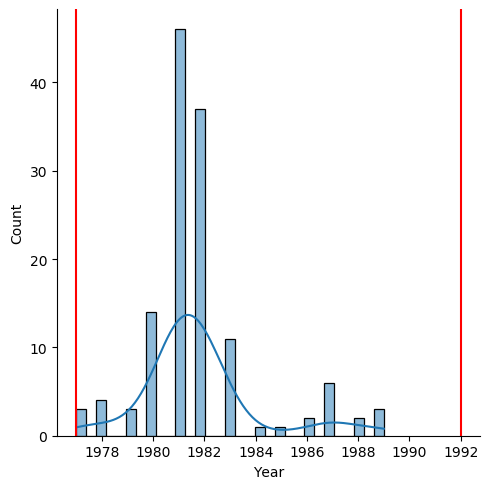

In [120]:
displot('2600')

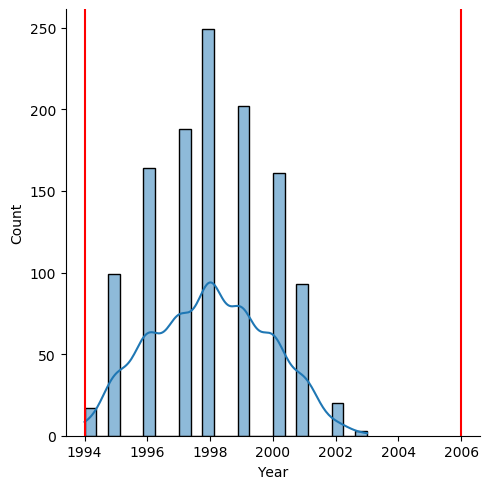

In [121]:
displot('PS')

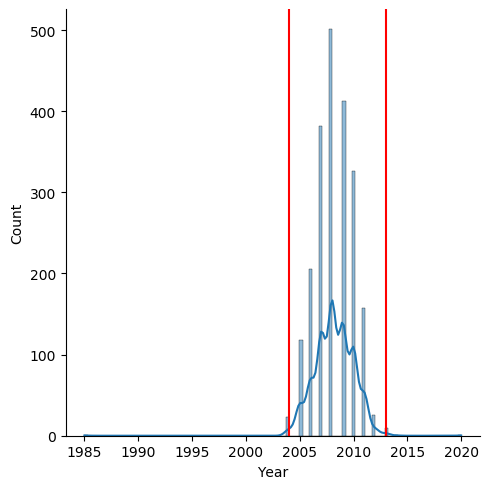

In [122]:
displot('DS')

In [123]:
df.Year.loc[df.Platform == 'DS'].value_counts()

2008    501
2009    413
2007    382
2010    326
2006    205
2011    158
2005    118
2012     25
2004     23
2013      9
1985      1
2020      1
2014      1
Name: Year, dtype: int64

In [124]:
# 구간 밖의 값들 수정
df.loc[(df.Platform == 'DS') & ((df.Year < 2004) | (df.Year > 2014))]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6905,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,270,0,0,20
8741,Strongest Tokyo University Shogi DS,DS,1985,Action,Mycom,0,0,20,0


In [125]:
df['Year'].loc[df.loc[(df.Platform == 'DS') & ((df.Year < 2004) | (df.Year > 2014))].index] = pd.DataFrame([2008, 2007], index = df.loc[(df.Platform == 'DS') & ((df.Year < 2004) | (df.Year > 2014))].index).squeeze()

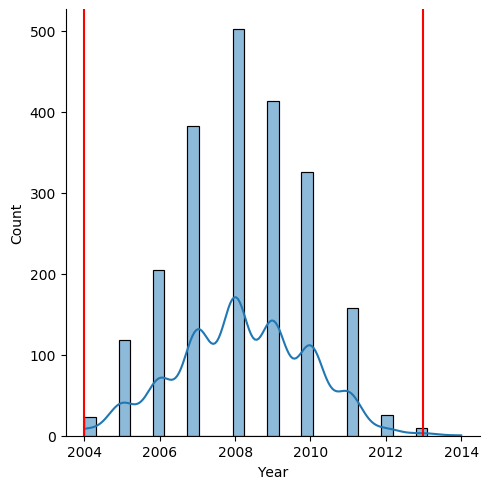

In [126]:
displot('DS')

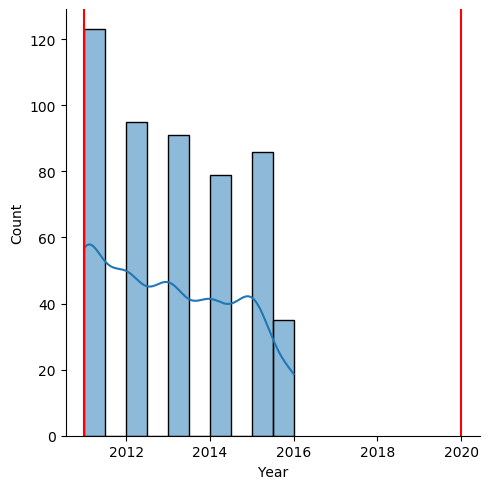

In [127]:
displot('3DS')

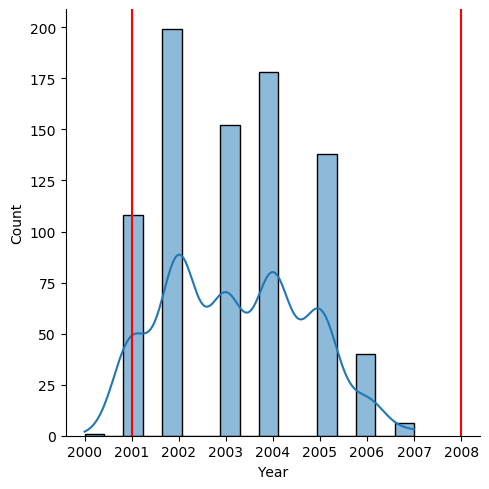

In [128]:
displot('GBA')

In [129]:
df.loc[(df.Platform == 'GBA') & (df.Year == 2000)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8525,ESPN Winter X-Games: Snowboarding 2002,GBA,2000,Sports,Konami Digital Entertainment,50,20,0,0


In [130]:
df.Year.iloc[8525] = 2002 

In [131]:
df.iloc[8525]

Name           ESPN Winter X-Games: Snowboarding 2002
Platform                                          GBA
Year                                             2002
Genre                                          Sports
Publisher                Konami Digital Entertainment
NA_Sales                                           50
EU_Sales                                           20
JP_Sales                                            0
Other_Sales                                         0
Name: 8525, dtype: object

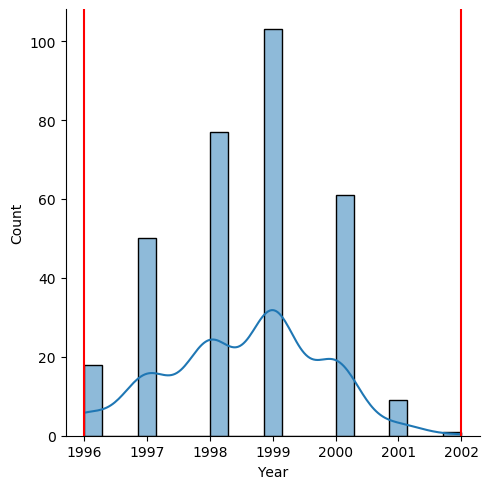

In [132]:
displot('N64')

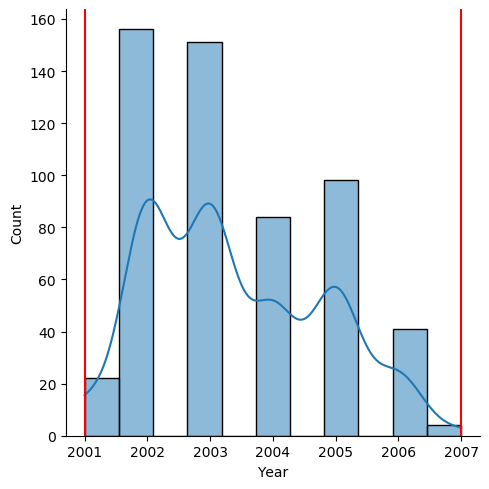

In [133]:
displot('GC')

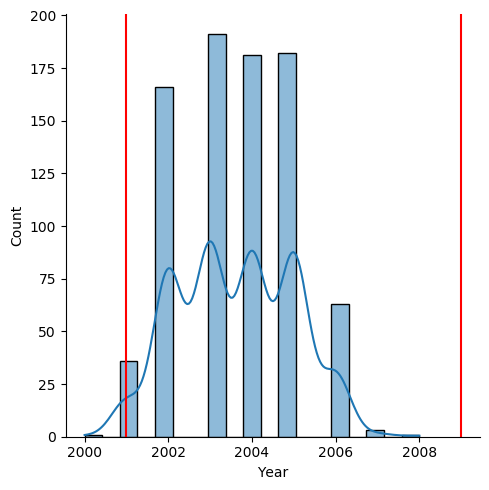

In [134]:
displot('XB')

In [135]:
df.loc[(df.Platform == 'XB') & (df.Year == 2000)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2170,NFL Fever 2002,XB,2000,Sports,Microsoft Game Studios,740,210,0,40


In [136]:
df.Year.iloc[2170] = 2001

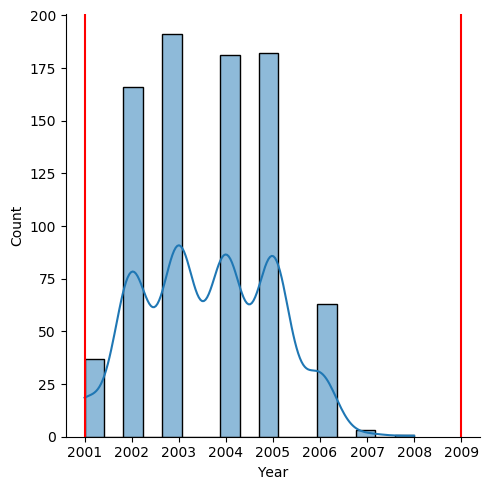

In [137]:
displot('XB')

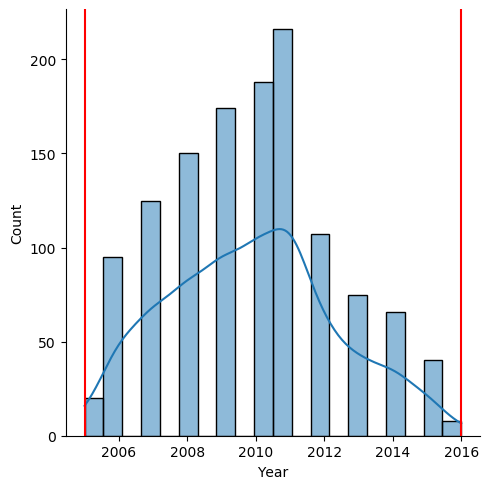

In [138]:
displot('X360')

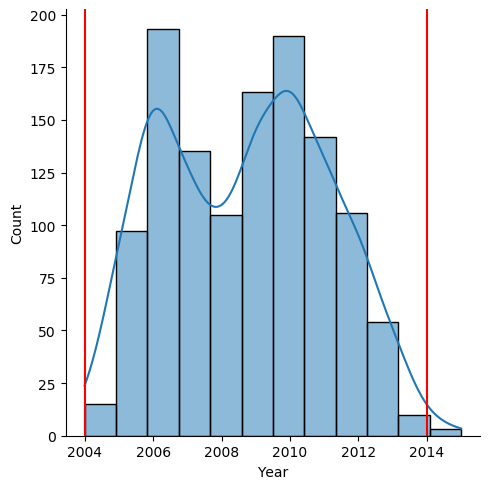

In [139]:
displot('PSP')

In [140]:
df.loc[(df.Platform == 'PSP') & (df.Year > 2013)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
633,Shinobi Koutsutsu,PSP,2014,Adventure,Idea Factory,0,0,10,0
830,Harukanaru Toki no Naka de 6,PSP,2015,Action,Tecmo Koei,0,0,20,0
1741,Bakumatsu Rock: Ultra Soul,PSP,2014,Misc,Marvelous Interactive,0,0,10,0
2903,Gakuen K: Wonderful School Days,PSP,2014,Adventure,Idea Factory,0,0,20,0
3587,Geten no Hana: Yume Akari,PSP,2014,Misc,Tecmo Koei,0,0,10,0
5457,Bakumatsu Rock,PSP,2014,Action,Marvelous Entertainment,0,0,10,0
8066,Juusanshi Engi Engetsu Sangokuden 2,PSP,2014,Action,Idea Factory,0,0,20,0
10530,Heart no Kuni no Alice: Wonderful Twin World,PSP,2014,Adventure,Quinrose,0,0,10,0
10804,Meiji Toukyou Renka: Twilight Kiss,PSP,2015,Action,Broccoli,0,0,20,0
11052,Toukiden Kiwami,PSP,2014,Action,Tecmo Koei,0,0,50,0


In [141]:
df = df.drop(df.iloc[[3587, 10530, 10804, 11328]].index).reset_index(drop = True)

In [142]:
df.loc[(df.Platform == 'PSP') & (df.Year > 2013)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
633,Shinobi Koutsutsu,PSP,2014,Adventure,Idea Factory,0,0,10,0
830,Harukanaru Toki no Naka de 6,PSP,2015,Action,Tecmo Koei,0,0,20,0
1741,Bakumatsu Rock: Ultra Soul,PSP,2014,Misc,Marvelous Interactive,0,0,10,0
2903,Gakuen K: Wonderful School Days,PSP,2014,Adventure,Idea Factory,0,0,20,0
5456,Bakumatsu Rock,PSP,2014,Action,Marvelous Entertainment,0,0,10,0
8065,Juusanshi Engi Engetsu Sangokuden 2,PSP,2014,Action,Idea Factory,0,0,20,0
11049,Toukiden Kiwami,PSP,2014,Action,Tecmo Koei,0,0,50,0
12496,Satomi Hakkenden: Hachi Tamanoki,PSP,2014,Adventure,Quinrose,0,0,10,0
13246,Pro Yaky? Spirits 2014,PSP,2014,Sports,Konami Digital Entertainment,0,0,90,0


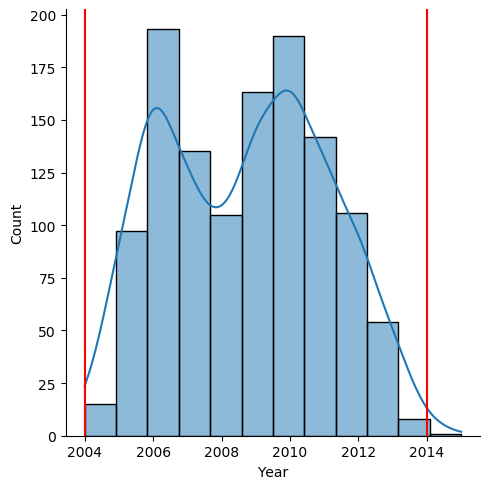

In [143]:
displot('PSP')

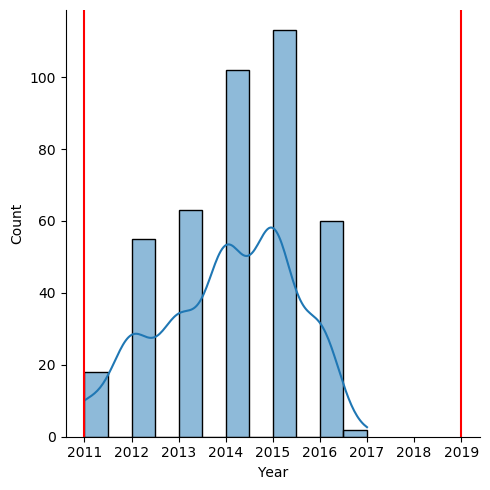

In [144]:
displot('PSV')

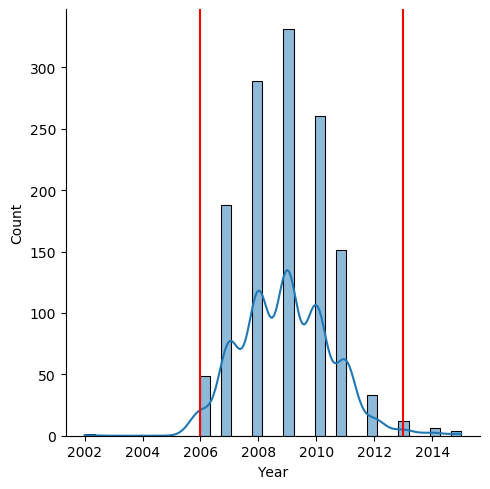

In [145]:
displot('Wii')

In [146]:
df.loc[(df.Platform == 'Wii') & ((df.Year < 2006) | (df.Year > 2013))]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3104,Skylanders: Trap Team,Wii,2014,Action,Activision,420,540,0,80
6175,How to Train Your Dragon 2,Wii,2014,Adventure,Little Orbit,50,200,0,20
6850,Skylanders: SuperChargers,Wii,2015,Action,Activision,50,190,0,20
8151,Just Dance 2016,Wii,2015,Misc,Ubisoft,520,590,0,100
8420,Reader Rabbit 2nd Grade,Wii,2002,Misc,Unknown,50,0,0,0
9901,Barbie and Her Sisters Puppy Rescue,Wii,2015,Action,Namco Bandai Games,0,60,0,0
11765,Monster High: New Ghoul in School,Wii,2015,Action,Little Orbit,0,30,0,0
13309,Just Dance 2015,Wii,2014,Misc,Ubisoft,1110,980,0,200
13343,Penguins of Madagascar,Wii,2014,Action,Namco Bandai Games,0,20,0,0
15283,Disney Planes Fire & Rescue,Wii,2014,Action,Disney Interactive Studios,0,50,0,0


In [147]:
df.Year.iloc[8420] = 2006

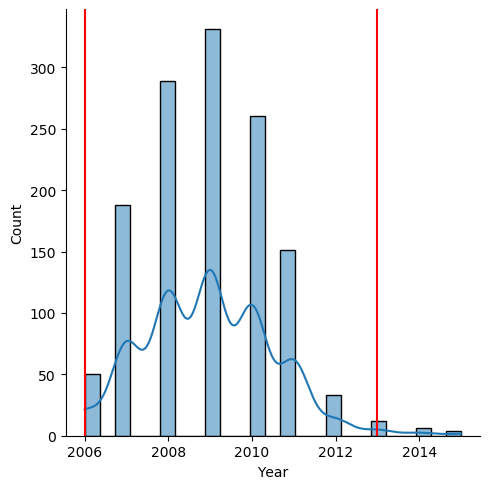

In [148]:
displot('Wii')

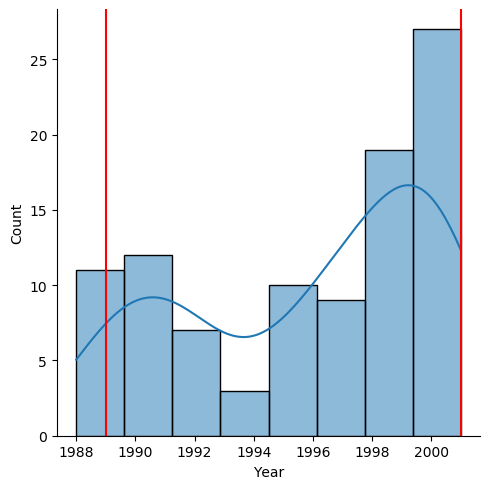

In [149]:
# 기종 바꿔가며 체크. 일일히 하니까 셀을 너무 잡아먹는다....
displot('GB')

In [150]:
df.loc[(df.Platform == 'GB') & (df.Year < 1989)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
11369,Disney's DuckTales,GB,1988,Platform,Capcom,820,230,350,30


In [151]:
df.Year.iloc[11369] = 1990

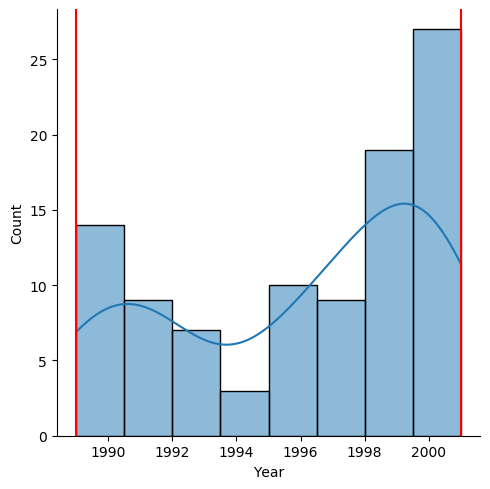

In [152]:
displot('GB')

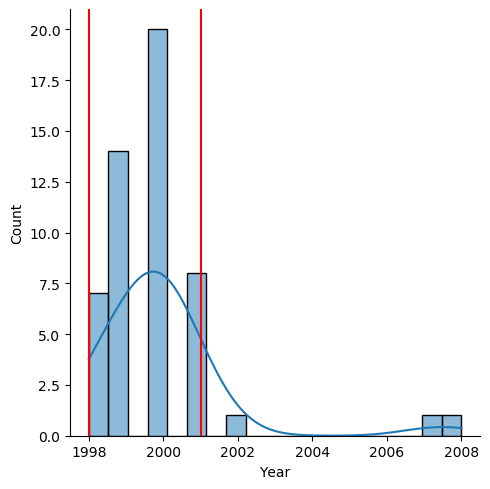

In [153]:
displot('DC')

In [154]:
df.loc[(df.Platform == 'DC') & (df.Year > 2001)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1065,"Sakura Wars 4: Koi Seyo,Otome",DC,2002,Adventure,Sega,0,0,290,0
3836,Triggerheart Exelica,DC,2007,Shooter,Warashi,0,0,20,0
6167,Pia Carrot e Youkoso!! 2.5,DC,2008,Adventure,NEC Interchannel,0,0,40,0


In [155]:
df.Year.iloc[6167] = 2002

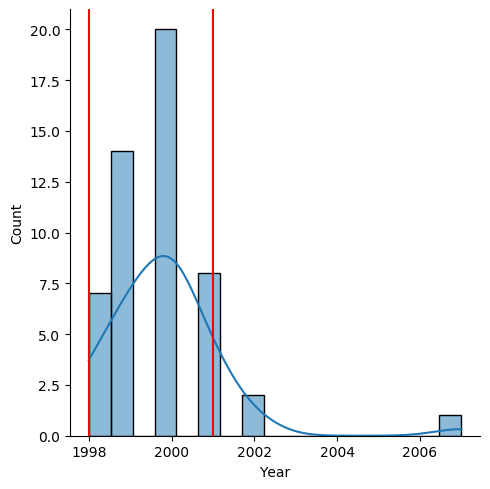

In [156]:
displot('DC')

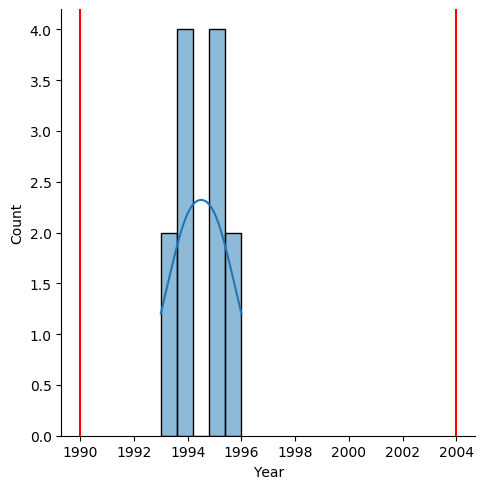

In [157]:
displot('NG')

### 게임명과 장르 매칭 여부

- 언제 다 파해쳐보니...
- 예를 들어 닌텐도ds의 장기게임이 전략이 아니라 액션으로 되어있음



In [158]:
df.Genre.value_counts()

Action          3303
Sports          2341
Misc            1733
Role-Playing    1483
Shooter         1306
Adventure       1279
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64

### 배급사 누락건 수정
-[이전](#플랫폼과-Year의-매칭) - [다음](#장르-null값-채우기)
- 굳이 안해도 됨

In [159]:
df.loc[df.Name.duplicated() & df.Publisher.isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2070,World of Tanks,X360,2014,Shooter,NaN,0,30,0,0
9874,Mario Tennis,3DS,2012,Sports,NaN,0,0,20,0
11635,AKB1/48: Idol to Guam de Koishitara...,X360,2011,Misc,NaN,0,0,10,0
16061,Bound By Flame,X360,2014,Role-Playing,NaN,0,10,0,0


In [160]:
df.loc[df.Name == 'World of Tanks']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
27,World of Tanks,PC,2011,Shooter,Wargaming.net,0,230,0,60
2070,World of Tanks,X360,2014,Shooter,NaN,0,30,0,0


In [161]:
df_pub = df.loc[df.Publisher.isnull()]
df_pub

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,UK Truck Simulator,PC,2010,Simulation,NaN,0,30,0,0
1313,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004,Misc,NaN,170,60,0,0
1560,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004,Misc,NaN,120,40,0,0
1789,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,NaN,160,60,0,0
1879,Monster Hunter Frontier Online,PS3,2007,Role-Playing,NaN,0,0,50,0
1961,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,NaN,460,170,0,10
2070,World of Tanks,X360,2014,Shooter,NaN,0,30,0,0
2970,Chou Soujuu Mecha MG,DS,2006,Simulation,NaN,0,0,60,0
3184,Action Man-Operation Extreme,PS,2000,Action,NaN,50,30,0,10
3412,Dance with Devils,PSV,2016,Action,NaN,0,0,10,0


In [162]:
len(list(df.loc[df.Publisher.isnull()].Name))

57

In [163]:
pub = ['SCS Software',
'Majesco Entertainment',
'Majesco Entertainment',
'Majesco Entertainment',
'Capcom',
'Majesco Entertainment',
'Wargaming',
'Banpresto',
'Hasbro Interactive',
'Rejet',
'Seta Corporation',
'Yuke`s',
'Gearbox Software',
'Majesco Entertainment', 
'07th Expansion',
'Majesco Entertainment',
'Majesco Entertainment',
'Majesco Entertainment',
'Navel',
'Konami',
'Firefly Studios',
'Buena Vista Games',
'Majesco Entertainment',
'Sony Computer Entertainment',
'Majesco Entertainment',
'Sonic Team',
'Black Lantern Studios',
'Majesco Entertainment',
'Bandai Namco Games',
'Camelot Software Planning',
'Nintendo',
'Giants Software',
'Electronic Arts',
'Majesco Entertainment',
'Bandai Namco Games',
'Giants Software',
'Black Lantern Studios',
'Majesco Entertainment',
'Majesco Entertainment',
'THQ',
'THQ',
'Majesco Entertainment',
'Black Lantern Studios',
'Bandai Namco Games',
'Sonic Powered',
'Nintendo',
'Majesco Entertainment',
'NIS America',
'HiT Entertainment',
'Astragon',
'Majesco Entertainment',
'THQ',
'Majesco Entertainment',
'Atari',
'Ubisoft',
'Focus Home Interactive',
'Bandai Namco Games']

In [164]:
df_pub['Publisher'].iloc[0:57]

272      NaN
1313     NaN
1560     NaN
1789     NaN
1879     NaN
1961     NaN
2070     NaN
2970     NaN
3184     NaN
3412     NaN
3533     NaN
3562     NaN
3638     NaN
3683     NaN
4307     NaN
4366     NaN
5206     NaN
5244     NaN
5386     NaN
6208     NaN
7368     NaN
7982     NaN
8036     NaN
8234     NaN
8353     NaN
8649     NaN
8871     NaN
9126     NaN
9681     NaN
9874     NaN
10153    NaN
10220    NaN
11304    NaN
11492    NaN
11635    NaN
11670    NaN
12120    NaN
12170    NaN
12462    NaN
12554    NaN
12894    NaN
13176    NaN
13198    NaN
13444    NaN
13760    NaN
13804    NaN
13831    NaN
13917    NaN
14377    NaN
14468    NaN
14822    NaN
15145    NaN
15362    NaN
15663    NaN
15799    NaN
16061    NaN
16124    NaN
Name: Publisher, dtype: object

In [165]:
df_pub['Publisher'].iloc[0:57]  = pd.DataFrame(pub[0:57], index = df_pub['Publisher'].iloc[0:57].index).squeeze()
df['Publisher'].loc[df_pub.index] = df_pub['Publisher']

In [166]:
df.loc[df_pub.index]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,UK Truck Simulator,PC,2010,Simulation,SCS Software,0,30,0,0
1313,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004,Misc,Majesco Entertainment,170,60,0,0
1560,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004,Misc,Majesco Entertainment,120,40,0,0
1789,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,Majesco Entertainment,160,60,0,0
1879,Monster Hunter Frontier Online,PS3,2007,Role-Playing,Capcom,0,0,50,0
1961,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,Majesco Entertainment,460,170,0,10
2070,World of Tanks,X360,2014,Shooter,Wargaming,0,30,0,0
2970,Chou Soujuu Mecha MG,DS,2006,Simulation,Banpresto,0,0,60,0
3184,Action Man-Operation Extreme,PS,2000,Action,Hasbro Interactive,50,30,0,10
3412,Dance with Devils,PSV,2016,Action,Rejet,0,0,10,0


In [167]:
df.Publisher.value_counts()

Electronic Arts                 1352
Activision                       975
Namco Bandai Games               932
Ubisoft                          922
Konami Digital Entertainment     832
                                ... 
Ertain                             1
Glams                              1
Warashi                            1
Imax                               1
Griffin International              1
Name: Publisher, Length: 595, dtype: int64

In [168]:
df.Publisher.loc[df.Publisher.str.contains('Bandai')] = 'Namco Bandai Games'

In [169]:
df.Publisher.loc[df.Publisher.str.contains('Konami')].value_counts()

Konami Digital Entertainment    832
Konami                            1
Name: Publisher, dtype: int64

In [170]:
df.Publisher.loc[df.Publisher.str.contains('Konami')] = 'Konami Digital Entertainment'

In [171]:
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre          50
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

### 장르 null값 채우기
-[이전](#배급사-누락건-수정) - [다음](#지역별-인기-장르)

In [172]:
df.Genre.value_counts()

Action          3303
Sports          2341
Misc            1733
Role-Playing    1483
Shooter         1306
Adventure       1279
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64

In [173]:
df.loc[df.Name.str.contains('Grand Theft').astype(bool)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
761,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,Take-Two Interactive,2900,2830,240,1750
797,Grand Theft Auto: Vice City Stories,PS2,2007,Action,Take-Two Interactive,780,30,30,130
955,"Grand Theft Auto: Mission Pack #1, London 1969",PS,1998,Adventure,Take-Two Interactive,60,40,0,10
2008,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3800,5810,360,2020
2079,Grand Theft Auto: Vice City,PC,2003,Action,Take-Two Interactive,0,30,0,10
3447,Rockstar Games Double Pack: Grand Theft Auto I...,PS2,2003,Action,Take-Two Interactive,850,660,0,220
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010,9270,970,4140
3631,Grand Theft Auto: San Andreas,X360,2008,Action,Take-Two Interactive,80,30,0,10
4147,Grand Theft Auto IV,PC,2008,NaN,Take-Two Interactive,10,790,0,80
5266,Rockstar Games Double Pack: Grand Theft Auto I...,XB,2003,Action,Take-Two Interactive,1840,560,0,90


In [174]:
df.Genre.isnull().sum()

50

In [175]:
list(df[df.Genre.isnull()].Name)

['Ape Escape: On the Loose',
 'NBA Ballers',
 'NFL Street',
 'SingStar Singalong With Disney',
 'Pokemon X/Pokemon Y',
 'NASCAR Racing',
 'Jurassic Park III: Island Attack',
 'The Godfather: Dons Edition',
 'Ski-Doo Snowmobile Challenge',
 'Batman Beyond: Return of the Joker',
 'Princess Saver! Eternal Love for My Lady',
 'MVP Baseball 2004',
 'Grand Theft Auto IV',
 'Brain Quest: Grades 5 & 6',
 'Dragon Ball Z: Ultimate Tenkaichi',
 'Wii Party',
 'Astonishia Story',
 'Chrono Cross',
 'Back to the Future: The Game',
 'Medabots: Metabee',
 'UFO: Trilogy',
 'Largo Winch .// Commando Sar',
 'Madden NFL 11',
 'Ukiyo no Shishi',
 'Myth Makers: Orbs of Doom',
 'Final Fantasy XII',
 'The Mummy: Tomb of the Dragon Emperor',
 'Bakemonogatari Portable',
 'Karaoke Revolution Glee: Volume 3',
 'Puppy Palace',
 'Yakuza 3',
 'Cloudy With a Chance of Meatballs',
 'F-Zero X',
 'The History Channel: Battle for the Pacific',
 'Time Travelers',
 'Ice Hockey',
 'Onimusha: Warlords',
 'Virtual Chess 64',
 

In [176]:
gen = ['Platform',
'Sports simulation',
'Sports simulation',
'Music',
'Role-playing',
'Racing',
'Action-Adventure',
'Action-Adventure',
'Racing',
'Action',
'Platform',
'Sports simulation',
'Action',
'Misc',
'Fighting',
'Party game',
'Role-playing',
'Role-playing',
'adventure',
'Role-playing game',
'Adventure',
'Adventure',
'Sports simulation',
'Role-playing',
'Platform',
'Role-playing',
'Action',
'Visual novel',
'Music',
'Simulation',
'Action',
'Platformer',
'Racing',
'shooter',
'Visual novel',
'Sports',
'Action',
'Strategy',
'Puzzle',
'Action',
'Adventure',
'Action',
'Racing',
'shooter',
'Party game',
'Action-Adventure',
'Puzzle',
'Racing',
'simulator',
'Racing']

In [177]:
gen = pd.DataFrame(gen, index = df.loc[df.Genre.isnull()].index, columns = ['Genre'])

In [178]:
gen

,Genre
50,Platform
408,Sports simulation
1328,Sports simulation
1582,Music
1971,Role-playing
2043,Racing
2497,Action-Adventure
3353,Action-Adventure
3363,Racing
3470,Action


In [179]:
gen.loc[gen.Genre.str.contains('Sport')] = 'Sports'

gen.loc[gen.Genre.str.contains('Platform')] = 'Platform'

gen.loc[(gen.Genre.str.contains('Party')) | (gen.Genre.str.contains('novel')) | (gen.Genre.str.contains('Music'))] = 'Misc'

gen.loc[gen.Genre.str.contains('ooter')] = 'Shooter'

gen.loc[gen.Genre.str.contains('imula')] = 'Simulation'

gen.loc[gen.Genre.str.contains('Action')] = 'Action'

gen.loc[gen.Genre.str.contains('Role')] = 'Role-Playing'

gen.loc[gen.Genre.str.contains('venture')] = 'Adventure'

In [180]:
gen.Genre.value_counts()

Action          10
Misc             7
Racing           6
Role-Playing     6
Sports           5
Platform         4
Adventure        4
Puzzle           2
Shooter          2
Simulation       2
Fighting         1
Strategy         1
Name: Genre, dtype: int64

In [181]:
# 원 데이터의 장르와 동일함
set(gen.Genre.value_counts().index) - set(df.Genre.value_counts().index)

set()

In [182]:
# 기존 데이터의 장르 미스매치 검정은 차마 못하겠음

In [183]:
# 원 데이터 수정

df['Genre'].loc[gen.index] = gen['Genre'].iloc[0:50]
    

In [184]:
df['Genre'].value_counts()

Action          3313
Sports          2346
Misc            1740
Role-Playing    1489
Shooter         1308
Adventure       1283
Racing          1249
Platform         888
Simulation       867
Fighting         848
Strategy         681
Puzzle           580
Name: Genre, dtype: int64

In [185]:
df['Genre'].isnull().sum()

0

In [186]:
# 결측치 완전 수정
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

# 인사이트 탐색


- [지역별 인기 장르](#지역별-인기-장르)
- [인기게임분석](#인기게임분석)
- [지역별 플랫폼 점유율 비교](#지역별-플랫폼-점유율-비교)


### 지역별 인기 장르

-[이전](#장르-null값-채우기) - [다음](#인기게임분석)

In [187]:
df['Global_Sales'] = df[['NA_Sales', 'JP_Sales', 'EU_Sales']].sum(axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40,0,0,0,40
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170,0,0,10,170
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20,0,20
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40,0,0,0,40
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120,90,0,40,210
...,...,...,...,...,...,...,...,...,...,...
16587,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150,40,0,10,190
16588,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10,0,0,0,10
16589,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440,190,30,130,660
16590,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50,50,250,30,350


In [188]:
# 장르별 데이터

df_genre = df.groupby(['Genre', 'Year']).agg({'NA_Sales': 'sum',
                                       'EU_Sales': 'sum',
                                       'JP_Sales': 'sum',
                                       'Other_Sales': 'sum',
                                       'Global_Sales': 'sum',
                                       })
df_genre = df_genre.reset_index(level='Year')
df_genre = df_genre.reset_index()
df_genre

,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,1977,1170,70,0,10,1240
1,Action,1978,250,20,0,0,270
2,Action,1979,290,20,0,0,310
3,Action,1980,1170,70,0,0,1240
4,Action,1981,13860,810,0,120,14670
...,...,...,...,...,...,...,...
394,Strategy,2012,940,990,1110,290,3040
395,Strategy,2013,2390,2470,820,640,5680
396,Strategy,2014,160,220,550,40,930
397,Strategy,2015,570,990,150,120,1710


In [189]:
# 각 바(매출 최댓값)의 장르 찾기


def max_genre(X,Y): # X: 지역매출, Y, 년도
        n = df_genre['Genre'].loc[df_genre[f'{X}'] == df_genre[f'{X}'].loc[df_genre.Year == Y].sort_values(ascending = False).iloc[0]]
        return n.iloc[0]


def max_sales(X,Y):
    n = df_genre[f'{X}'].loc[df_genre.Year == Y].sort_values(ascending = False).iloc[0]
    return n


def max_df(X):
    pop_genre = []
    pop_sales = []
    
    for i in df_genre.Year.unique():
        pop_genre.append(max_genre(f'{X}', i))
        pop_sales.append(max_sales(f'{X}', i))
    
    df = pd.DataFrame({'Genre' : pop_genre, 'Sales' : pop_sales})
    return df



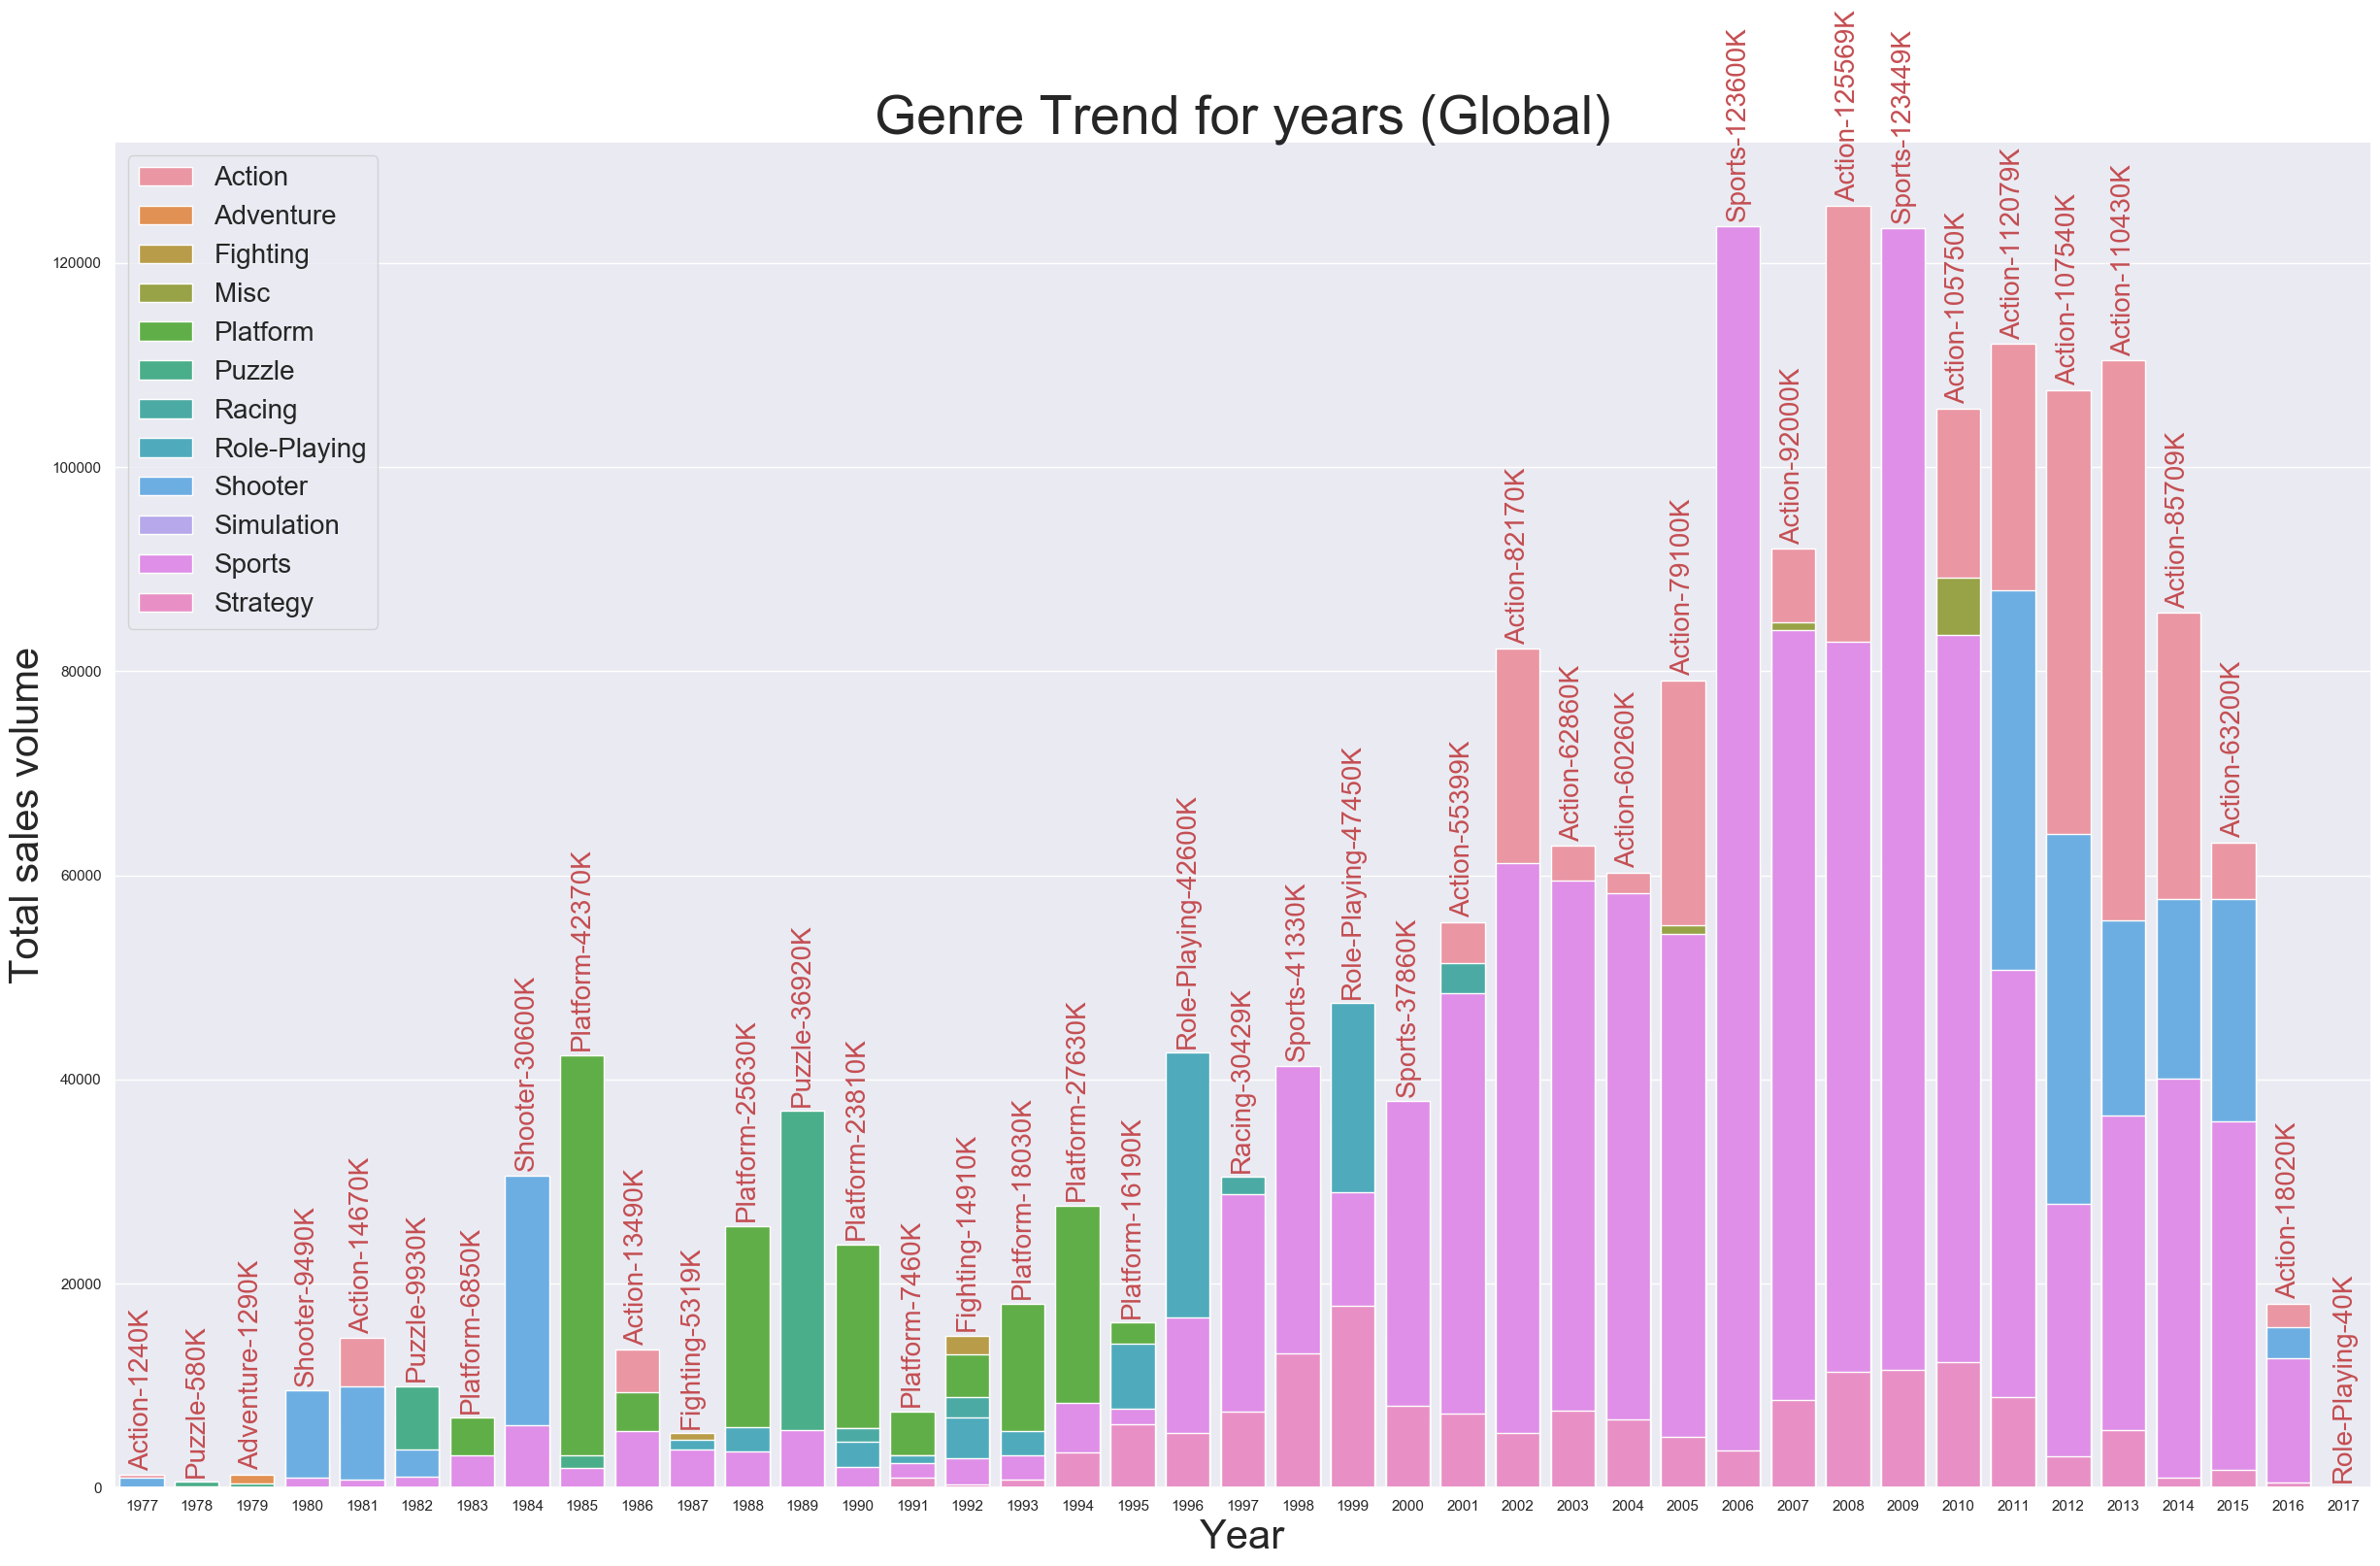

In [190]:
# 글로벌 트렌드
sns.set(rc={'legend.fontsize': 20})
plt.figure(figsize=(30, 18))
sns.barplot(x='Year', y = 'Global_Sales', hue = 'Genre', data = df_genre, dodge=False)


for i in range(len(max_df('Global_Sales'))):
    plt.text(i, max_df('Global_Sales').iloc[i,1] + 1000, max_df('Global_Sales').iloc[i,0] + '-' + str(round(max_df('Global_Sales').iloc[i,1], 2)) + 'K', color='r', size=20, rotation= 90, ha="center")
    
plt.title("Genre Trend for years (Global)", fontsize=40)
plt.xlabel("Year", fontsize=30)
plt.ylabel("Total sales volume", fontsize=30)
plt.legend(loc='upper left')
plt.show()

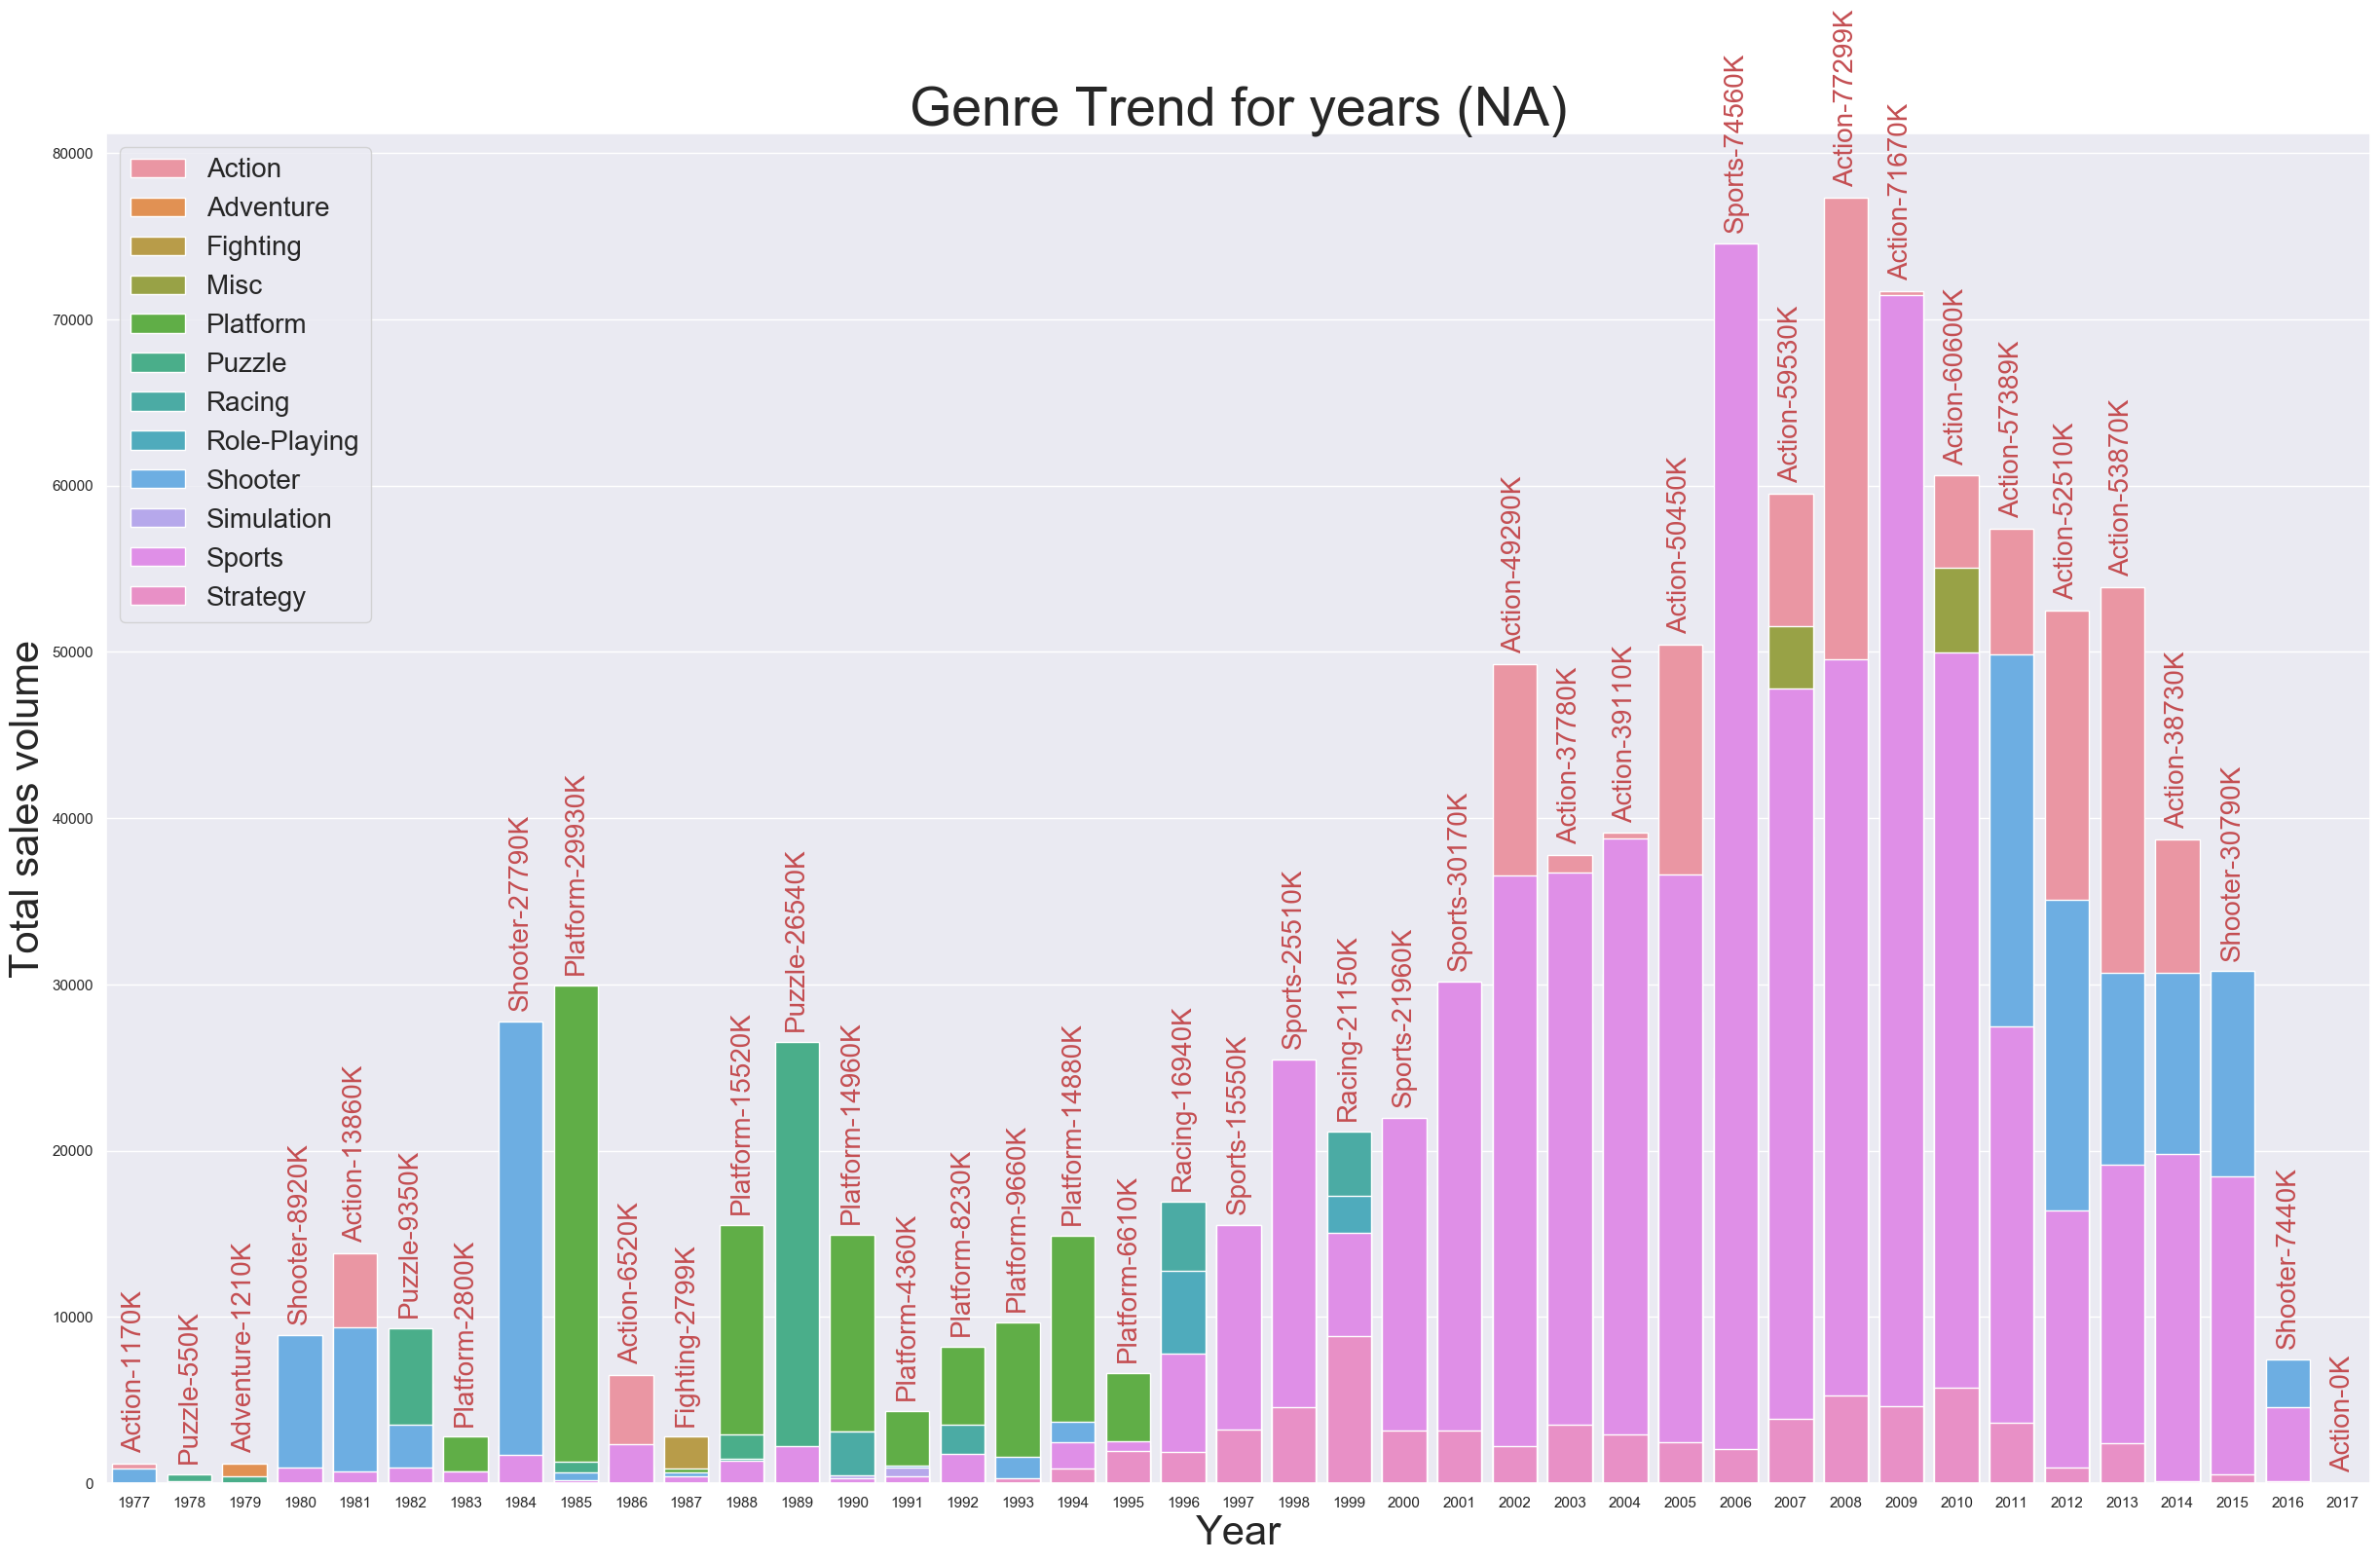

In [191]:
# 미국 트렌드
plt.figure(figsize=(30, 18))
sns.barplot(x='Year', y = 'NA_Sales', hue = 'Genre', data = df_genre, dodge=False)

for i in range(len(max_df('NA_Sales'))):
    plt.text(i, max_df('NA_Sales').iloc[i,1] + 1000, max_df('NA_Sales').iloc[i,0] + '-' + str(round(max_df('NA_Sales').iloc[i,1], 2)) + 'K', color='r', size=20, rotation= 90, ha="center")
    
plt.title("Genre Trend for years (NA)", fontsize=40)
plt.xlabel("Year", fontsize=30)
plt.ylabel("Total sales volume", fontsize=30)
plt.legend(loc='upper left')
plt.show()

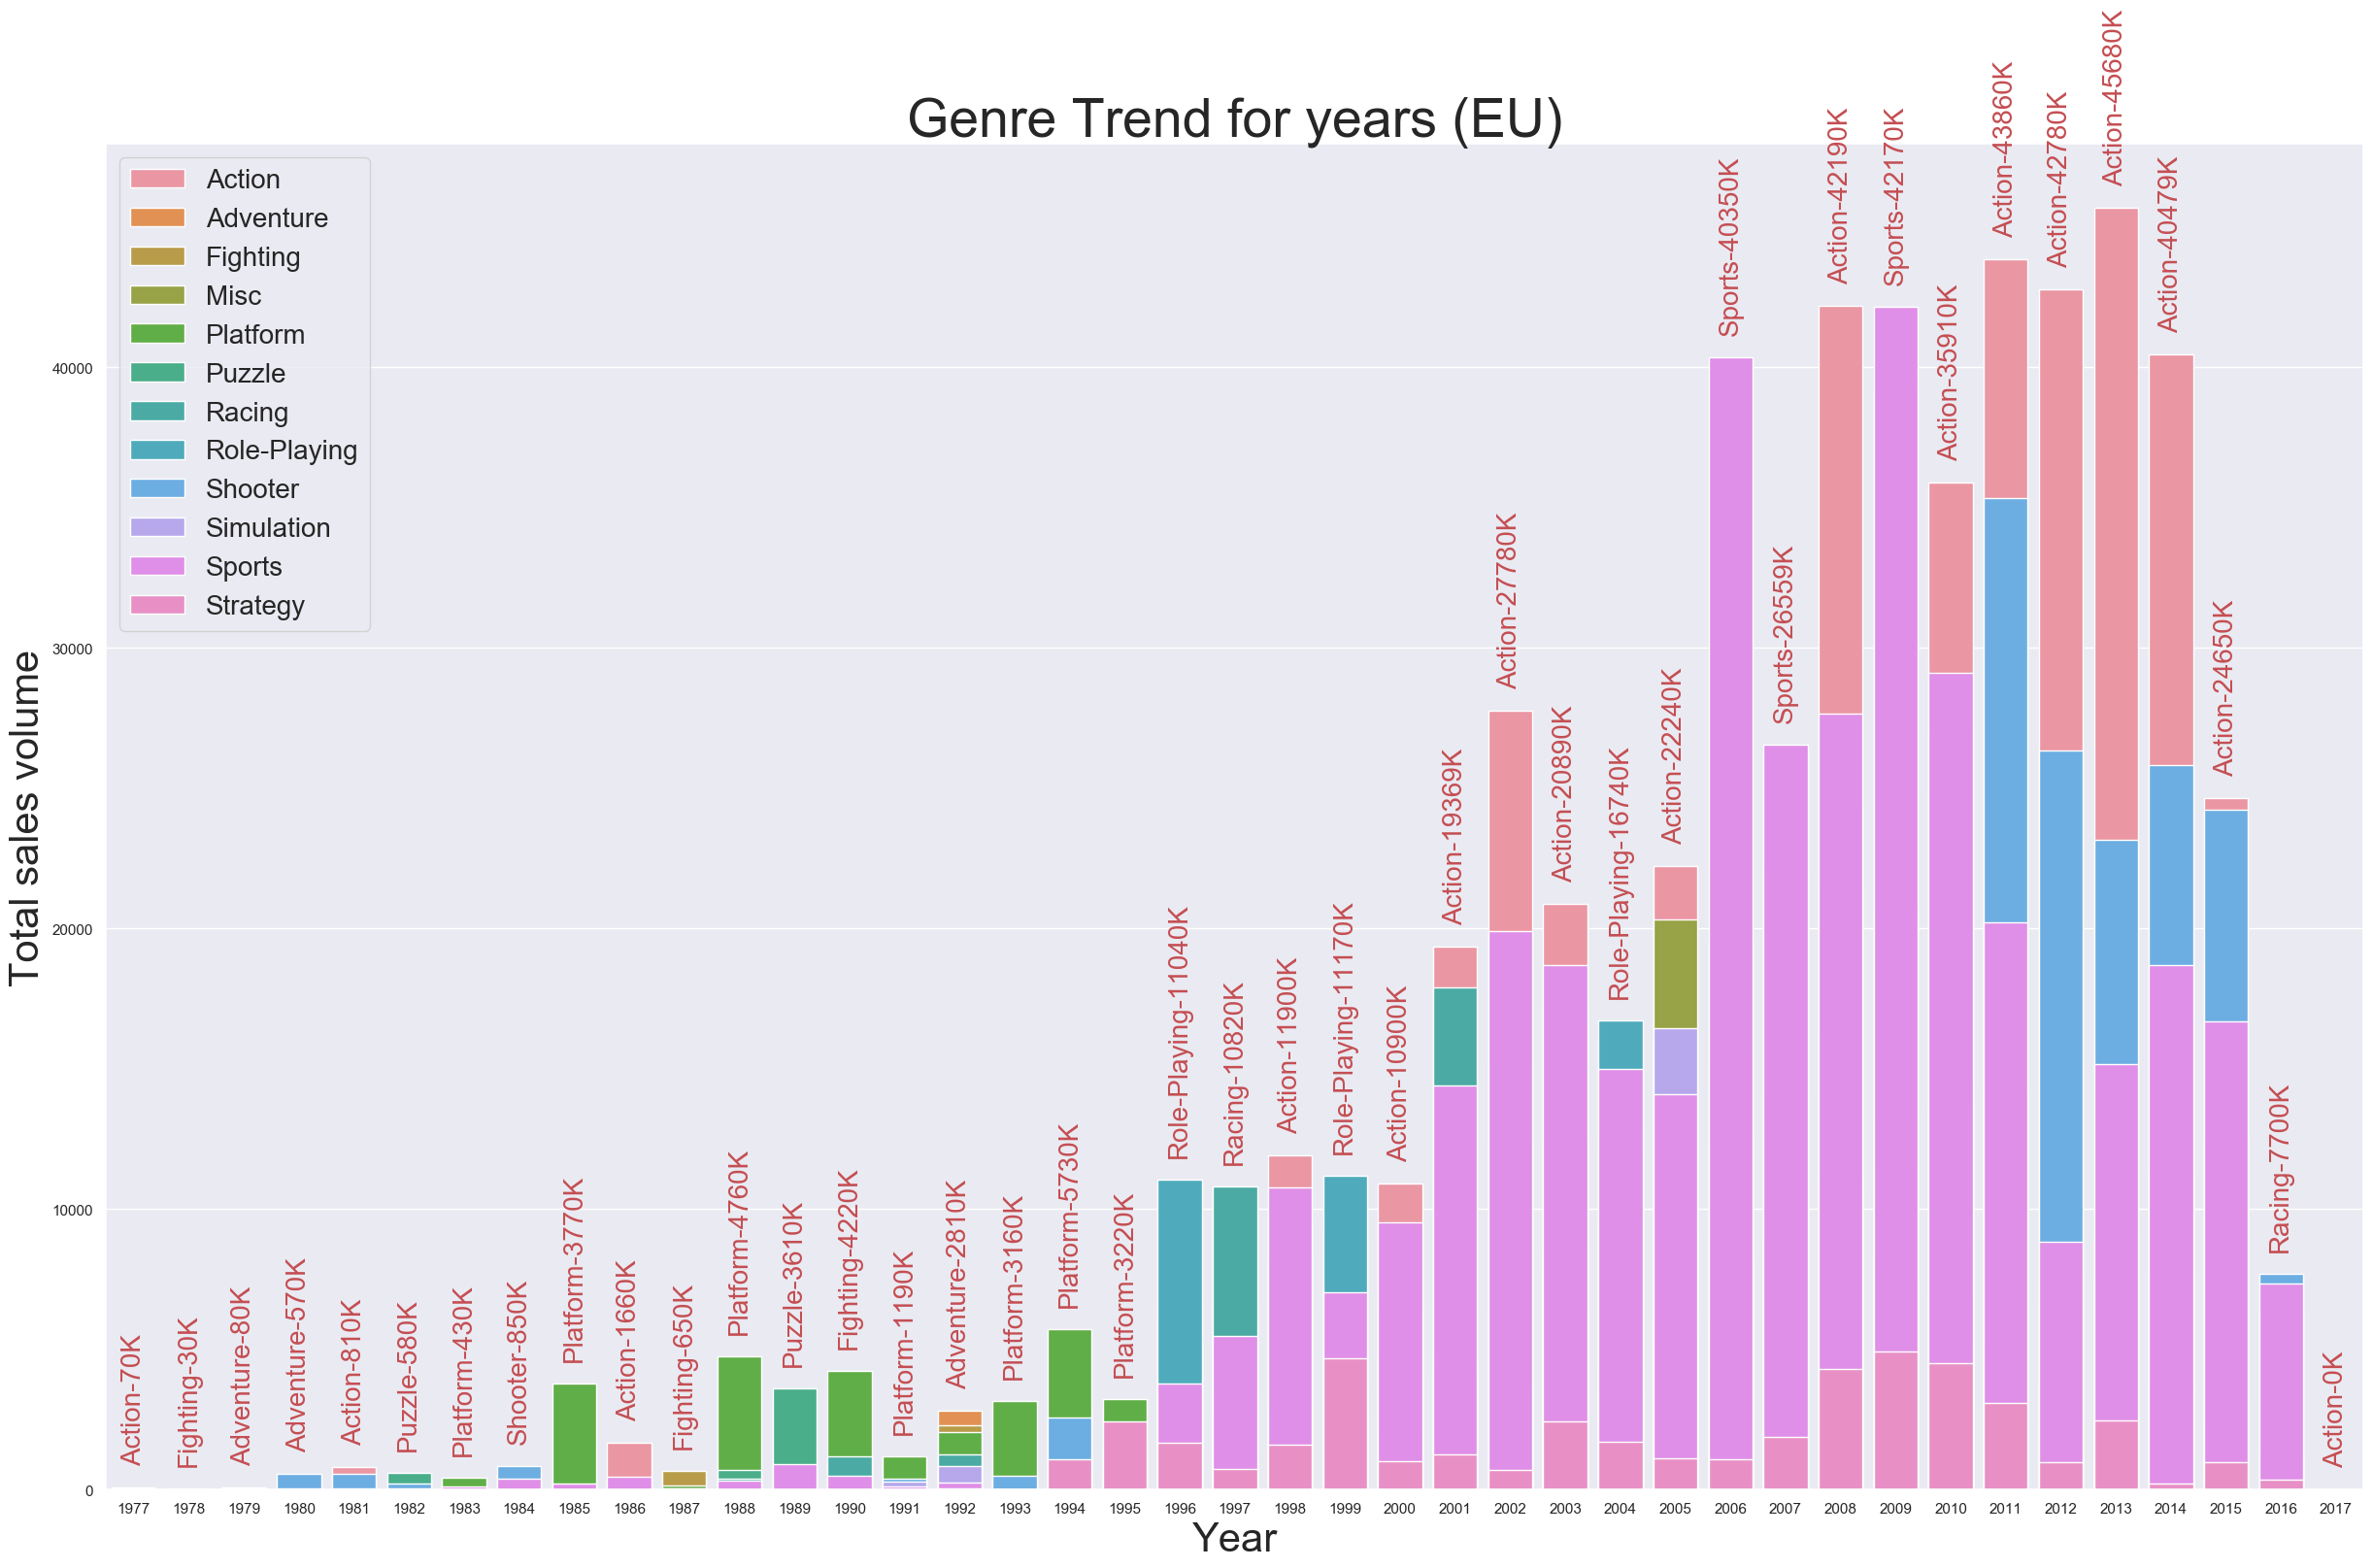

In [192]:
# 유럽 트렌드
plt.figure(figsize=(30, 18))
sns.barplot(x='Year', y = 'EU_Sales', hue = 'Genre', data = df_genre, dodge=False)

for i in range(len(max_df('EU_Sales'))):
    plt.text(i, max_df('EU_Sales').iloc[i,1] + 1000, max_df('EU_Sales').iloc[i,0] + '-' + str(round(max_df('EU_Sales').iloc[i,1], 2)) + 'K', color='r', size=20, rotation= 90, ha="center")
    
plt.title("Genre Trend for years (EU)", fontsize=40)
plt.xlabel("Year", fontsize=30)
plt.ylabel("Total sales volume", fontsize=30)
plt.legend(loc='upper left')
plt.show()

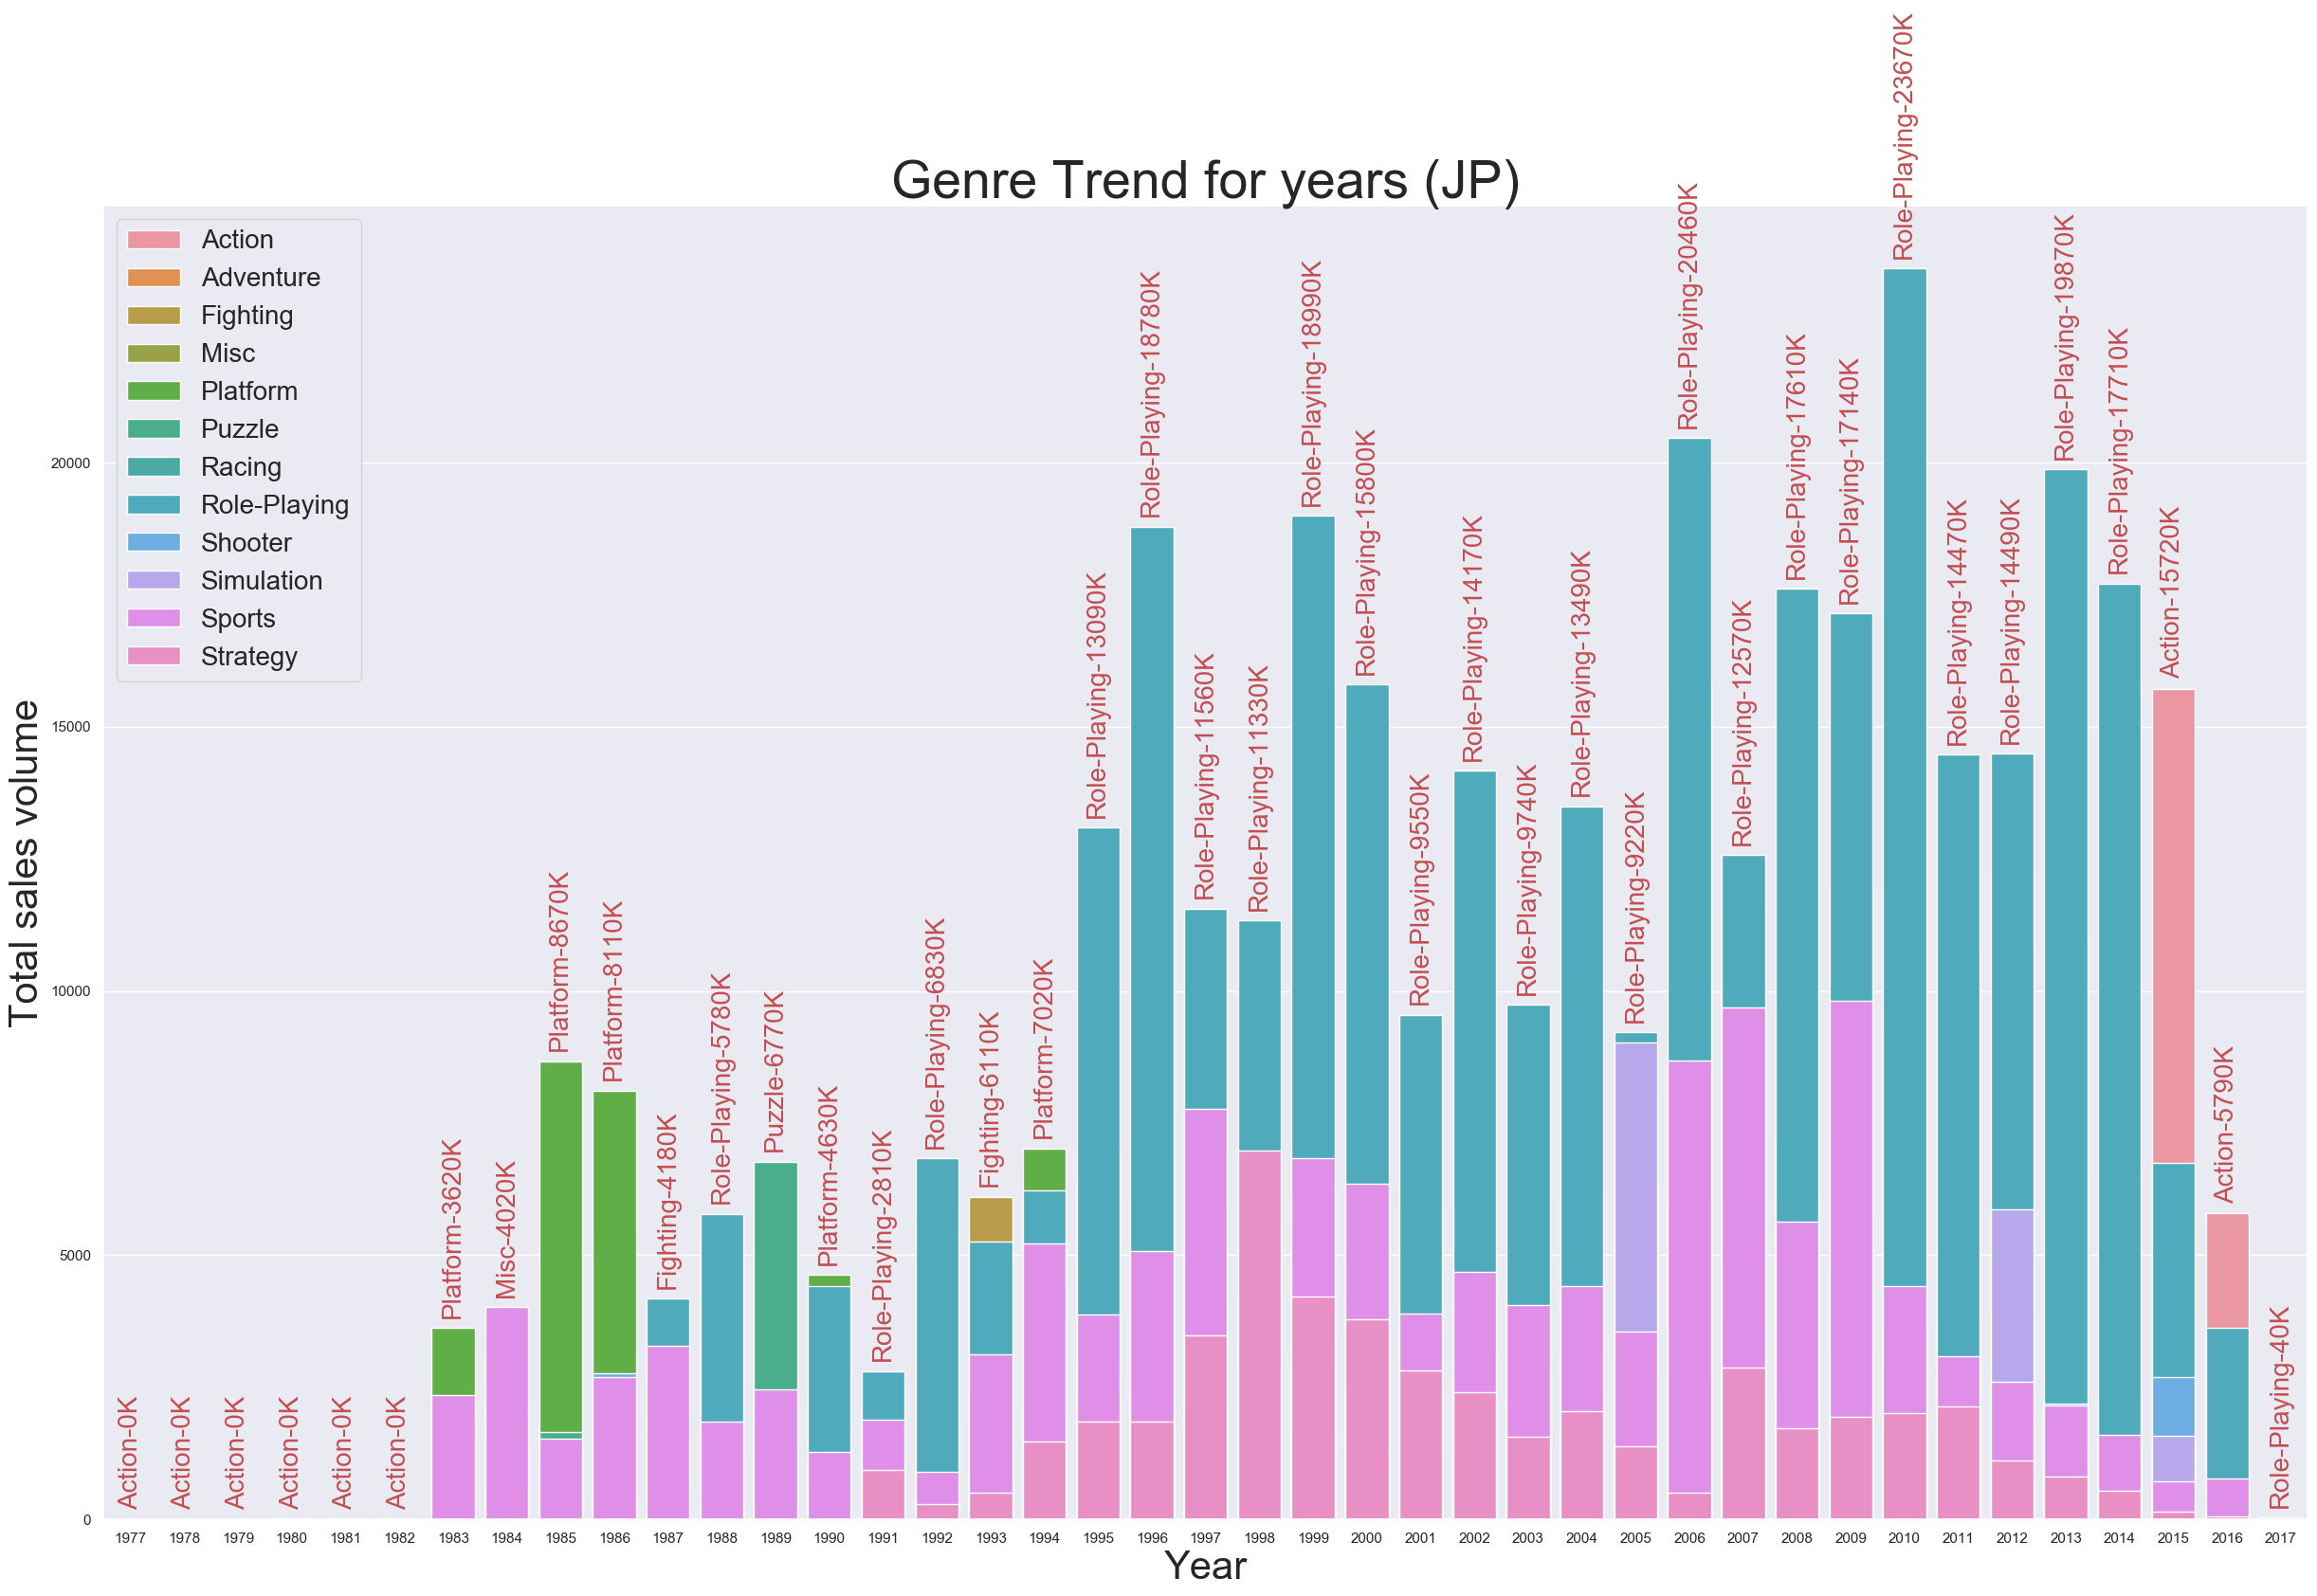

In [193]:
# 일본 트렌드
plt.figure(figsize=(30, 18))
sns.barplot(x='Year', y = 'JP_Sales', hue = 'Genre', data = df_genre, dodge=False)

for i in range(len(max_df('JP_Sales'))):
    plt.text(i, max_df('JP_Sales').iloc[i,1] + 300, max_df('JP_Sales').iloc[i,0] + '-' + str(round(max_df('JP_Sales').iloc[i,1], 2)) + 'K', color='r', size=20, rotation= 90, ha="center")
    
plt.title("Genre Trend for years (JP)", fontsize=40)
plt.xlabel("Year", fontsize=30)
plt.ylabel("Total sales volume", fontsize=30)
plt.legend(loc='upper left')
plt.show()

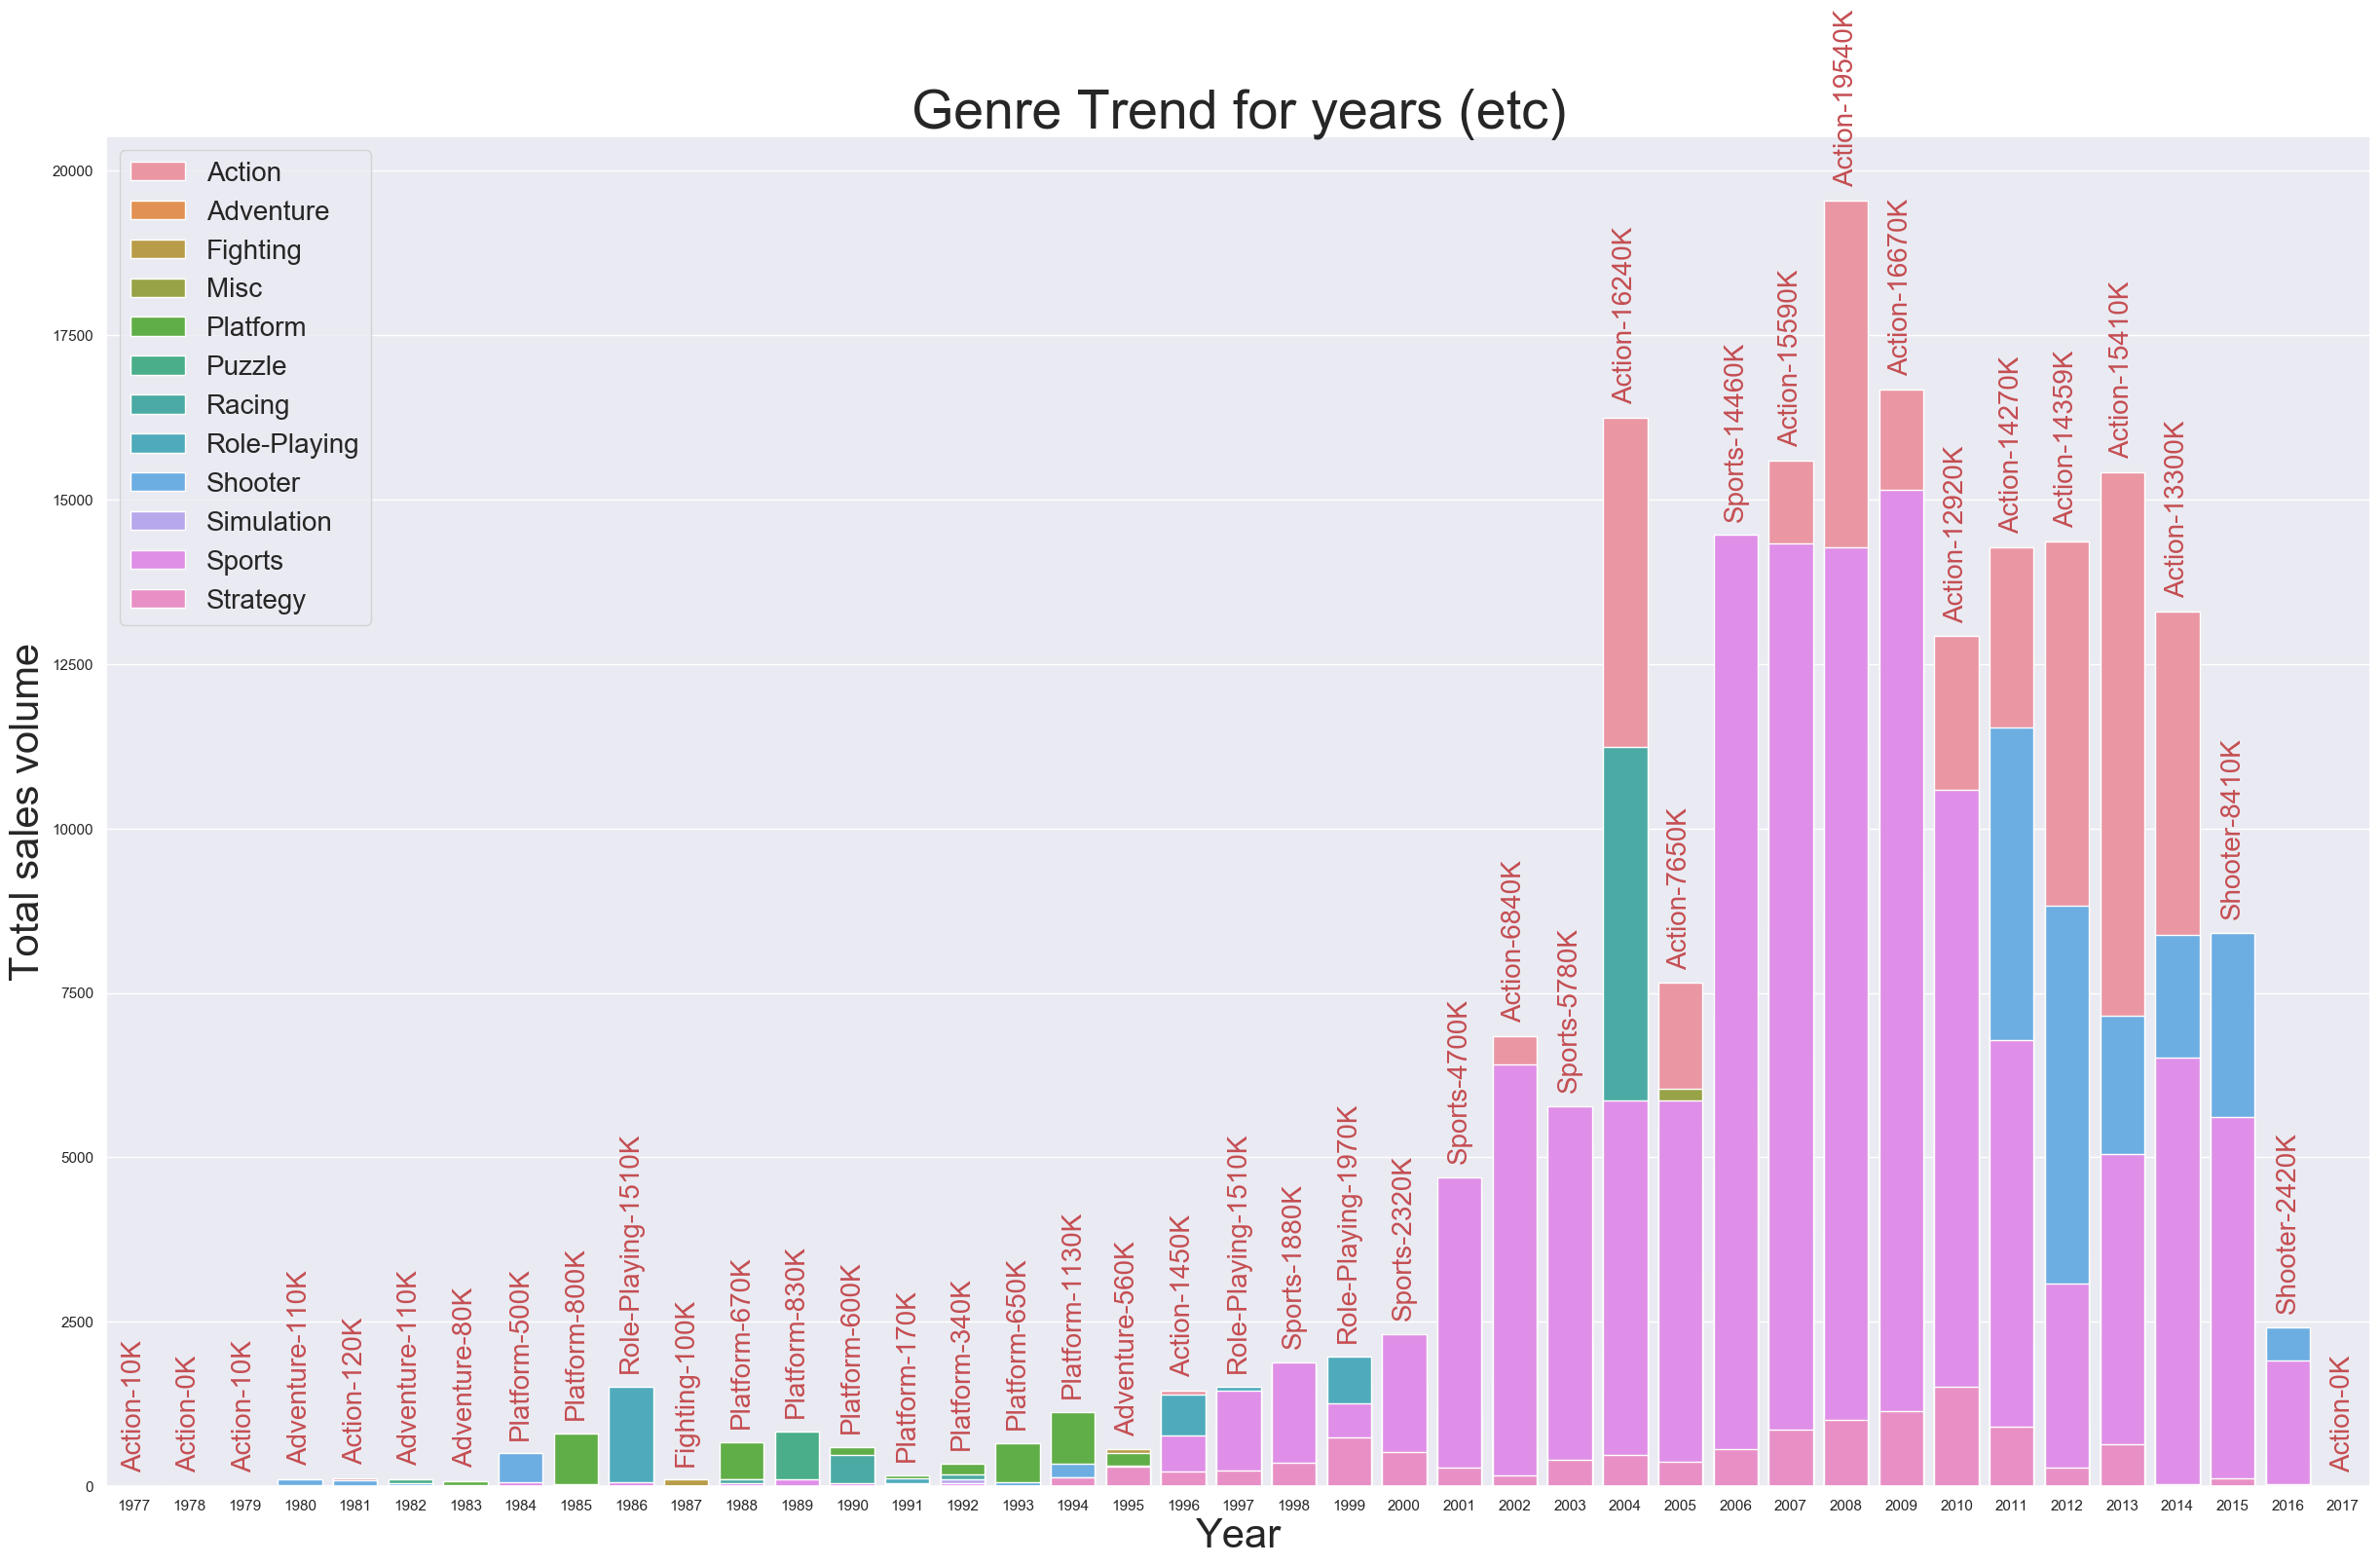

In [194]:
# 기타 국가들 트렌드
plt.figure(figsize=(30, 18))
sns.barplot(x='Year', y = 'Other_Sales', hue = 'Genre', data = df_genre, dodge=False)

for i in range(len(max_df('Other_Sales'))):
    plt.text(i, max_df('Other_Sales').iloc[i,1] + 300, max_df('Other_Sales').iloc[i,0] + '-' + str(round(max_df('Other_Sales').iloc[i,1], 2)) + 'K', color='r', size=20, rotation= 90, ha="center")
    
plt.title("Genre Trend for years (etc)", fontsize=40)
plt.xlabel("Year", fontsize=30)
plt.ylabel("Total sales volume", fontsize=30)
plt.legend(loc='upper left')
plt.show()

In [195]:
# 2002 ~ 2016년의 지역별 각 전체 출고량 대비 장르별 출고 비율 순위

df_genre_recent = df_genre.loc[(df_genre.Year >= 2002) & (df_genre.Year <= 2016)] # 2002 ~ 2016까지의 데이터
df_genre_recent_st = df_genre_recent.groupby('Genre').agg({'NA_Sales' : 'sum',
                                     'EU_Sales' : 'sum',
                                     'JP_Sales' : 'sum',
                                     'Other_Sales' : 'sum',}) # 장르별 df_genre_recent


df_genre_recent_st.loc['Total Sum'] = df_genre_recent_st.sum()


for i in range(len(df_genre_recent_st.columns)):
    df_genre_recent_st.iloc[:, i] = df_genre_recent_st.iloc[:, i]/df_genre_recent_st.iloc[-1,i]

df_genre_recent_st = df_genre_recent_st.drop('Total Sum', axis = 0)
round(df_genre_recent_st.NA_Sales, 3).sort_values(ascending = False).index

df_ggg = df_genre_recent_st.copy()
df_ggg.iloc[:,0] = round(df_genre_recent_st.NA_Sales, 3).sort_values(ascending = False).index
df_ggg.iloc[:,1] = round(df_genre_recent_st.EU_Sales, 3).sort_values(ascending = False).index
df_ggg.iloc[:,2] = round(df_genre_recent_st.JP_Sales, 3).sort_values(ascending = False).index
df_ggg.iloc[:,3] = round(df_genre_recent_st.Other_Sales, 3).sort_values(ascending = False).index
df_ggg['rank'] = np.arange(1,len(df_ggg)+1,1)
df_ggg = df_ggg.set_index('rank')
df_ggg

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
rank,,,,
1,Action,Action,Role-Playing,Action
2,Sports,Sports,Action,Sports
3,Shooter,Shooter,Misc,Shooter
4,Misc,Misc,Sports,Misc
5,Role-Playing,Racing,Platform,Racing
6,Racing,Role-Playing,Fighting,Role-Playing
7,Platform,Platform,Simulation,Platform
8,Simulation,Simulation,Adventure,Fighting
9,Fighting,Fighting,Racing,Simulation


In [196]:
df_genre_recent_st

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.217065,0.228341,0.166653,0.245954
Adventure,0.023668,0.023235,0.047578,0.020459
Fighting,0.043836,0.033246,0.053459,0.042569
Misc,0.108892,0.097966,0.112798,0.100994
Platform,0.069769,0.063796,0.067199,0.054500
Puzzle,0.017784,0.019225,0.030959,0.014091
Racing,0.070873,0.087001,0.030905,0.091548
Role-Playing,0.080333,0.074711,0.293328,0.069127
Shooter,0.142726,0.143614,0.030195,0.137464


**분석결과!**

- 글로벌: 95년까지는 플랫폼 장르가 유행이고 나머지 장르들도 고루 인기가 있었다. 96년부터 2000년까지는 롤플레잉과 스포츠가 대세였고 2001년 이후부터는 액션게임의 전성시대가 열린다. 2006년과 2009년을 제외한 나머지 년도엔 거의 모두 액션 게임이 1등이다.

- 미국: 20세기에는 스페이스 인베이더 같은 슈팅게임이, 21세기에는 FPS게임이 슈팅게임 인기의 명성을 이어감. 글로벌 트렌드와 유사하게 21세기 들어서 액션 장르의 인기가 급상승. 스포츠 역시 사실적으로 구현할 수 있는 기술력이 발전함에 따라 인기상승, 닌텐도 위 스포츠에 정점.

- 유럽: 미국과 마찬가지로 21세기 들어서 액션, 슈팅게임, 스포츠가 대세.

- 일본: 미국과 유럽과는 달리 롤 플레잉게임이 대세이다. 다만, 2015년 이후로 그 인기가 크게 꺾인 추세이다. - 사실은 전혀 꺾이지 않음. 몬스터헌터가 롤플레잉 장르로 구분되다 2015년의 X만 액션으로 구분되었기 때문. 즉, 롤 플레잉의 인기는 지속.

- 기타국가들: 액션, 슈팅게임, 스포츠가 대세

### 인기게임분석

-[이전](#지역별-인기-장르) - [다음](#지역별-플랫폼-점유율-비교)
- 각 지역들의 장르 트렌드를 이끌거나 바꾼 인기게임들은?: `액션을 다양하게, 실사적으로 구현할 수 있는 기술들이 발전` -> 액션 인기

- `서드파티가 인기 프랜차이즈의 외전을 만든다면 성과는 어느정도?`

- DS 장기게임, driver2, monster hunter X가, need for speed가 ACtion으로 `잘못 기입`됨

In [197]:
# 흥행한(100만카피 = 1000K 카피 이상 팔린) 게임들만 선정.
# 게임명으로 .groupby 해야함. 왜냐하면 플랫폼은 비교기준에서 잠시 제외되니까.

In [ ]:
# 인기게임 찾는데 쓰임 (전체 플랫폼 통틀어서)

df_ig_platform = df.groupby(['Name', 'Genre']).agg({'NA_Sales': 'sum',
                                         'EU_Sales': 'sum', 
                                         'JP_Sales': 'sum',
                                         'Other_Sales': 'sum',
                                         'Global_Sales': 'sum','Year': 'mean'})

# 여기서  global sales가1000를 넘는 것만 선택.-> 흥행기준

df_ig_platform.Year = df_ig_platform.Year.astype(int)
df_ig_platform = df_ig_platform.reset_index(level = 'Genre')
df_ig_platform = df_ig_platform.reset_index()

pop_games = df_ig_platform.loc[df_ig_platform.Global_Sales > 1000].sort_values('Global_Sales', ascending = False)

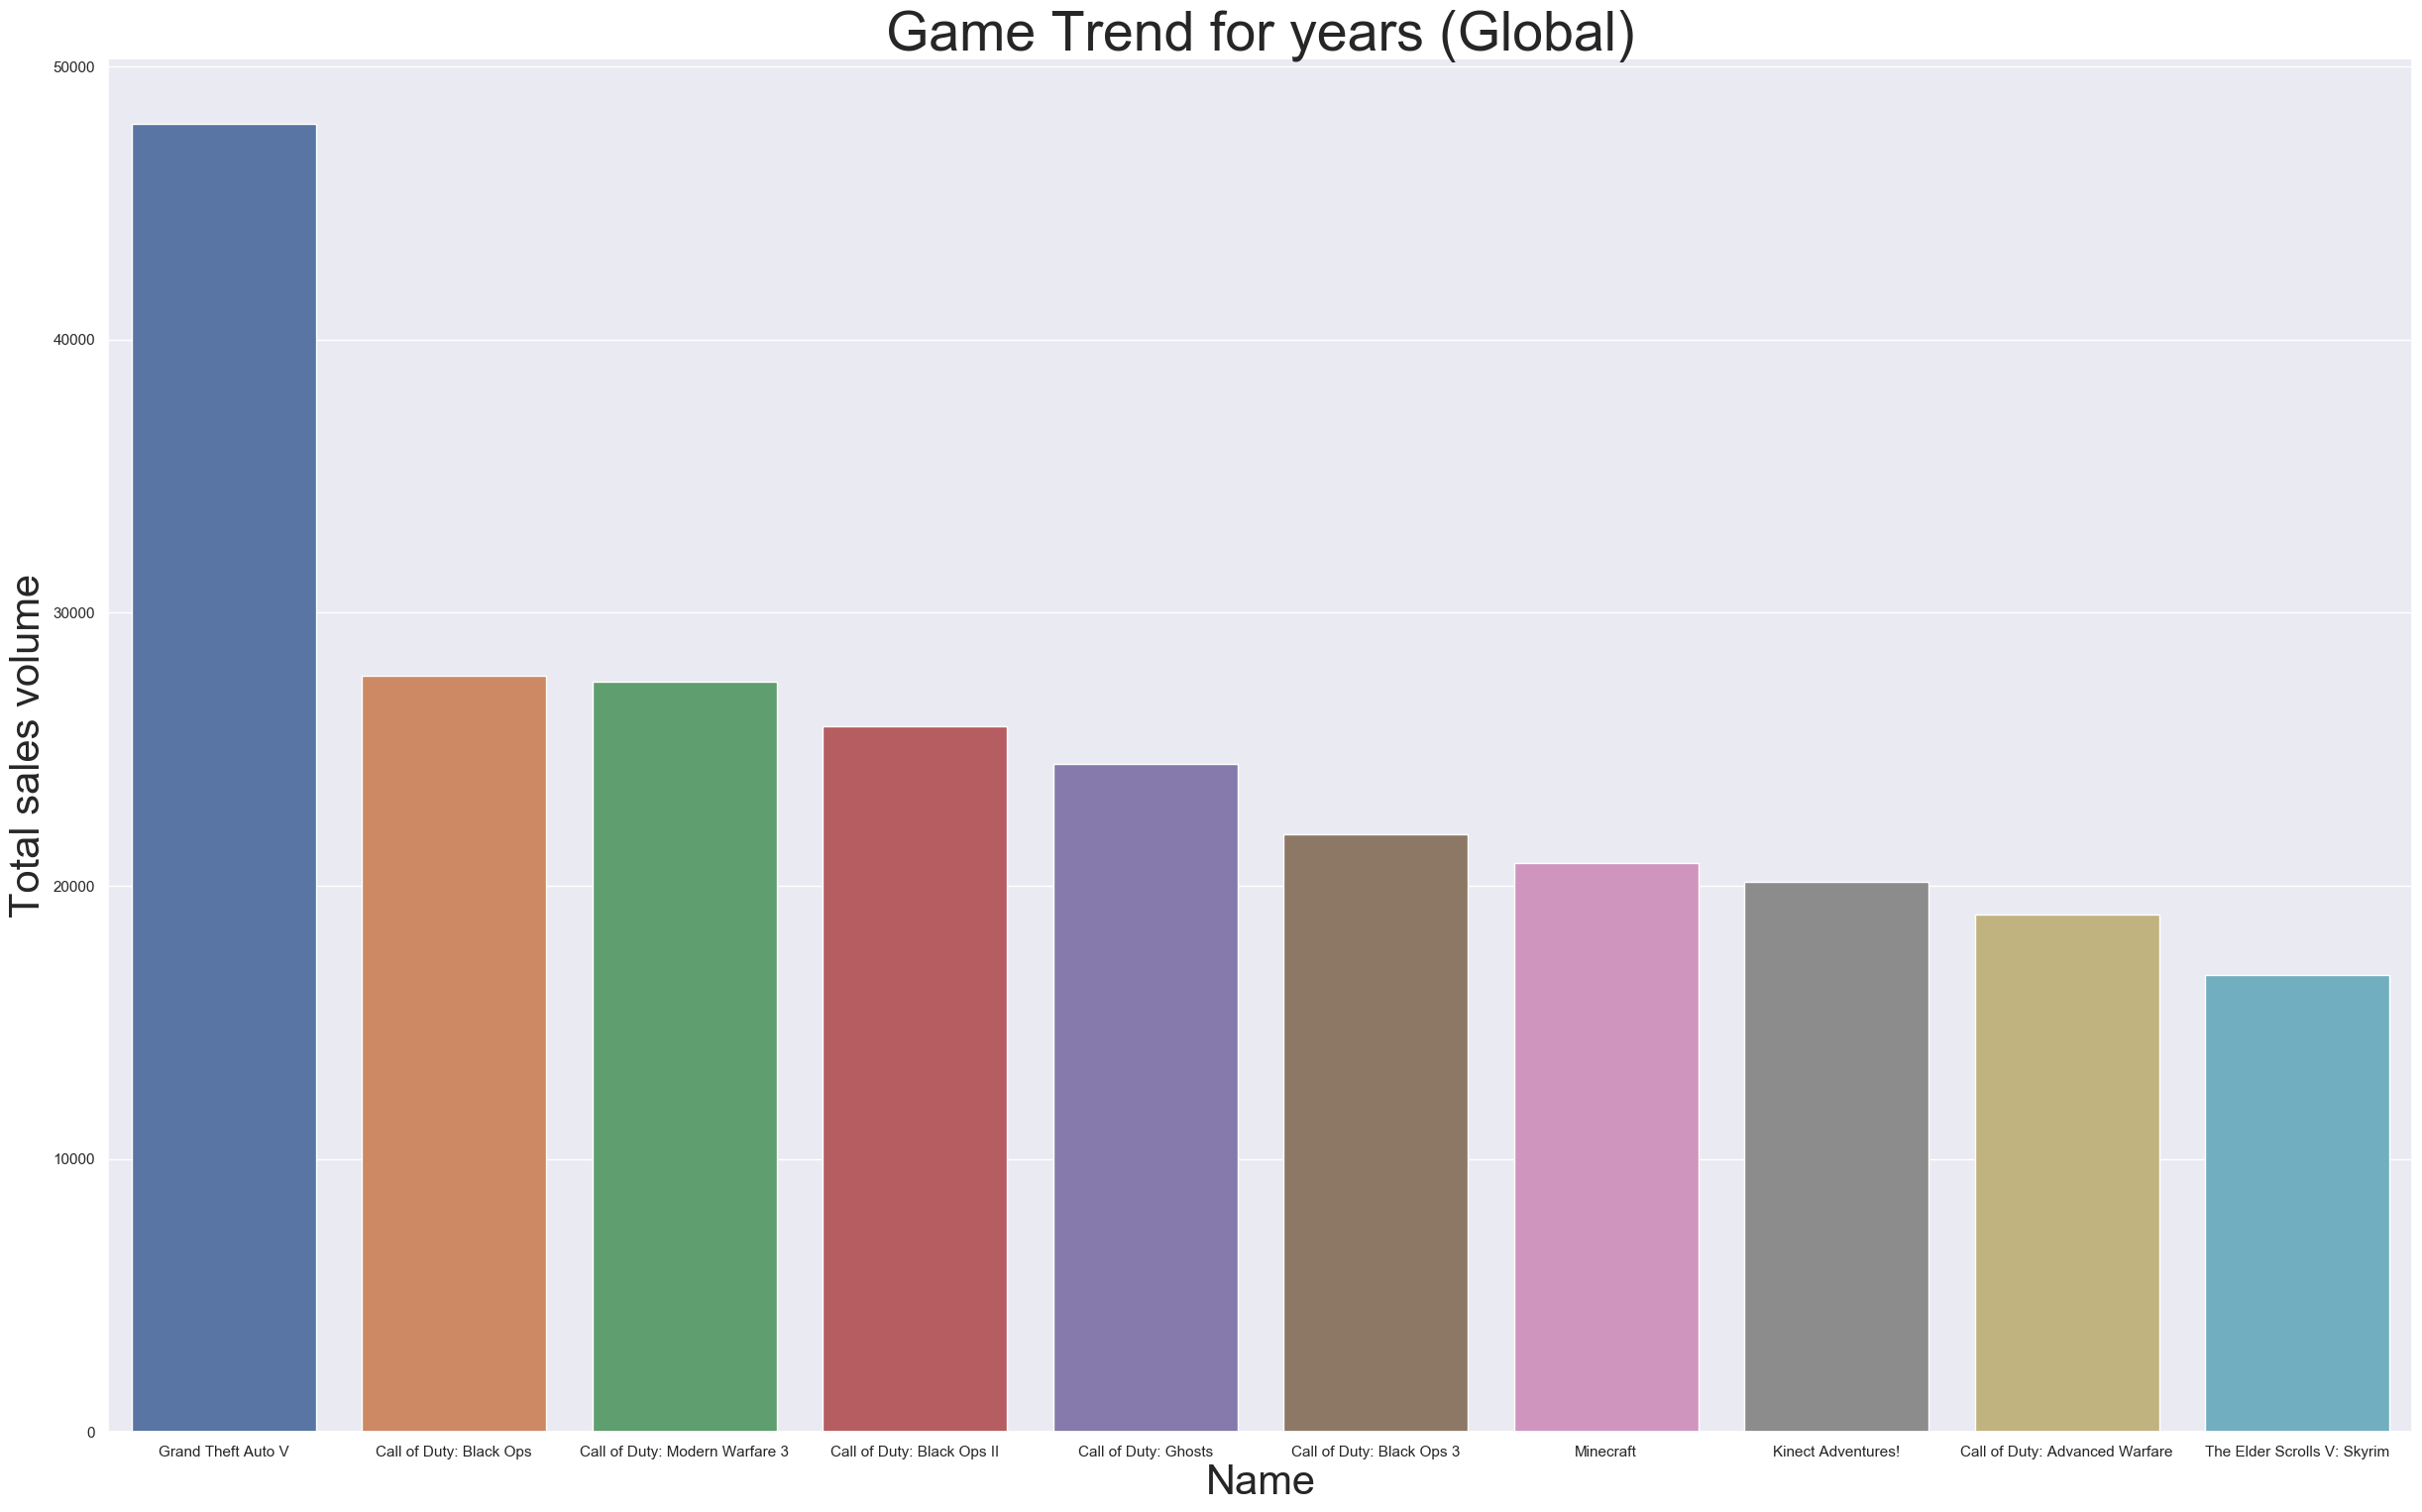

In [236]:
# 글로벌 인기게임
pop_games_gb = pop_games.loc[pop_games.Year >= 2010][:10]

plt.figure(figsize=(30, 18))
sns.barplot(x='Name', y = 'Global_Sales', data = pop_games_gb, dodge=False)

plt.title("Game Trend for years (Global)", fontsize=40)
plt.xlabel("Name", fontsize=30)
plt.ylabel("Total sales volume", fontsize=30)
plt.show()

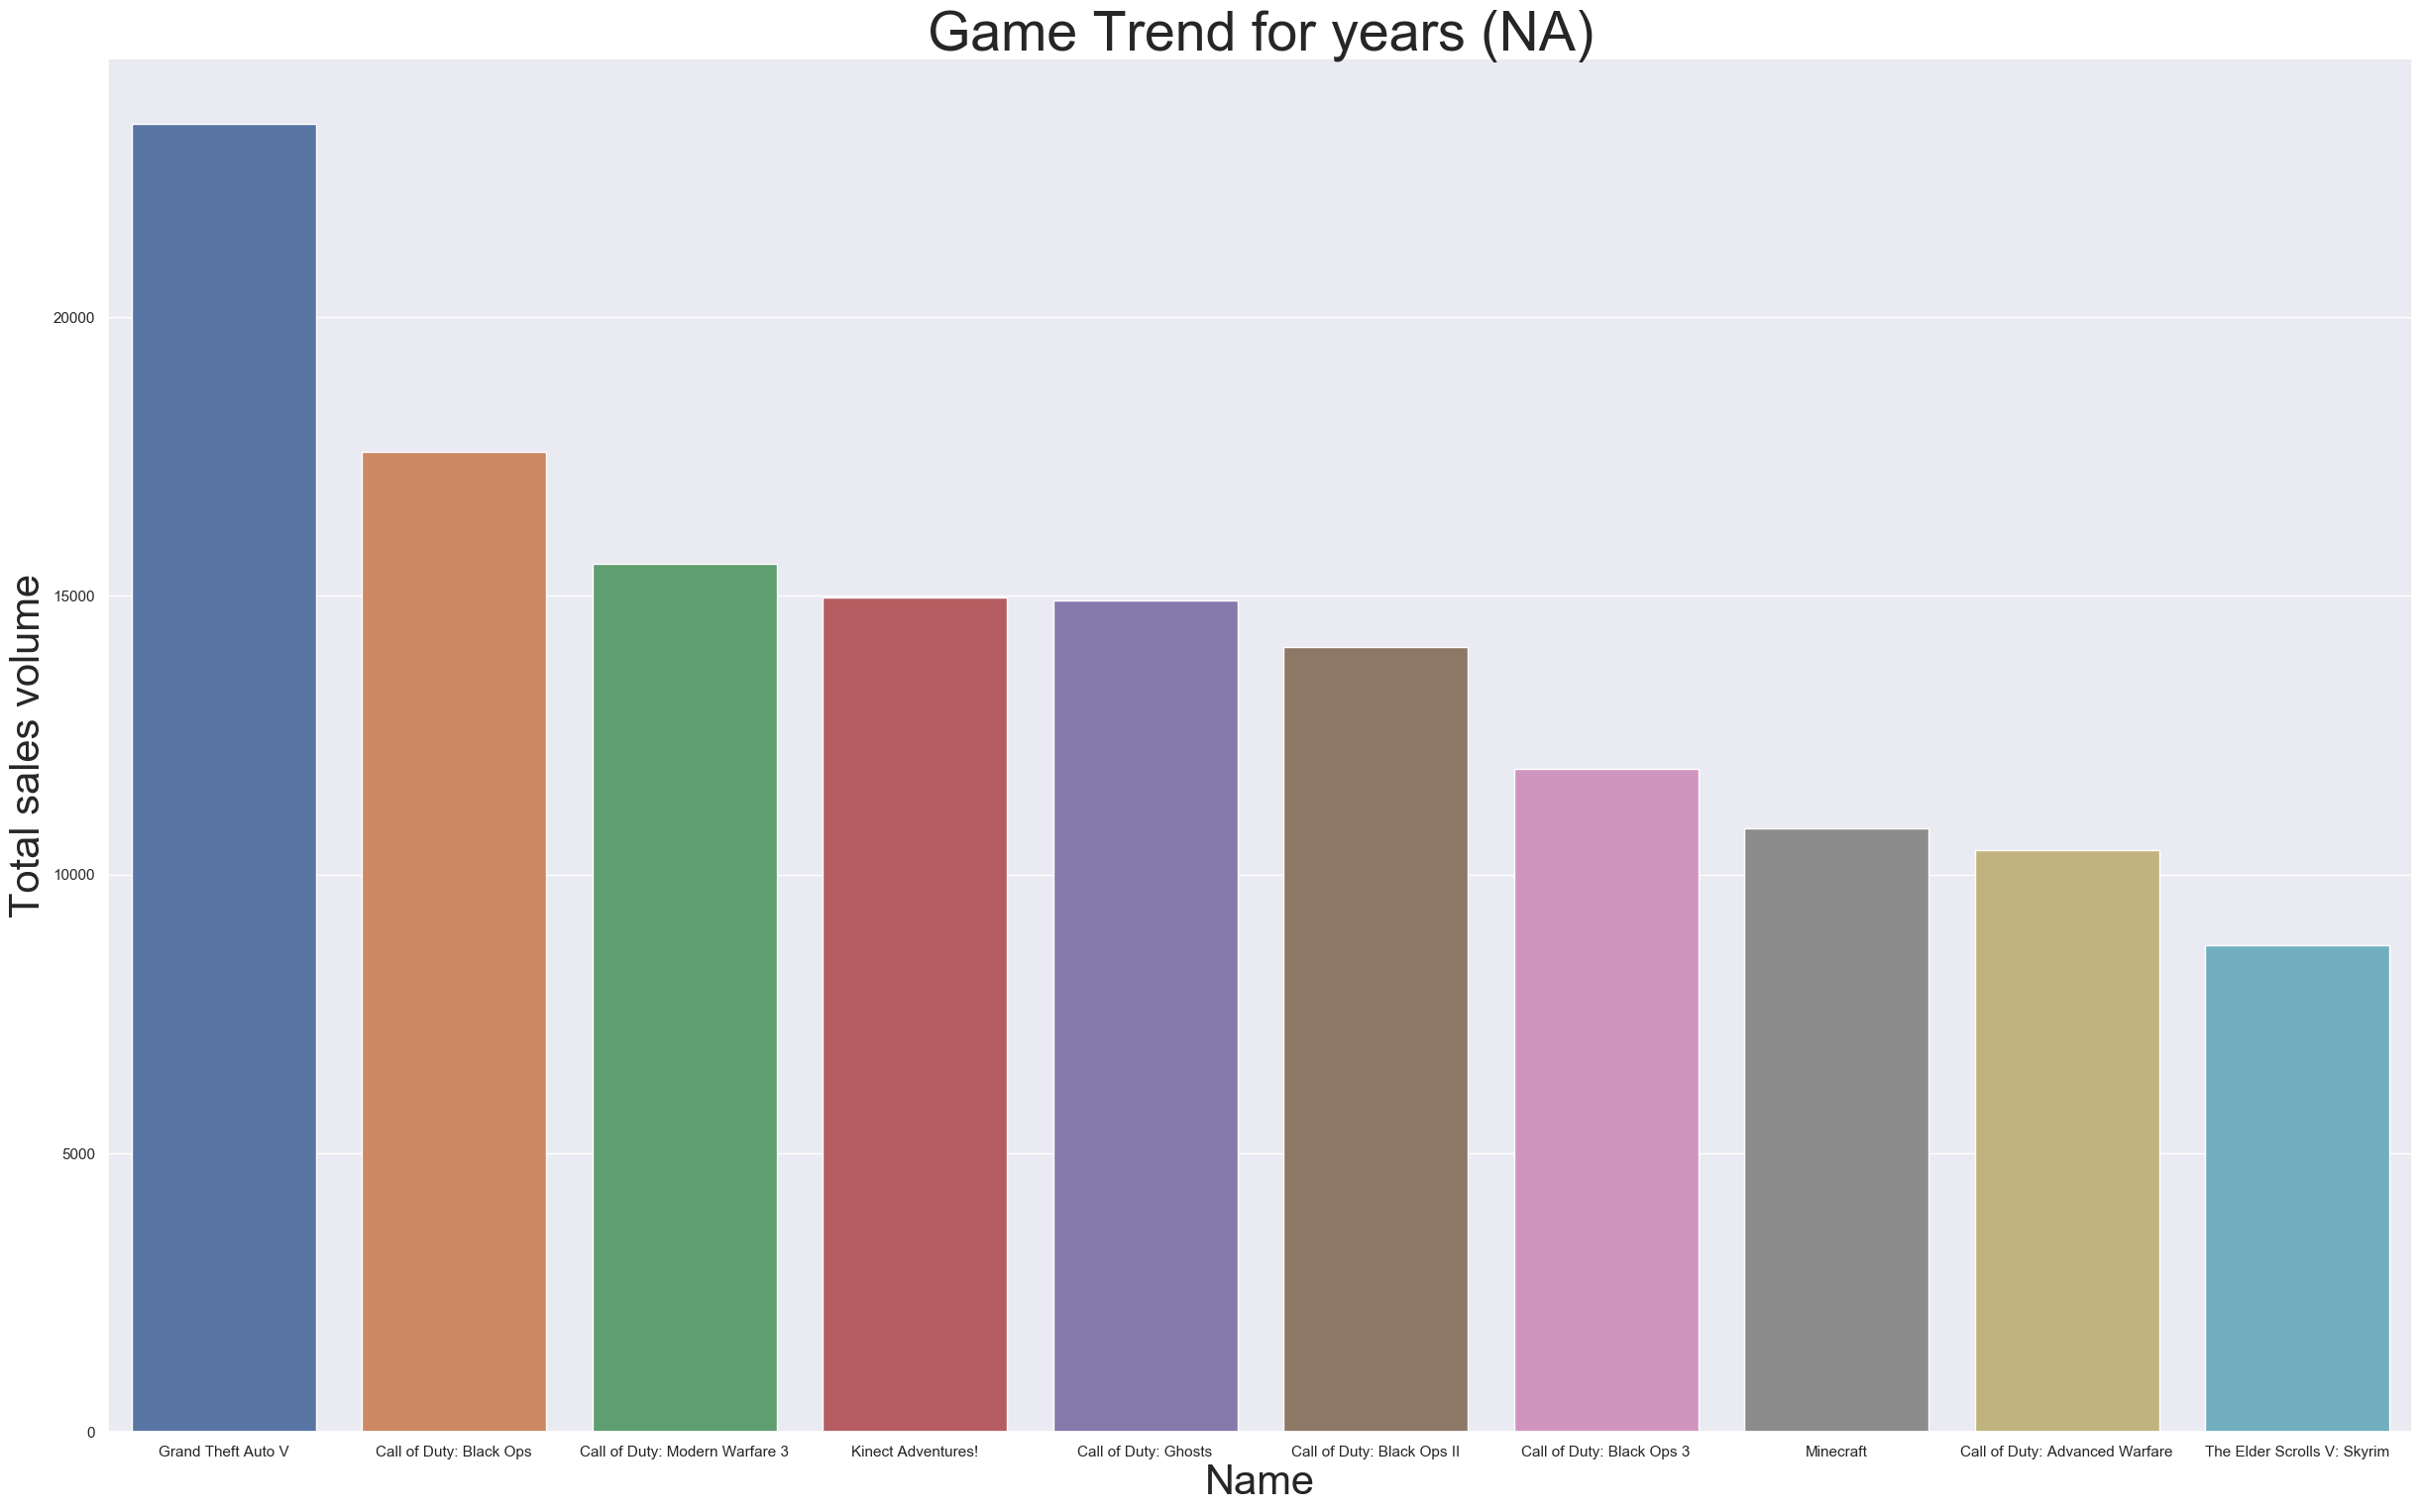

In [240]:
# 미국의 인기게임
pop_games_NA = pop_games[['Name', 'Genre', 'NA_Sales']].loc[pop_games.Year >= 2010].sort_values('NA_Sales', ascending = False)[:10]

plt.figure(figsize=(30, 18))
sns.barplot(x='Name', y = 'NA_Sales', data = pop_games_NA, dodge=False)

plt.title("Game Trend for years (NA)", fontsize=40)
plt.xlabel("Name", fontsize=30)
plt.ylabel("Total sales volume", fontsize=30)
plt.show()

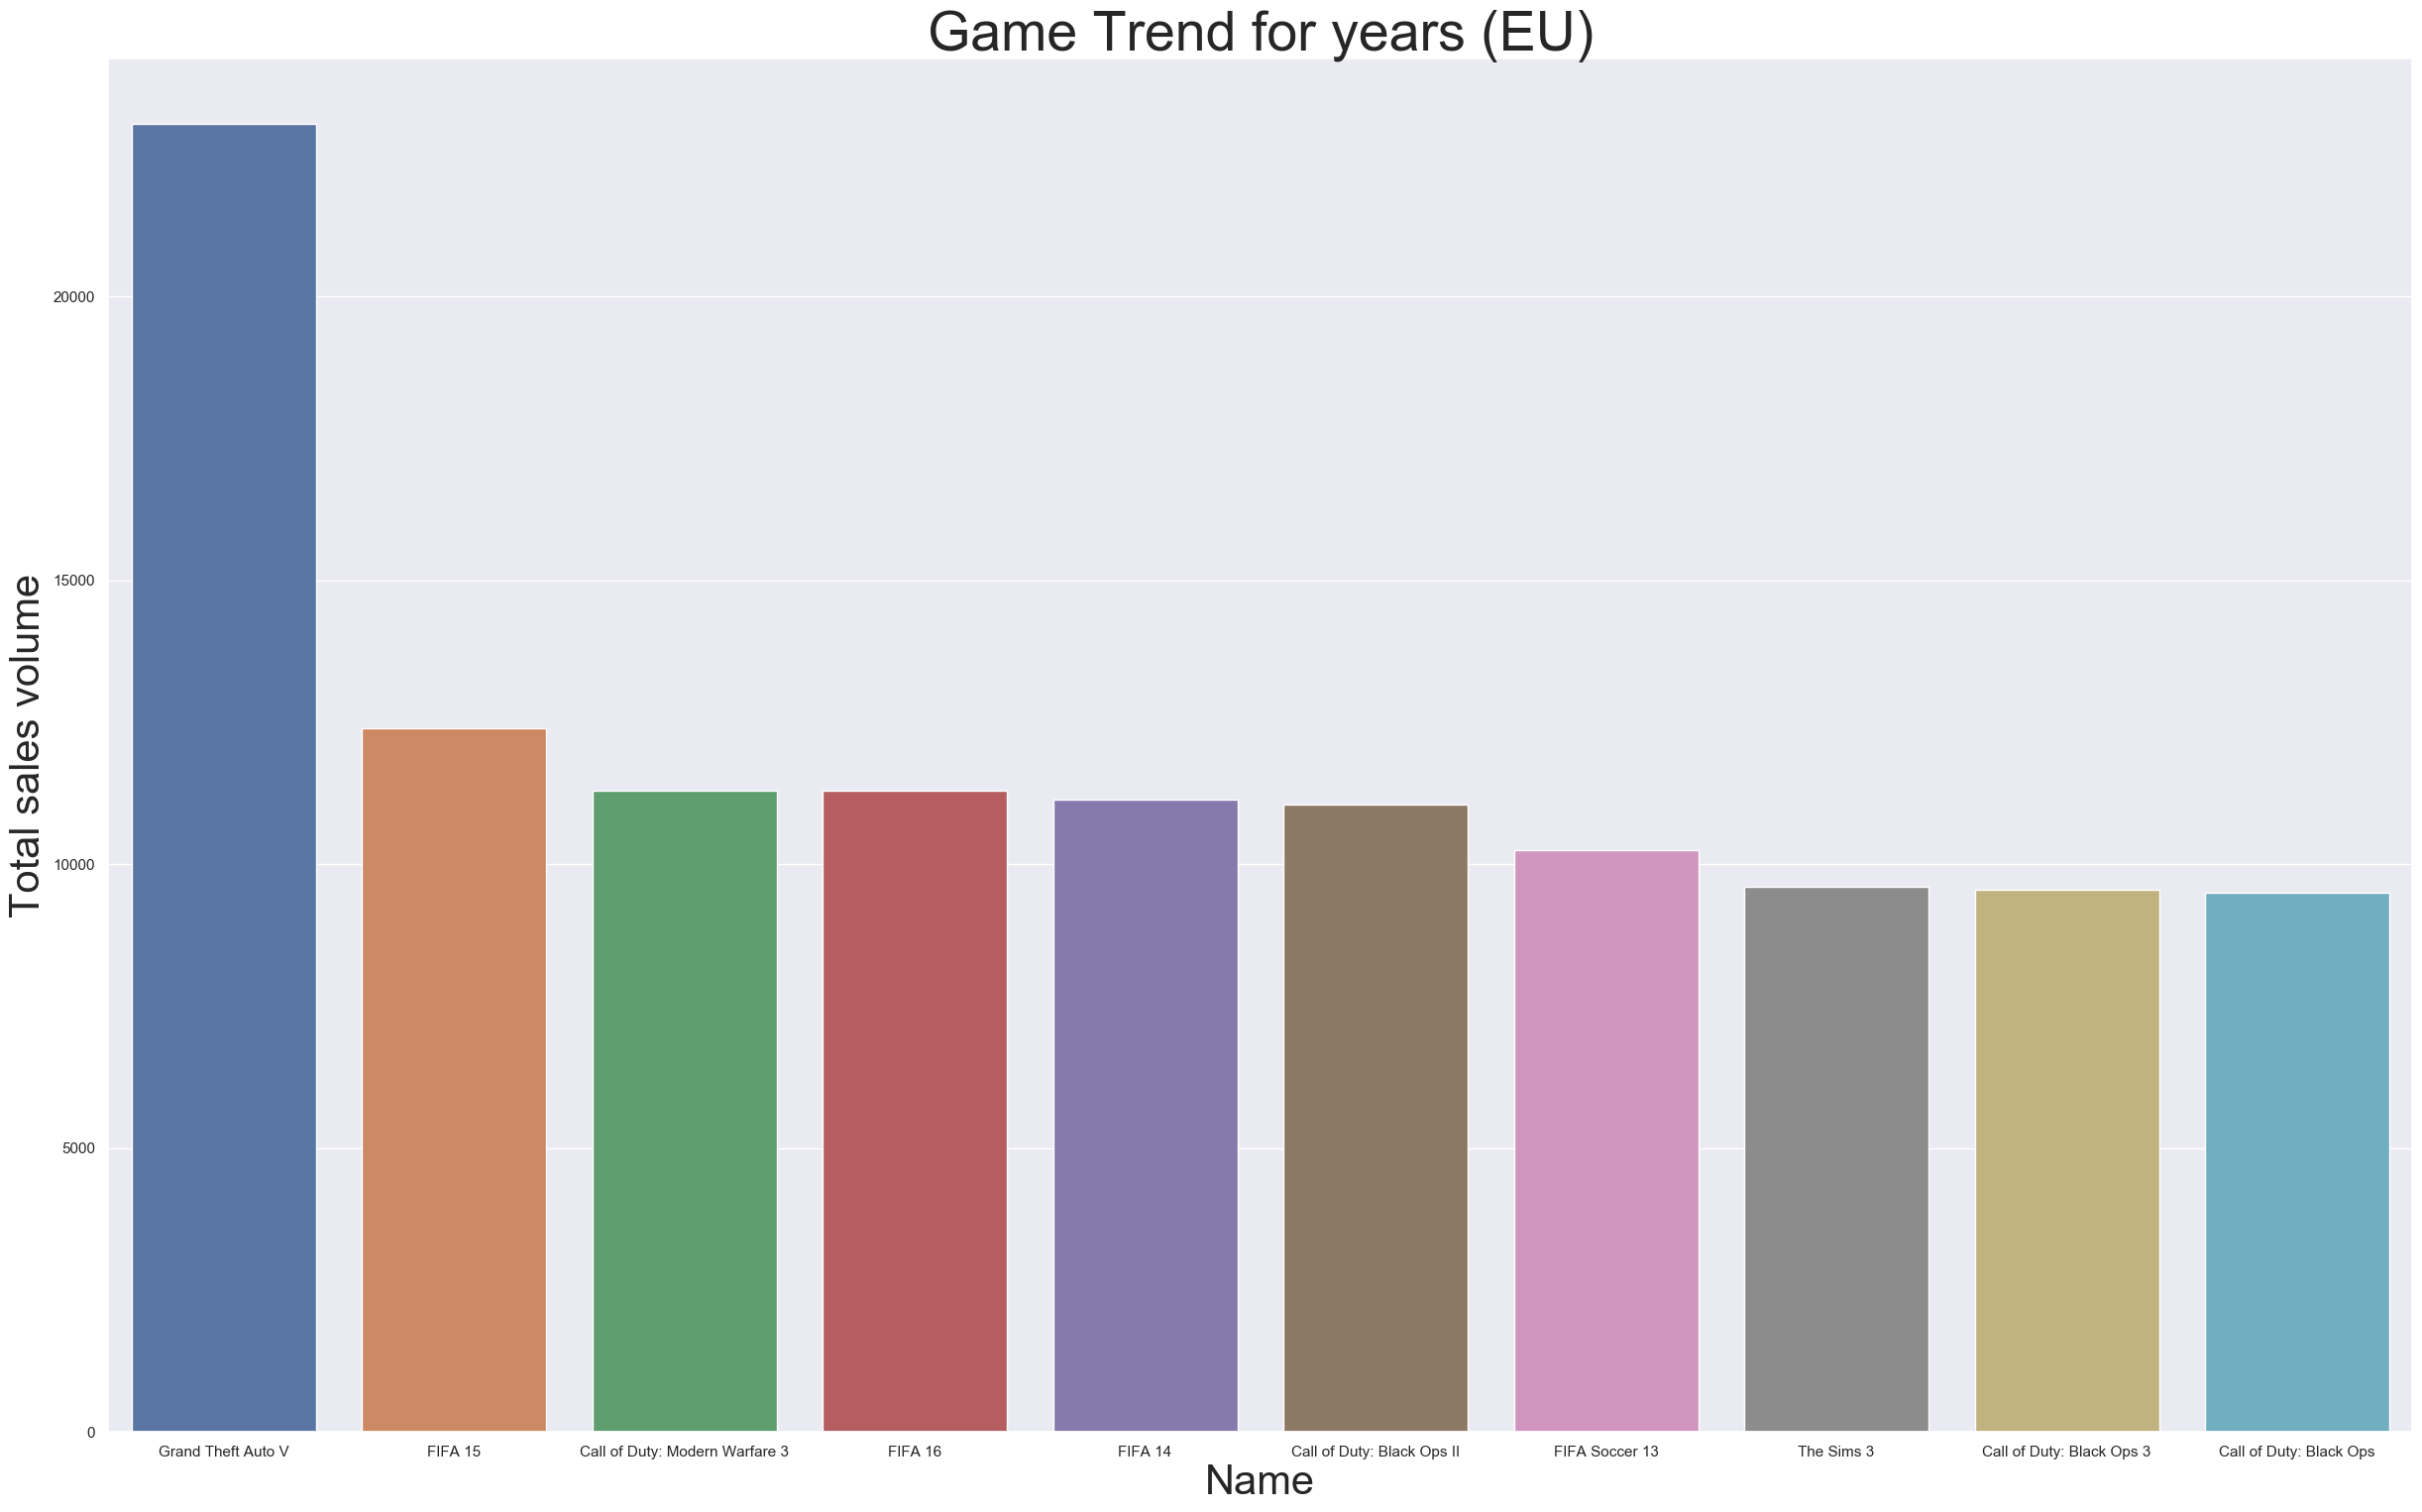

In [241]:
# 유럽의 인기게임
pop_games_EU = pop_games[['Name', 'Genre', 'EU_Sales']].loc[pop_games.Year >= 2010].sort_values('EU_Sales', ascending = False)[:10]

plt.figure(figsize=(30, 18))
sns.barplot(x='Name', y = 'EU_Sales', data = pop_games_EU, dodge=False)

plt.title("Game Trend for years (EU)", fontsize=40)
plt.xlabel("Name", fontsize=30)
plt.ylabel("Total sales volume", fontsize=30)
plt.show()

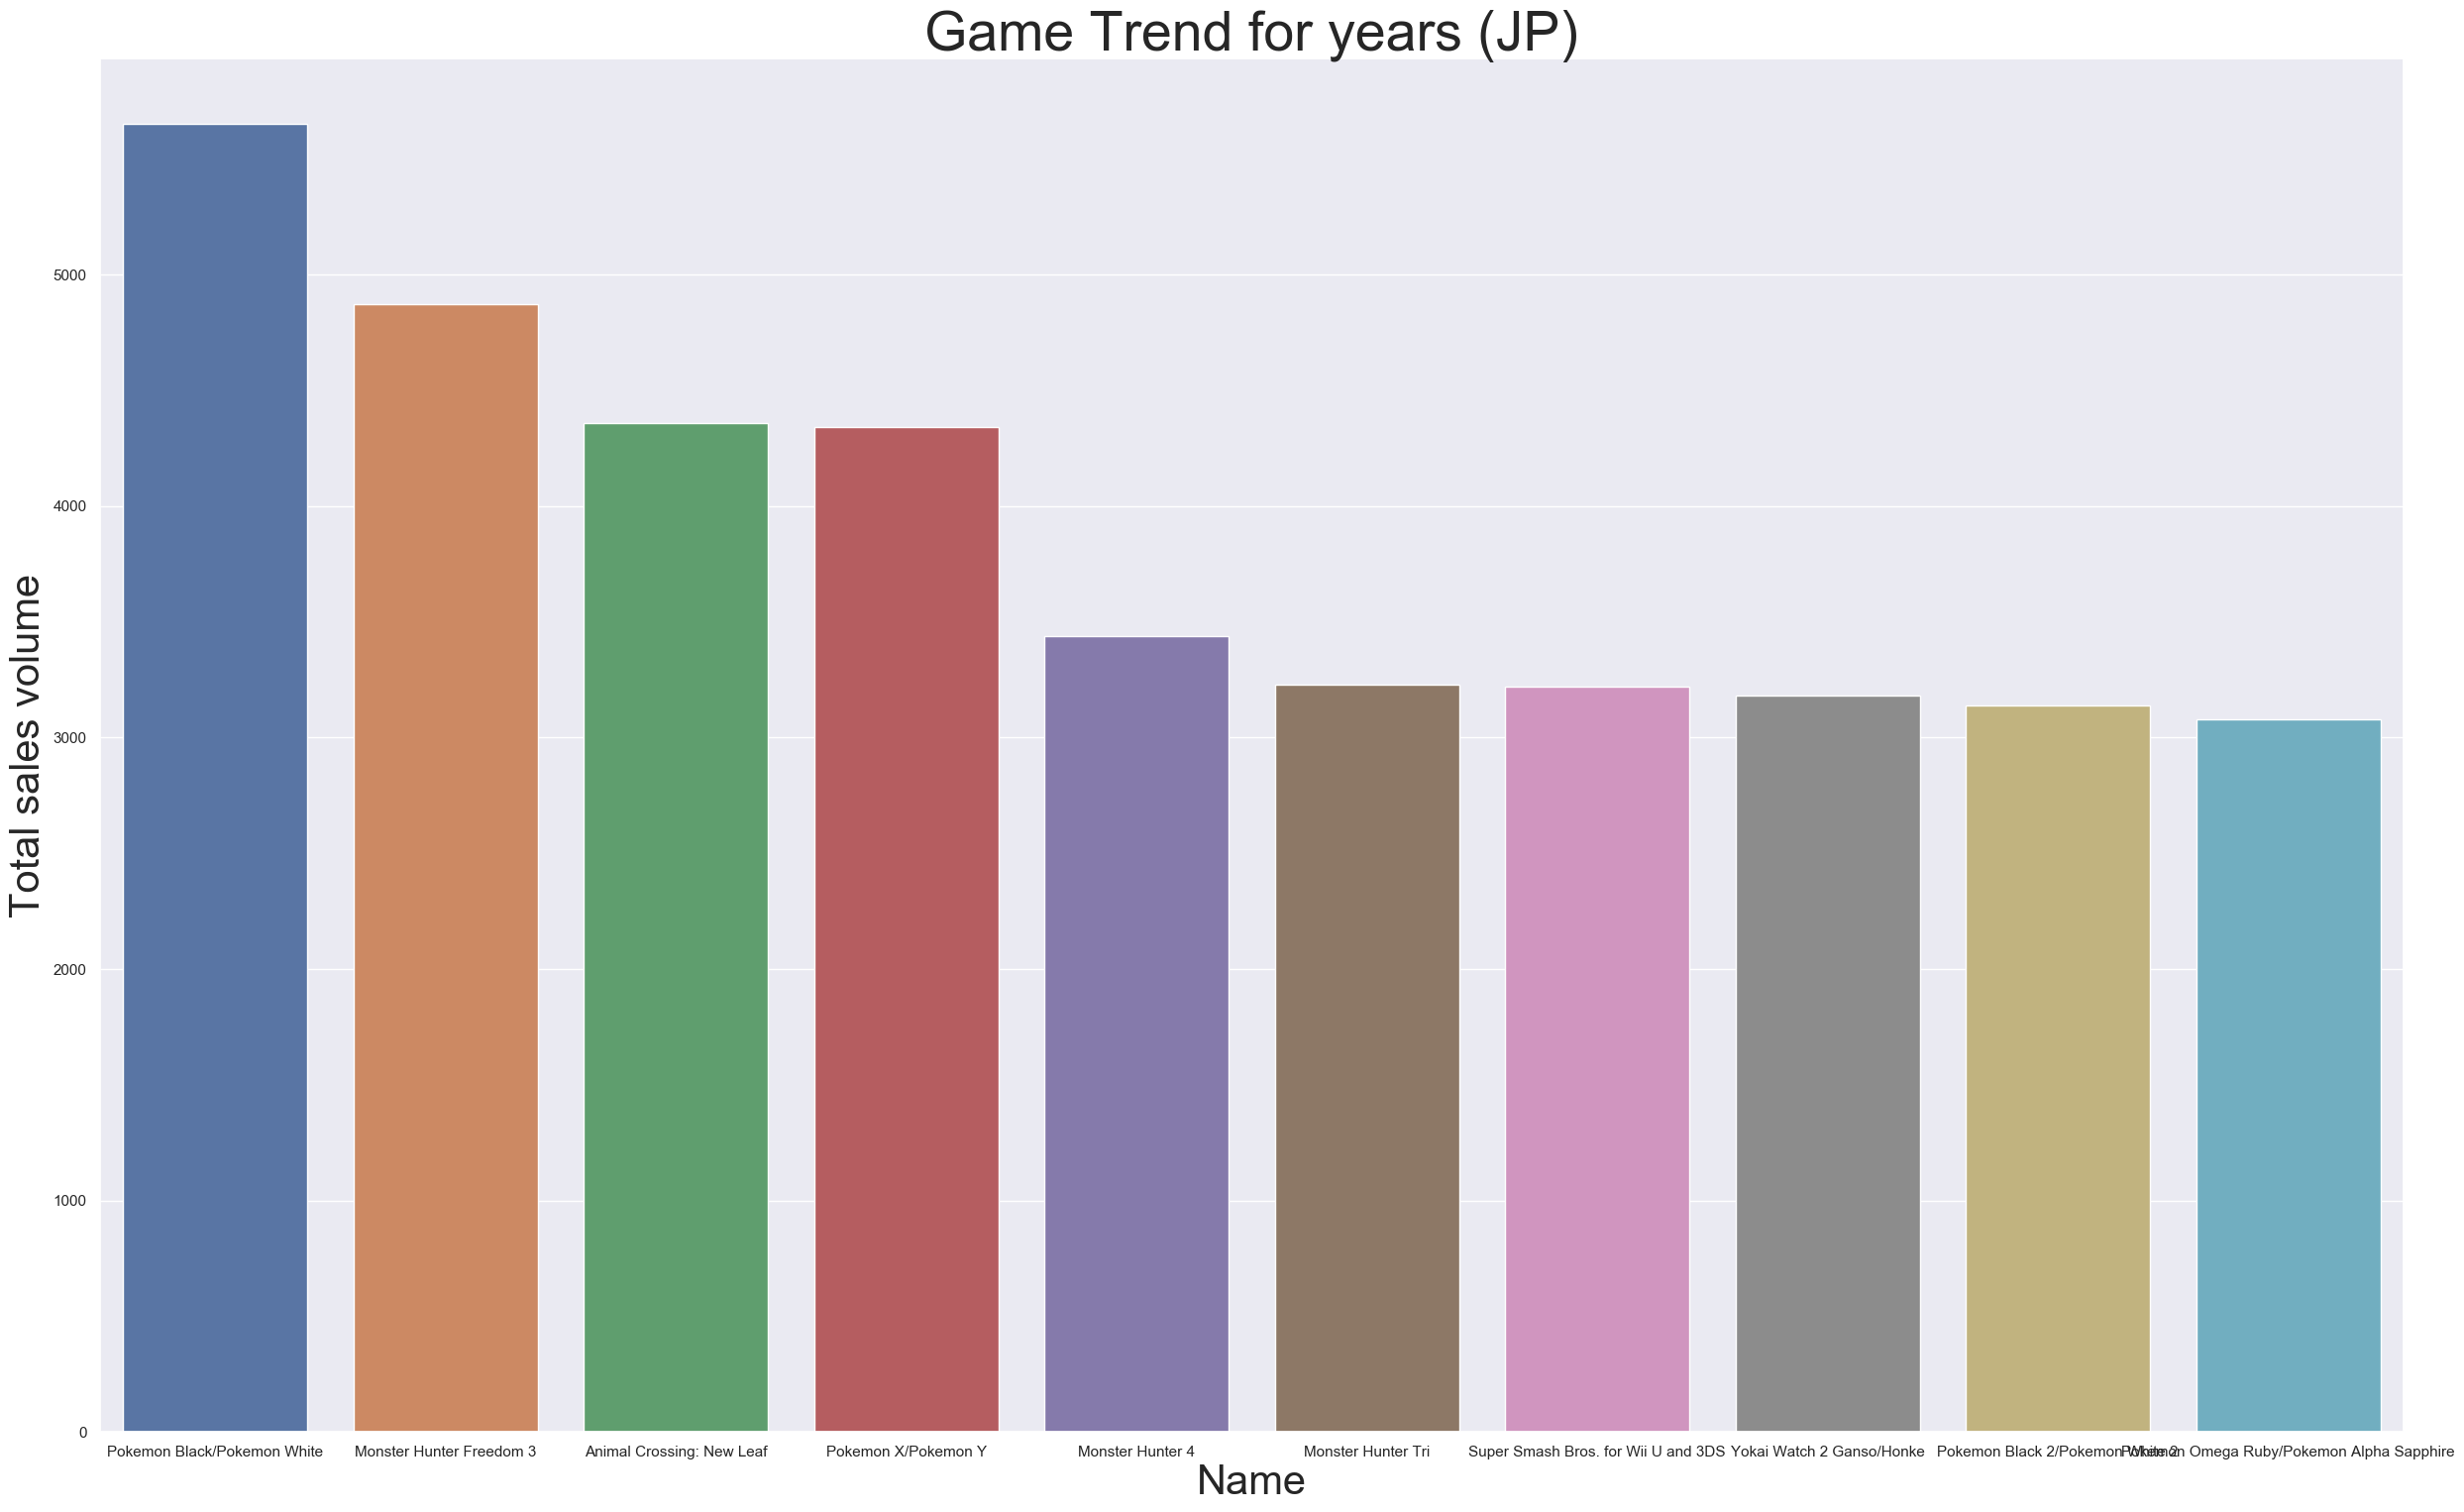

In [243]:
# 일본의 인기게임
pop_games_JP = pop_games[['Name', 'Genre', 'JP_Sales']].loc[pop_games.Year >= 2010].sort_values('JP_Sales', ascending = False)[:10]

plt.figure(figsize=(30, 18))
sns.barplot(x='Name', y = 'JP_Sales', data = pop_games_JP, dodge=False)

plt.title("Game Trend for years (JP)", fontsize=40)
plt.xlabel("Name", fontsize=30)
plt.ylabel("Total sales volume", fontsize=30)
plt.show()

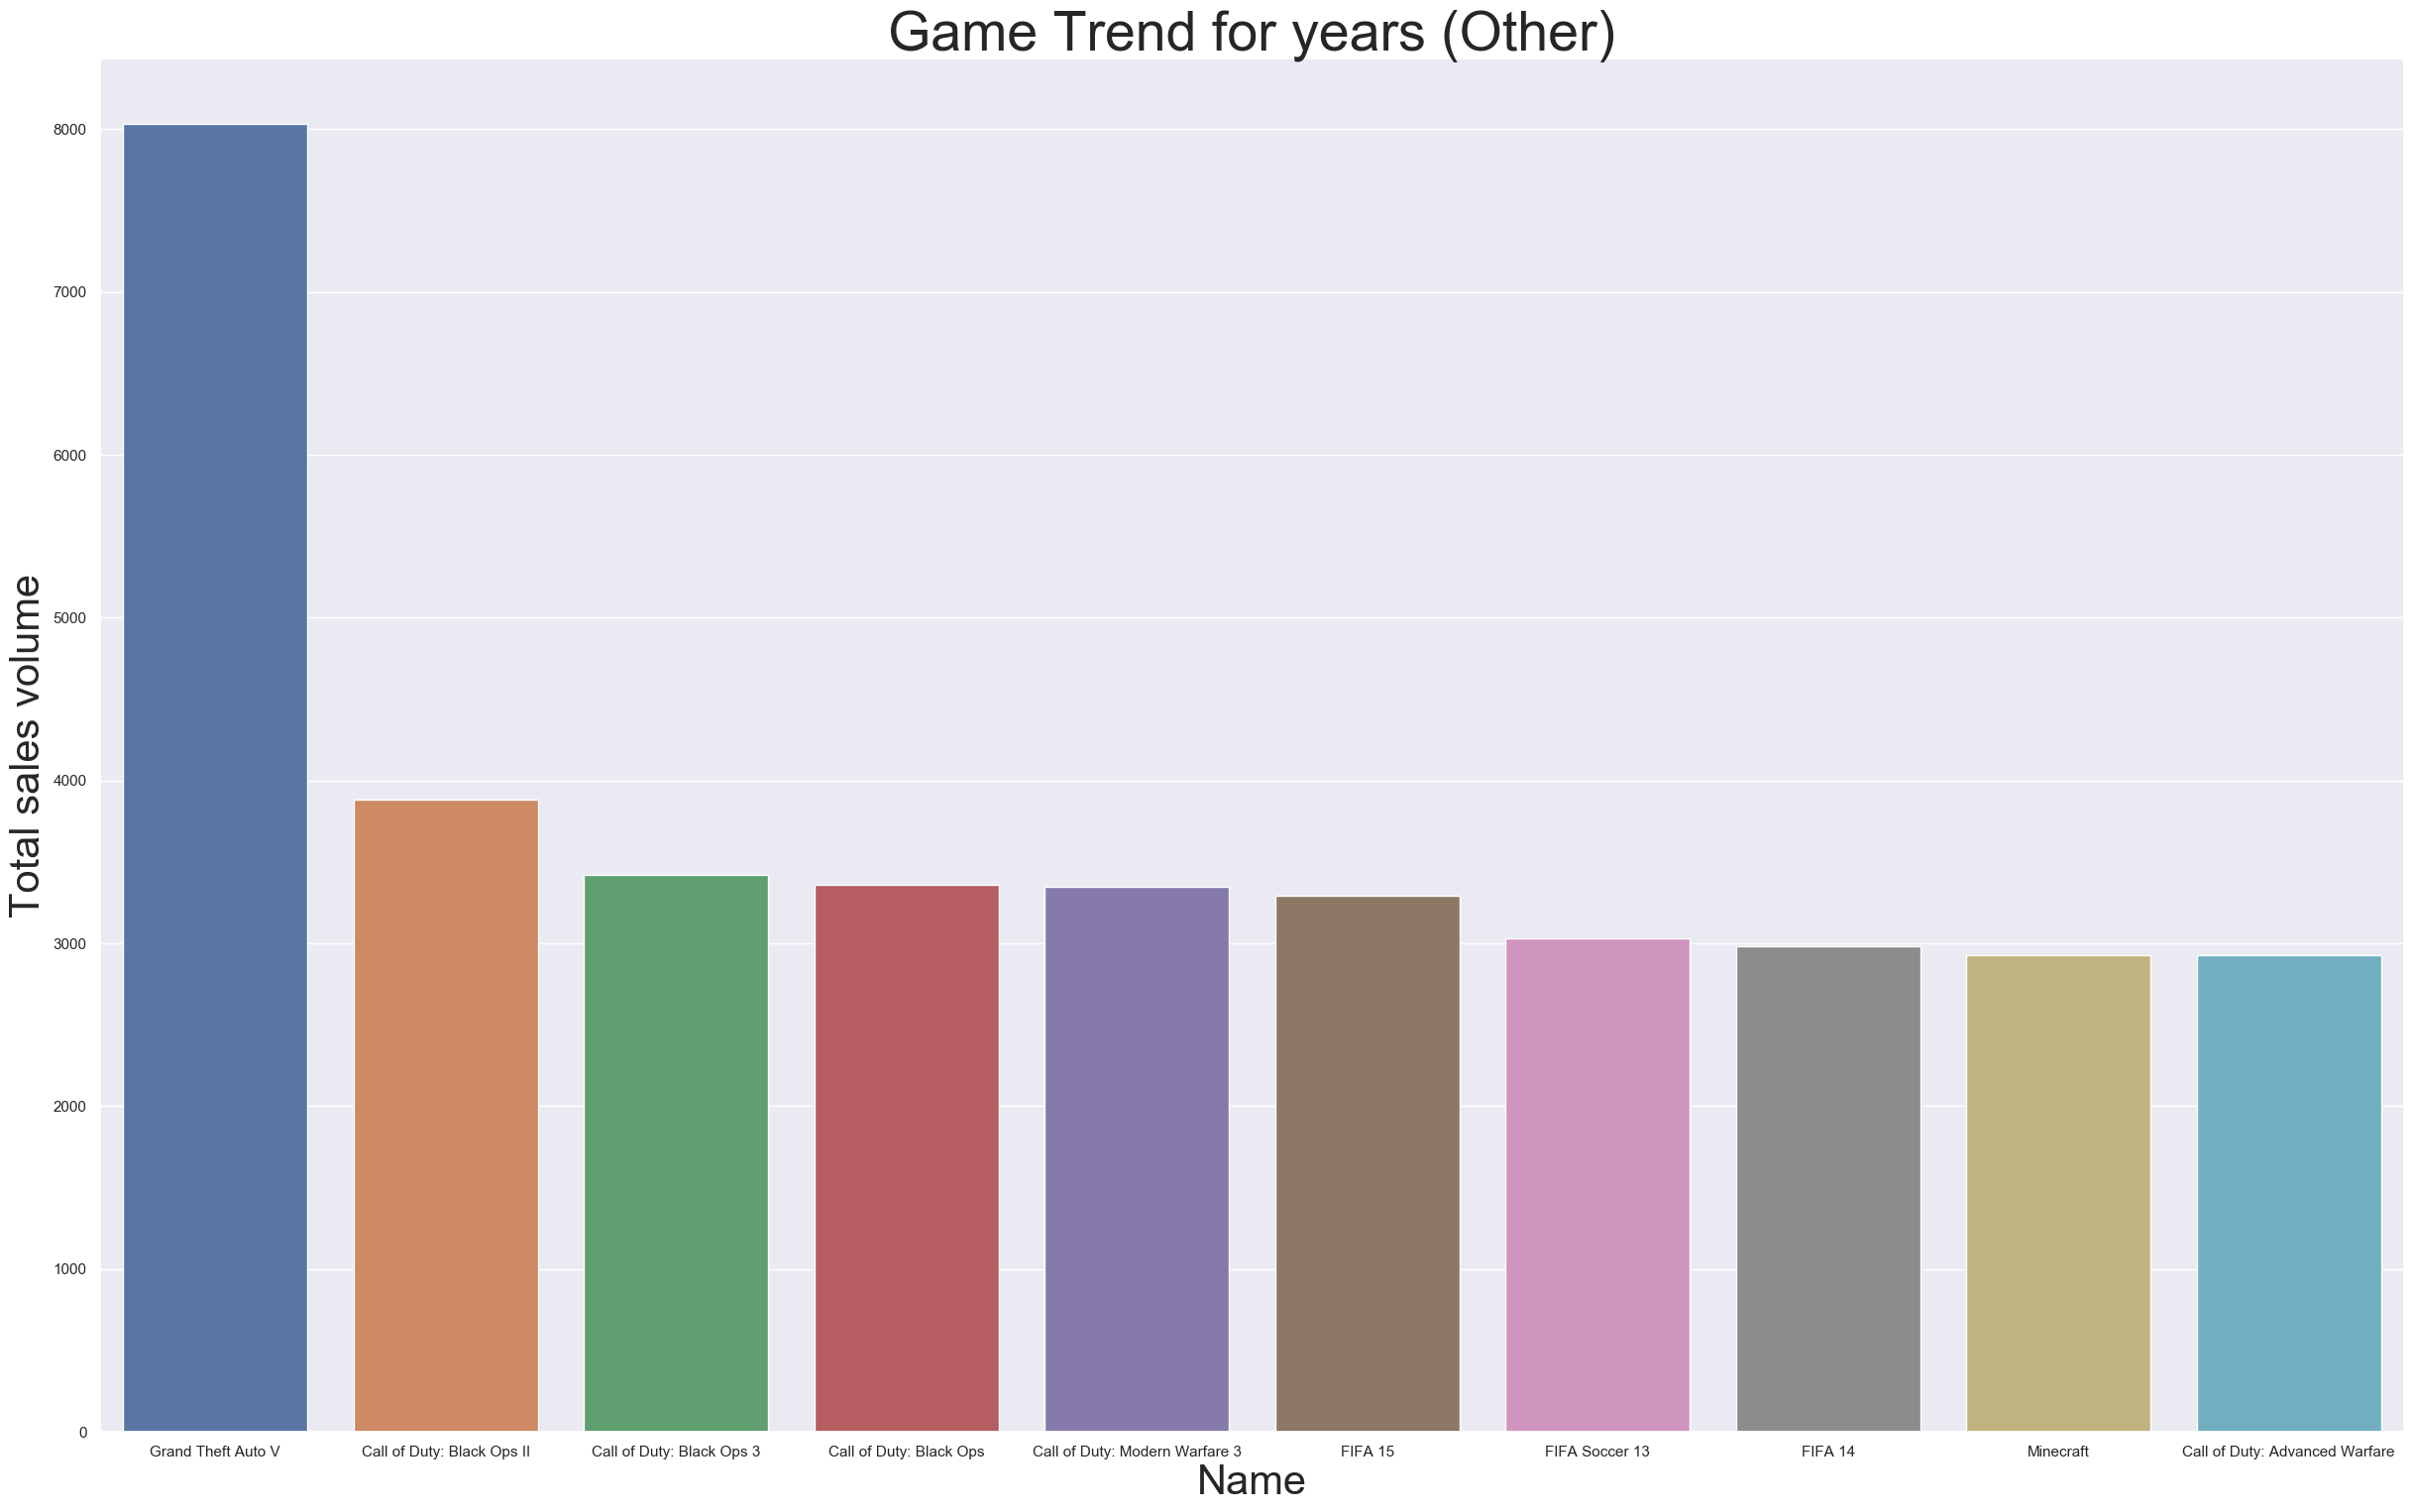

In [245]:
# 기타지역의 인기게임
pop_games_Other = pop_games[['Name', 'Genre', 'Other_Sales']].loc[pop_games.Year >= 2010].sort_values('Other_Sales', ascending = False)[:10]

plt.figure(figsize=(30, 18))
sns.barplot(x='Name', y = 'Other_Sales', data = pop_games_Other, dodge=False)

plt.title("Game Trend for years (Other)", fontsize=40)
plt.xlabel("Name", fontsize=30)
plt.ylabel("Total sales volume", fontsize=30)
plt.show()

### 지역별 플랫폼 점유율 비교
-[이전](#인기게임분석) - [다음](#결론) 

- (플스 시리즈 VS 엑박 시리즈, PC 점유율) 
- 지역별 플랫폼 점유율 추이부터 시각화(파이차트): 서구쪽은 xb 시리즈가 인기고 아시아나 일본은 ps시리즈가 인기있다는걸 보여야함

- 미국: H0: xb 시리즈 없는거 >= xb시리즈, H1: xb 시리즈 없는거 < xb시리즈
- 유럽: H0: xb 시리즈 없는거 >= xb시리즈, H1: xb 시리즈 없는거 < xb시리즈 -> 즉, 서구권은 최소 xb플랫폼을 지원하는 게임을 내는것이 나음
- 일본: H0: PS 시리즈 없는거 >= PS시리즈, H1: PS 시리즈 없는거 < PS시리즈

In [247]:
df_platf = df.loc[df.Year > 2010].groupby('Platform').agg({'NA_Sales' : 'sum',
                           'EU_Sales' : 'sum',
                           'JP_Sales' : 'sum',
                           'Other_Sales' : 'sum'})

df_platf = df_platf.reset_index()

df_platf = df_platf.loc[df_platf.Platform.str.contains('PS') | df_platf.Platform.str.contains('^X')| df_platf.Platform.str.contains('PC')]

df_platf = df_platf.set_index('Platform')

df_platf.loc['Total Sum'] = df_platf.sum()


for i in range(len(df_platf.columns)):
    df_platf.iloc[:, i] = df_platf.iloc[:, i]/df_platf.iloc[-1,i]

df_platf = df_platf.drop('Total Sum', axis = 0)
df_platf = df_platf.reset_index()
df_platf

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,PC,0.047096,0.101571,0.000000,0.070121
1,PS2,0.000208,0.000240,0.000800,0.000553
2,PS3,0.269742,0.320904,0.437994,0.387266
3,PS4,0.155118,0.228360,0.127122,0.239785
4,PSP,0.003654,0.003711,0.214864,0.006249
5,PSV,0.025960,0.030146,0.186328,0.046729
6,X360,0.364913,0.230797,0.029869,0.183378
7,XOne,0.133309,0.084272,0.003022,0.065919


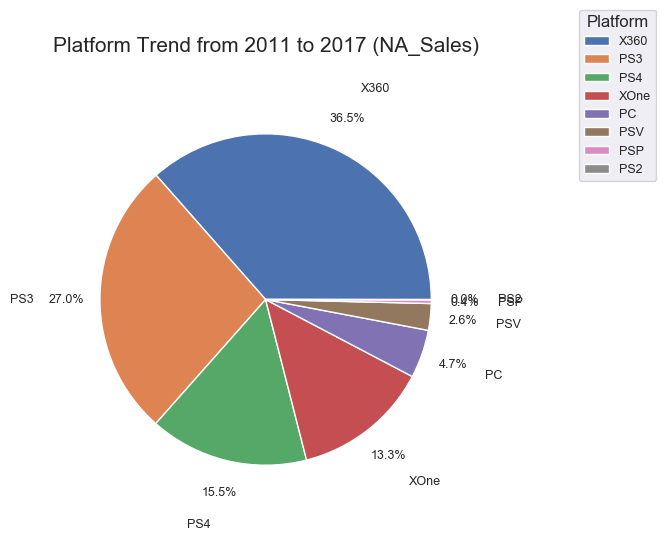

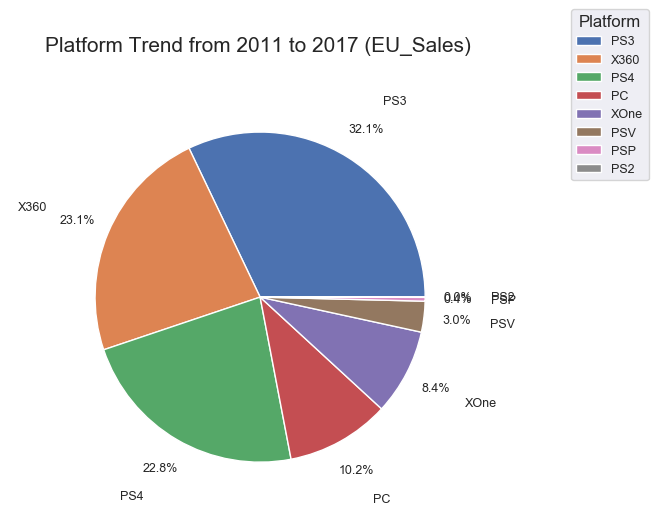

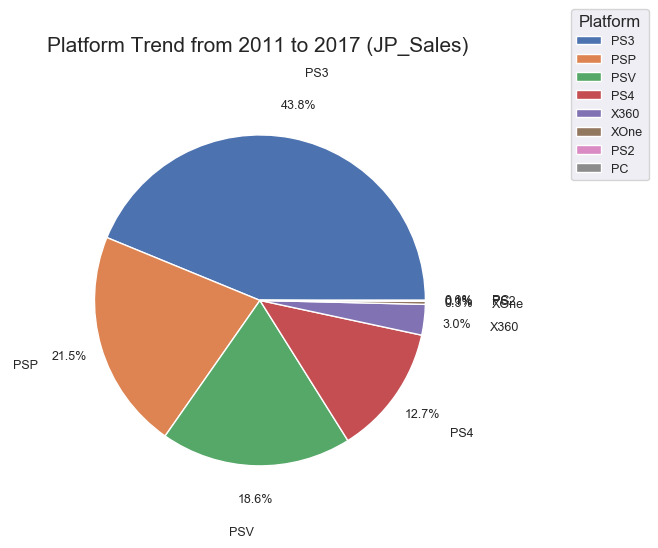

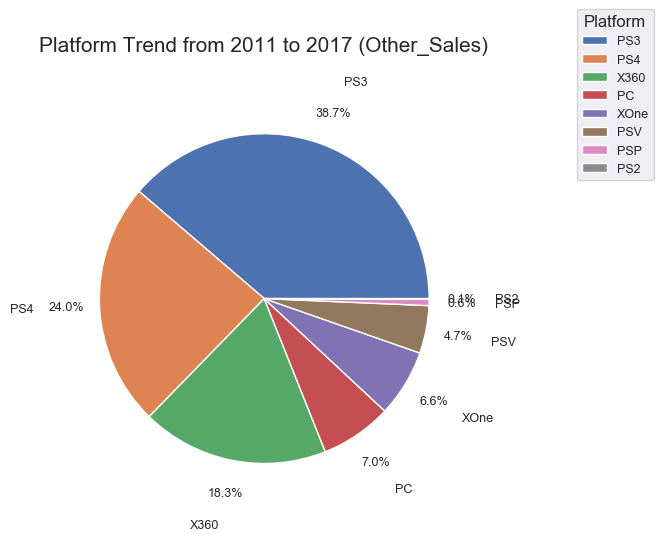

In [248]:
for i in df_platf.columns[1:]:
    size = df_platf[f'{i}']
    label = df_platf.Platform
    size, label = zip(*sorted(zip(size, label), reverse=True))
    fig, ax = plt.subplots()
    ax.pie(size, labels=label, autopct='%1.1f%%',
          labeldistance = 1.4,
          pctdistance = 1.2,
          textprops = {'fontsize' : 9})
    ax.axis('equal')
    plt.title(f"Platform Trend from 2011 to 2017 ({i})", fontsize=15, pad = 45)
    pie_legend = ax.legend(title='Platform', loc='upper right', prop={'size': 9}, bbox_to_anchor=(1.3, 1.3))
    plt.show()

In [249]:
# 부츠스트래핑으로 표본추출 - 표본평균의 정규성이 많아지면 모집단도 정규성 따름. 신뢰구간 검정시 표본평균들의 집합 필요.

def boots(df,n):
    np.random.seed(42)
    sample = []
    for _ in range(100): # 샤피로 정규검정을 쓰려면 표본이 2000개 이하이여야 함
        a = np.random.choice(df, n, replace=True) # n은 표본평균 뽑을려는 샘플 개수
        sample.append(a.mean())
        
    return sample


In [250]:
# 2010이후의 게임들만 추출
df_recent = df.loc[(df.Year > 2010)]
df_recent.NA_Sales.loc[df.Platform.str.contains('^PS')].sum()

283740

In [311]:
# 2010년 이후의 
df_recent = df.loc[(df.Year > 2010)].groupby(['Name', 'Platform']).agg({'NA_Sales': 'sum',
                                         'EU_Sales': 'sum', 
                                         'JP_Sales': 'sum',
                                         'Other_Sales': 'sum',
                                         'Global_Sales': 'sum'})
df_recent = df_recent.reset_index(level = 'Platform')

df_recent = df_recent.reset_index()

In [324]:
df_recent

,Name,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,.hack: Sekai no Mukou ni + Versus,PS3,0,0,30,0,30
1,1/2 Summer +,PSP,0,0,10,0,10
2,100 Classic Games,DS,0,30,0,0,30
3,1001 Touch Games,DS,120,170,0,40,290
4,12-Sai. Honto no Kimochi,3DS,0,0,70,0,70
...,...,...,...,...,...,...,...
3937,inFAMOUS 2,PS3,1050,490,80,230,1620
3938,inFAMOUS: Second Son,PS4,1270,970,70,470,2310
3939,thinkSMART: Chess for Kids,DS,10,0,0,0,10
3940,uDraw Studio: Instant Artist,Wii,80,90,0,20,170


In [303]:
# 실험집단(미국에서 xbox 보유)
df_recent_xb = pd.DataFrame(df_recent.NA_Sales.loc[df_recent.Platform.str.contains('^X')])
exp = df_recent_xb.NA_Sales.loc[df_recent_xb.NA_Sales != 0]
np.mean(exp)

487.3197492163009

In [304]:
df_recent_xb

,NA_Sales
Name,
2 in 1 Combo Pack: Sonic Heroes / Super Monkey Ball Deluxe,90
2014 FIFA World Cup Brazil,140
7 Days to Die,20
AKB1/48: Idol to Guam de Koishitara...,0
Ace Combat: Assault Horizon,300
...,...
Zumba Fitness Rush,0
Zumba Fitness: World Party,170
[Prototype 2],480


In [275]:
# 통제집단(미국에서 xbox 미보유)
df_recent_not_xb = pd.DataFrame(df_recent.NA_Sales.loc[~df_recent.Platform.str.contains('^X')])
cont = df_recent_not_xb.NA_Sales.loc[df_recent_not_xb.NA_Sales != 0]
np.mean(cont)

292.9854735618826

In [ ]:
df_recent.drop

In [257]:
# 표본평균!
np.mean(boots(cont,800)), np.mean(boots(exp,800))

(293.0968125, 491.6387500000001)

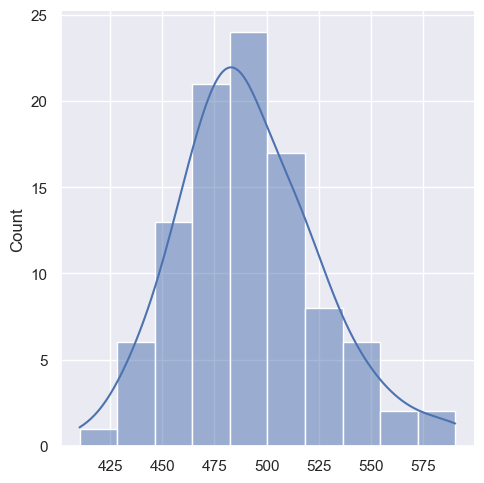

In [258]:
sns.displot(boots(exp,800), kde = True)

In [259]:
# 데이터가 정규성, 등분산성, 독립성을 만족하는 지 확인

In [260]:
# 1. 정규성 검정.

In [261]:
from scipy.stats import shapiro
from scipy import stats

stat, p = shapiro(boots(cont,800))
if p > 0.05:
    print(f'정규성 만족')
else:
    print(f'정규성 만족하지 않음')
        
print(p)

정규성 만족
0.6701571941375732


In [262]:
# 2. 샘플크기가 cont(통제집단)과 exp(실험집단)이 다르기에 등분산성 만족하지 못함.
# 그래서 웰치의 T test(equal_var = False) 적용

In [276]:
# T test 


b_1 = stats.ttest_ind(boots(cont,800), boots(exp,800), equal_var=False, nan_policy='propagate', alternative='less')

stat_1, pv_1 = b_1

pv_1 < 0.05

True

In [264]:
# p value값이 0.05보다 작으므로 귀무가설 기각. 따라서, 미국에서는 xbox를 지원해야 더 많이 팔린다!

In [ ]:
# 일본은?

In [335]:
# 실험집단(일본에서 PS 보유)
df_recent_ps = pd.DataFrame(df_recent.JP_Sales.loc[df_recent.Platform.str.contains('PS')])
exp = df_recent_ps.JP_Sales.loc[df_recent_ps.JP_Sales != 0]
np.mean(exp)

84.52991452991454

In [336]:
# 통제집단(일본에서 PS 미보유)
df_recent_not_ps = pd.DataFrame(df_recent.JP_Sales.loc[~df_recent.Platform.str.contains('PS')])
cont = df_recent_not_ps.JP_Sales.loc[df_recent_not_ps.JP_Sales != 0]
np.mean(cont)

197.3313343328336

In [334]:
df_recent.loc[~df_recent.Platform.str.contains('PS')].loc[df_recent_not_ps.JP_Sales != 0].sort_values('JP_Sales', ascending = False)

,Name,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
140,Animal Crossing: New Leaf,3DS,2009,2320,4360,410,8689
2506,Pokemon X/Pokemon Y,3DS,5170,4050,4340,790,13560
2090,Monster Hunter 4,3DS,0,0,3440,0,3440
3871,Yokai Watch 2 Ganso/Honke,3DS,30,0,3180,0,3210
2499,Pokemon Black 2/Pokemon White 2,DS,2910,1860,3140,430,7910
...,...,...,...,...,...,...,...
2147,Mushi Bugyou,3DS,0,0,10,0,10
2847,Saints Row IV,X360,1010,530,10,140,1550
514,Code Name: S.T.E.A.M.,3DS,140,50,10,20,200
774,DoDonPachi Saidaioujou,X360,0,0,10,0,10


In [337]:
np.mean(boots(cont,800)), np.mean(boots(exp,800))

(197.827625, 84.373125)

In [338]:
from scipy.stats import shapiro
from scipy import stats

stat, p = shapiro(boots(cont,800))
if p > 0.05:
    print(f'정규성 만족')
else:
    print(f'정규성 만족하지 않음')
        
print(p)

정규성 만족
0.8206623196601868


In [339]:
# T test 


b_1 = stats.ttest_ind(boots(cont,800), boots(exp,800), equal_var=False, nan_policy='propagate', alternative='less')

stat_1, pv_1 = b_1

pv_1 < 0.05

False

In [ ]:
# p value값이 0.05보다 크므로 귀무가설 수용. 
# 따라서, 일본에서는 ps를 지원안해도 별차이 없음. 
# 왜냐하면, 닌텐도 시리즈도 큰 비중을 차지하기 떄문. 
# 따라서 일본은 플스 뿐만 아니라 닌텐도 플랫폼도 신경써야함 - 슈퍼마리오 같은 닌텐도 IP영향

## 결론
-[이전](#지역별-플랫폼-점유율-비교) - [다음](#한계점)
- 지역별 인기 장르 발매
- 지역별 인기 플랫폼으로 발매
- 장르보다 프랜차이즈(ex. 유럽의 피파, 일본의 포켓몬, 미국의 콜오브듀티)가 중요하다면 지역별 인기 프랜차이즈의 외전 발매

## 한계점

- 차마 모든 데이터의 장르가 맞는지 검토할 엄두가 나지 않았음. 오기재 분명히 있음(많은 장르들이 action으로 오기재 되어있음)
- 데이터가 오래되어서 최신 트렌드와 괴리가 있음(ex.과거 유행이였던 플랫폼 게임이 요즘에는 모바일게임 템플런이 그 인기를 이어받음)
- 집계시점에 따라 출고량이나 매출 기록에 영향. 예를 들어, 출시 당시엔 반응이 미적지근 했지만 이후 패치 등을 통해 매출이 급상승한, 소위 역주행한 작품들도 많음. 이 데이터에선 거기까지 확인하기 어려움
- 흥행한 프랜차이즈들의 외전이나 서브작품들의 흥행정도를 파악하는 것이 더 정확한 분석이나 시간이 부족하여 미처 하지 못했다...
- 유럽도 흥행 플랫폼 테스트하고 싶은데 시간이 허락하지 않는다...
- 그 근본적인 이유는 일본 테스트 하면서 뭔가 잘못되었나 싶어서 계속 검토했기 때문인데 향후에는 이러한 검토를 빨리 끝내거나 아예 헤매지 않도록 실력을 쌓겠다.